# Matrix profiles Mseries
In this scrips the query searches are run on mseries data

39357
40851
42956
42756
0


<IPython.core.display.Javascript object>


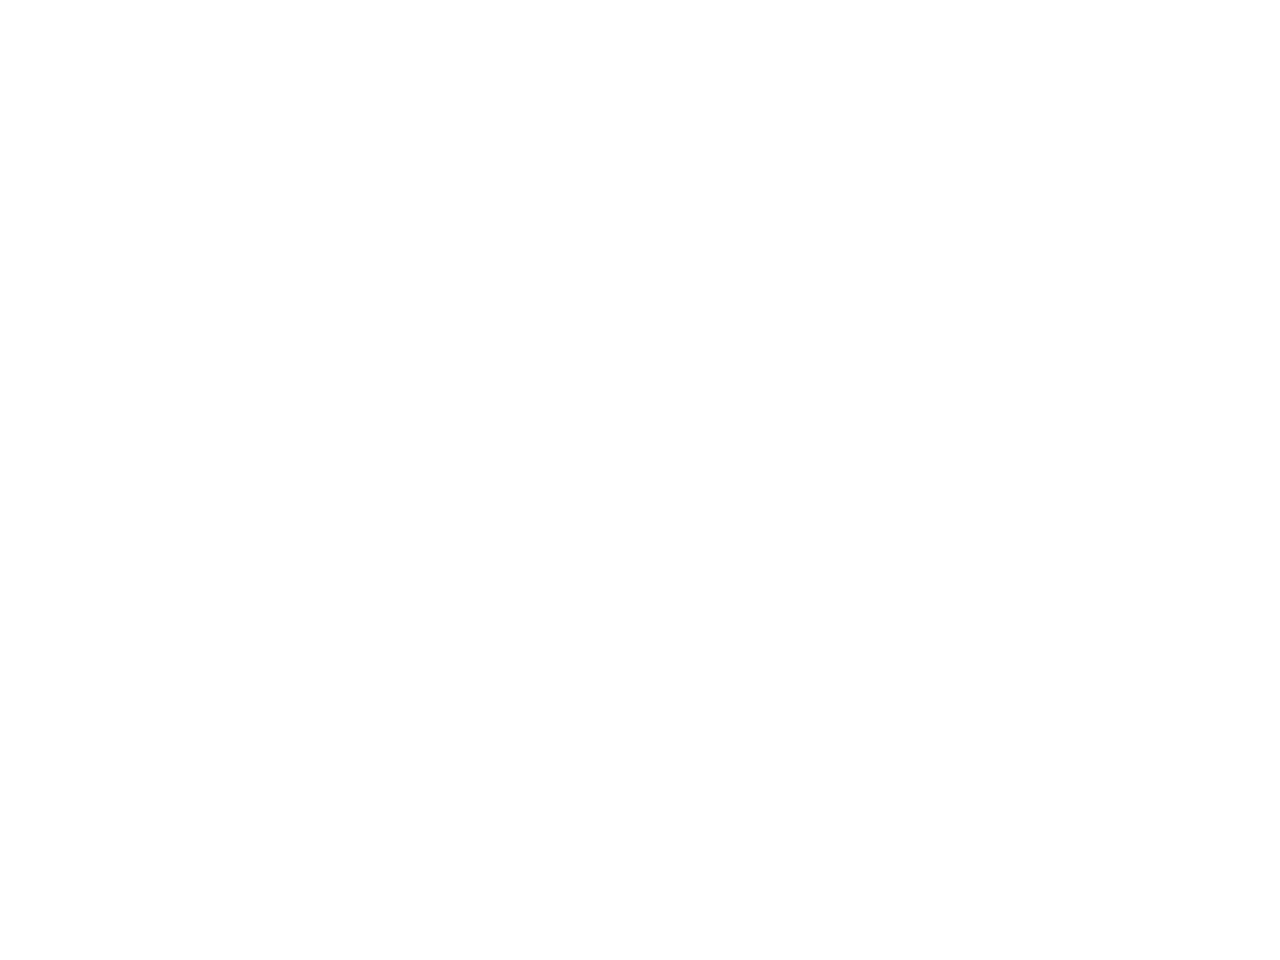

Step count:  45


<IPython.core.display.Javascript object>


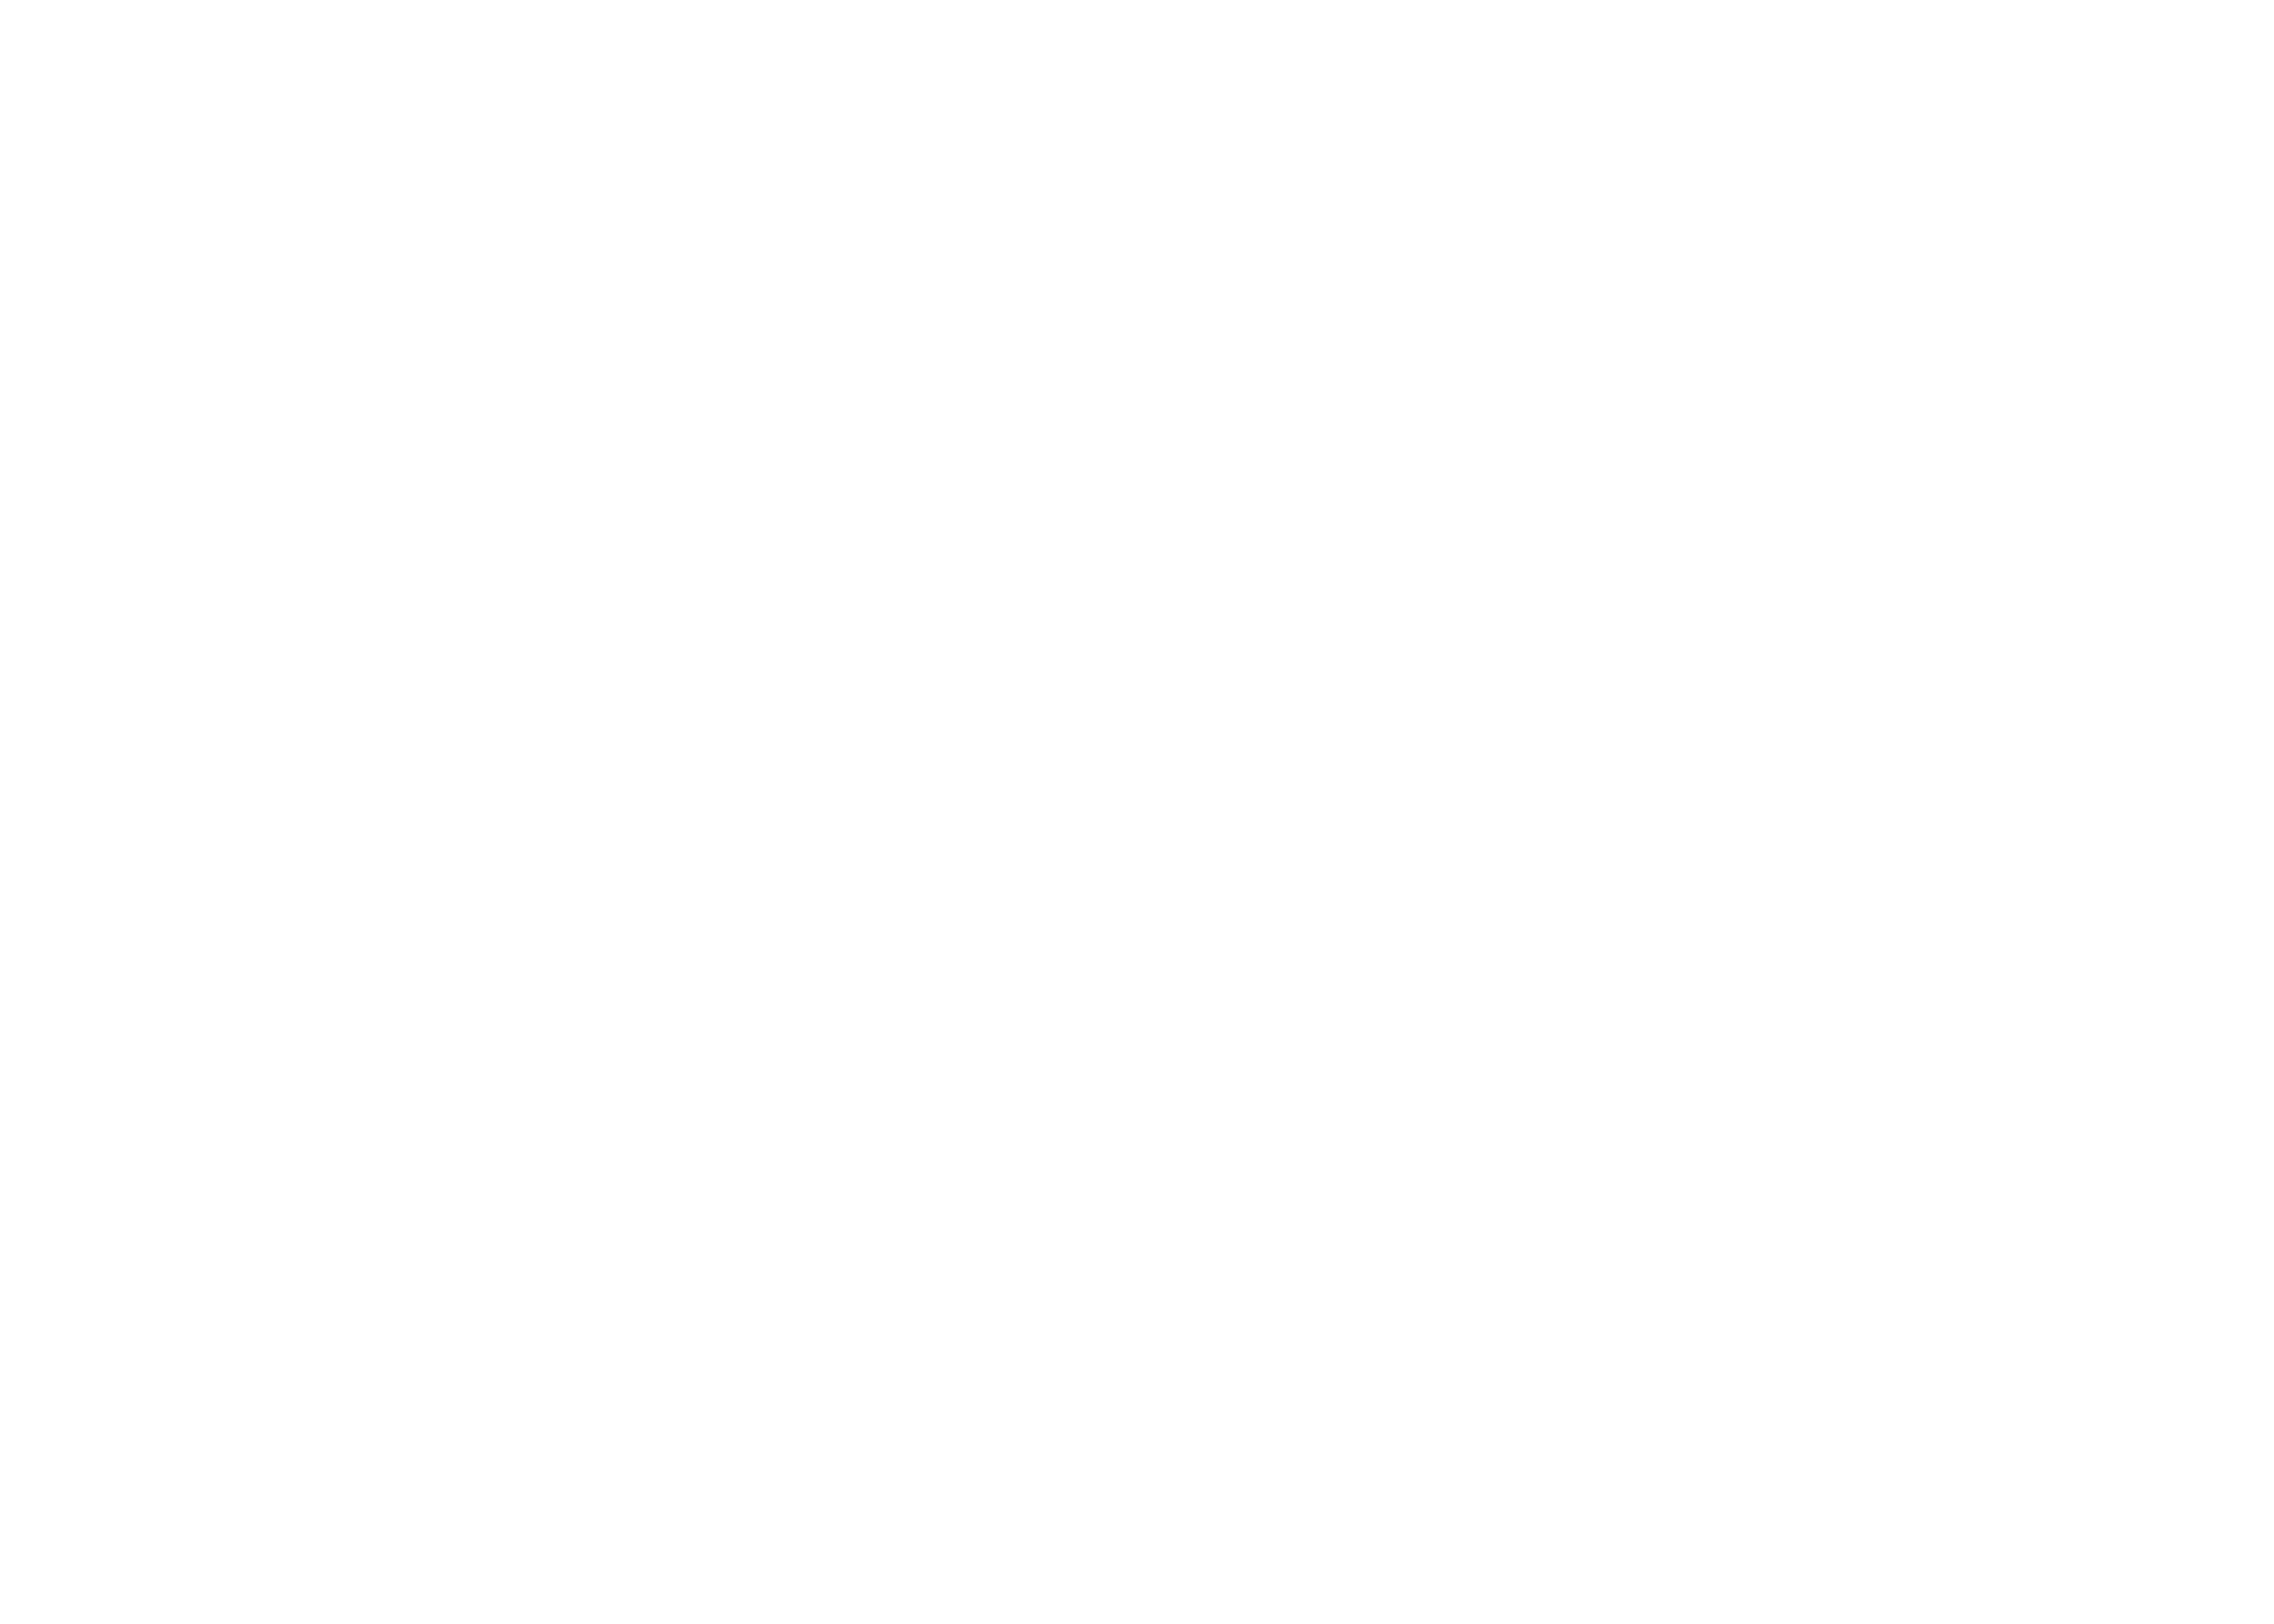

Step count:  41
Step count:  46
Step count:  43
Step count:  43
Step count:  43
Step count:  43
Step count:  12
Step count:  9
Step count:  12
Step count:  14
Step count:  13
Step count:  22
Step count:  22
Step count:  13
Step count:  15
Step count:  14
Step count:  12
Step count:  23
Step count:  26
Step count:  17
Step count:  17
Step count:  26
Step count:  26
Step count:  23
Step count:  26
Step count:  19
Step count:  21
Step count:  26
Step count:  27
Step count:  18
Step count:  27
Step count:  23
Step count:  24
Step count:  29
Step count:  30
Step count:  28
Step count:  25
Step count:  25
Step count:  25
Step count:  24
Step count:  25
Step count:  51
Step count:  52
Step count:  51
Step count:  48
Step count:  55
Step count:  58
Step count:  58
Step count:  84
Step count:  59
Step count:  70
Step count:  66
Step count:  55
Step count:  70
Step count:  69
Step count:  74
Step count:  85
Step count:  115
Step count:  77
Step count:  67
Step count:  90
Step count:  65
Step cou

<IPython.core.display.Javascript object>


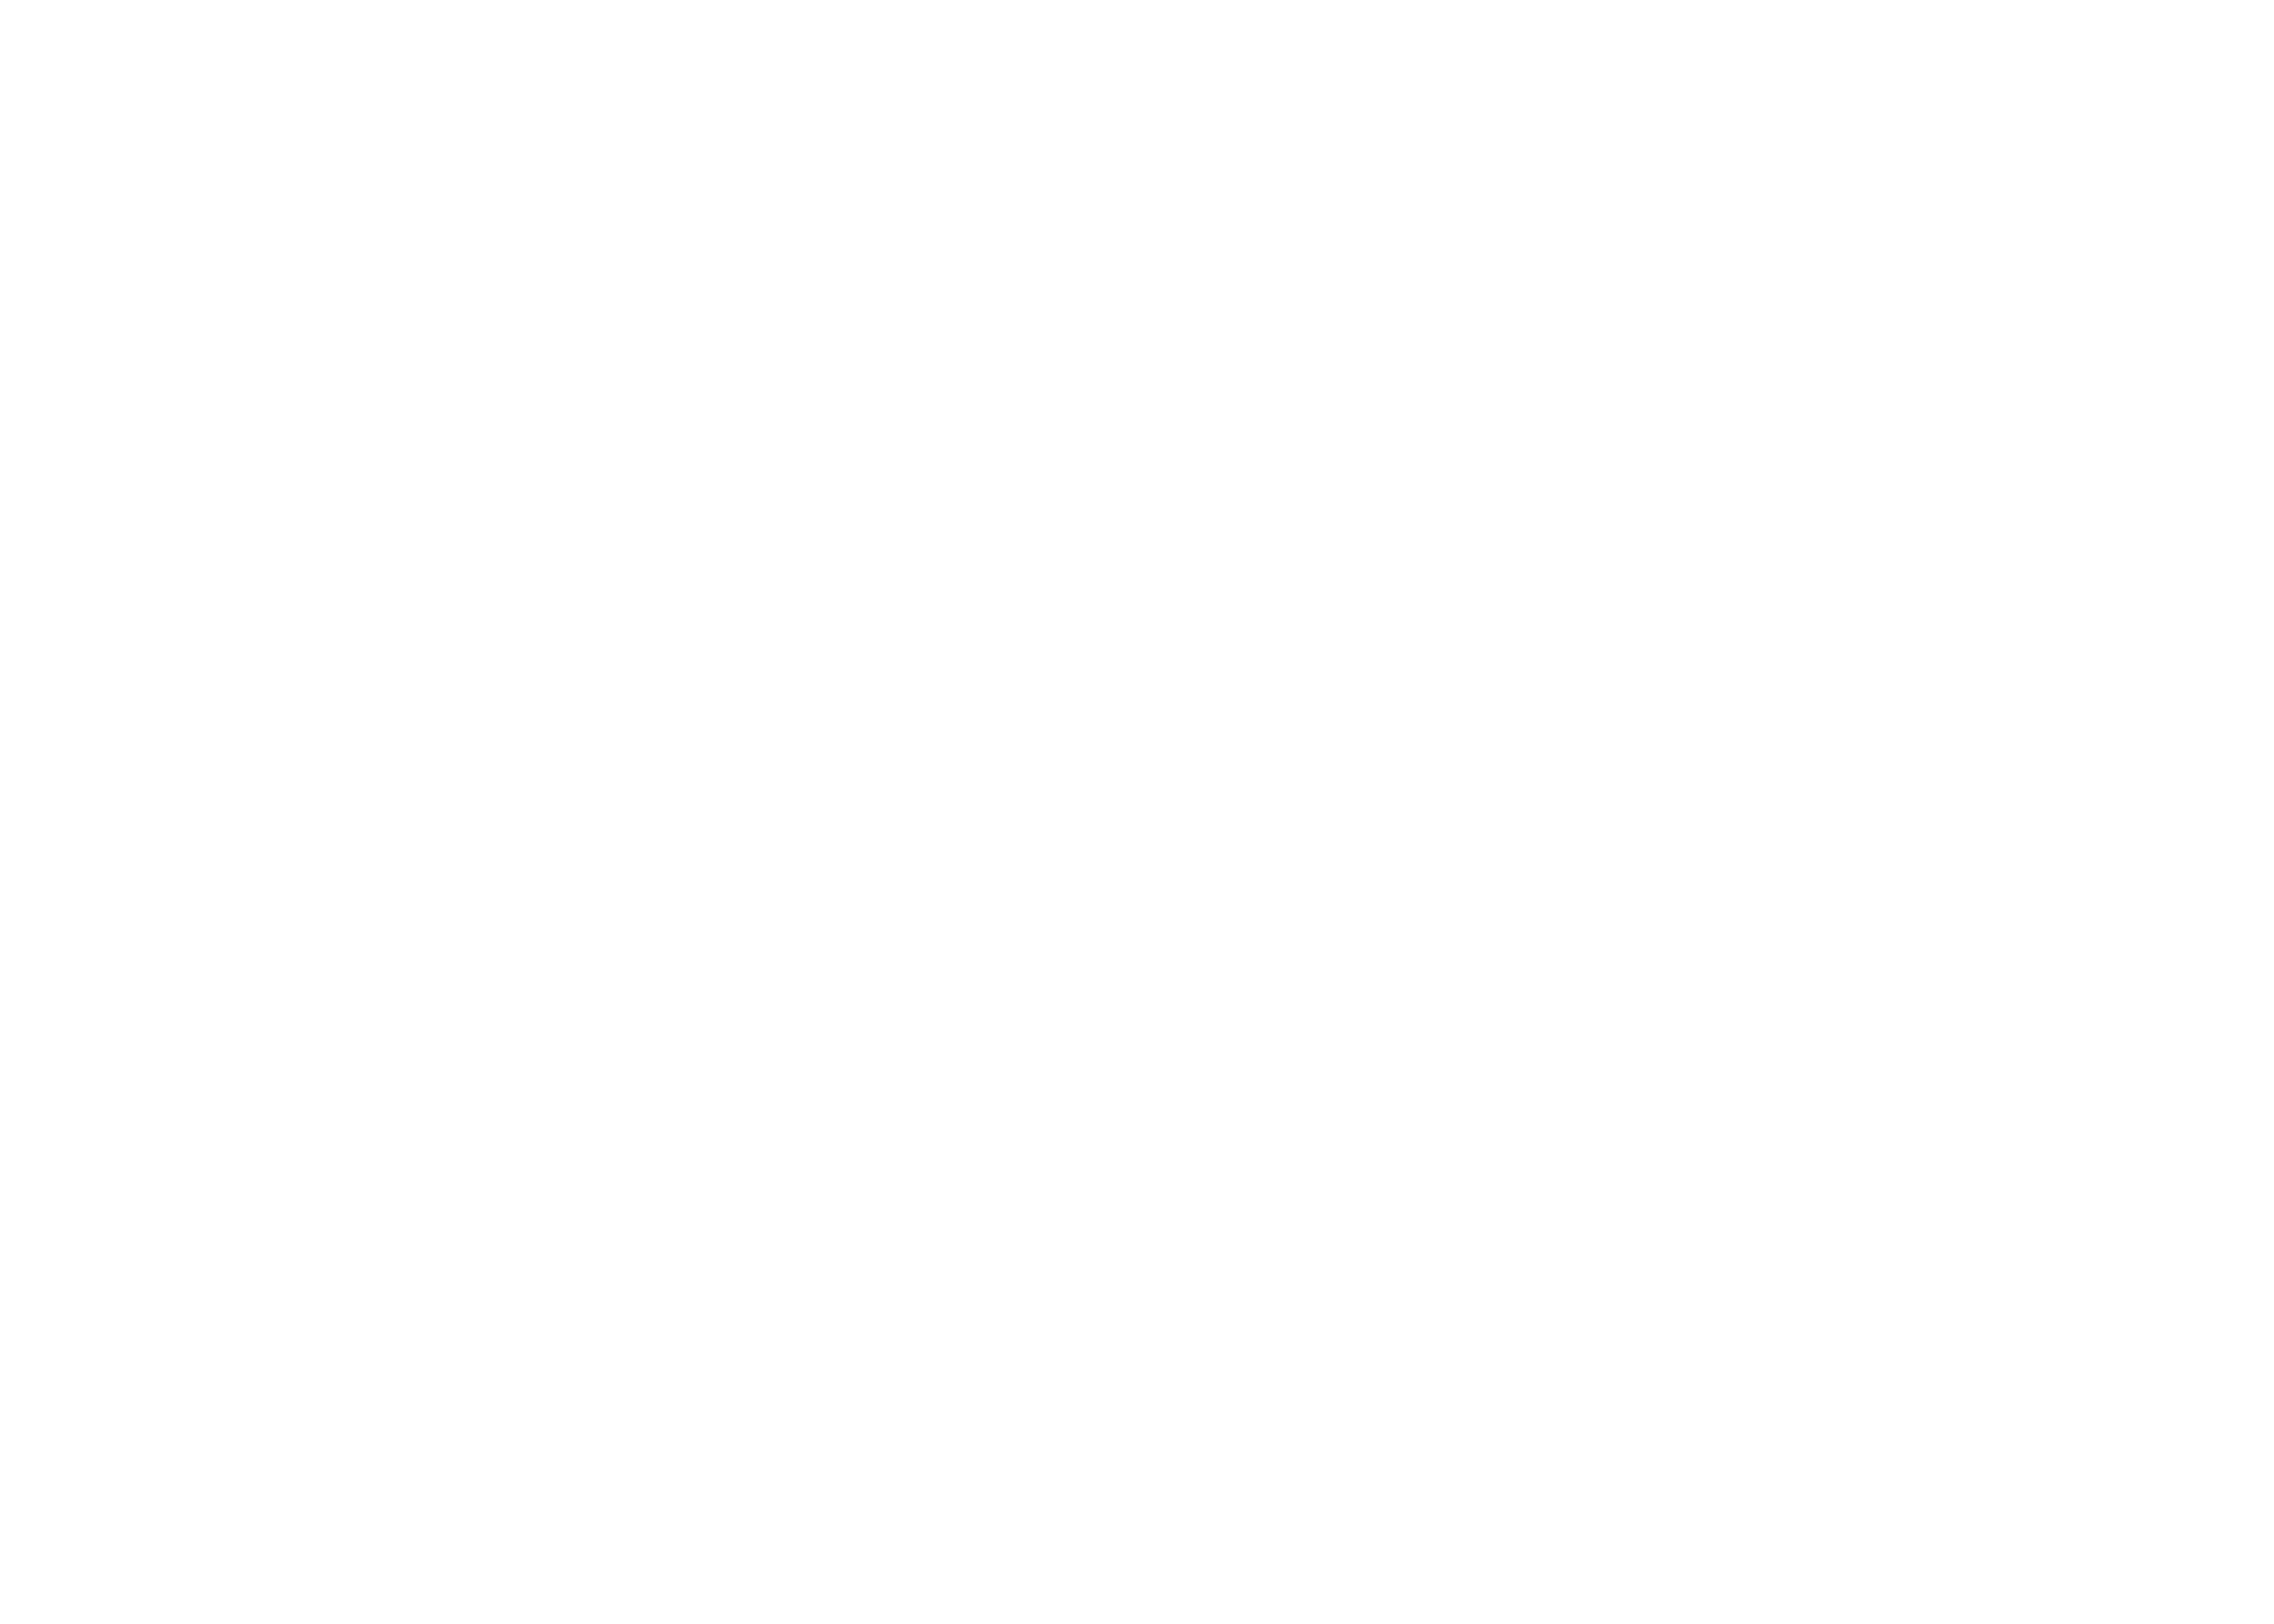

Step count:  112
Step count:  98
Step count:  85
Step count:  113
Step count:  98
Step count:  145
Step count:  148
Step count:  134
Step count:  137
141.0
A20
Step count:  97
A25
Step count:  151
Step count:  154
Step count:  170
Step count:  152
A25 error: 156.75   155
A20
Step count:  97
Step count:  111
Step count:  111
Step count:  102
Step count:  131
Step count:  106
A20 error: 109.66666666666667   109

A18
Step count:  82
Step count:  117
Step count:  102
Step count:  96
Step count:  88
Step count:  99
Step count:  95
Step count:  79
A18 mean: 94.75   95

A17
Step count:  80
Step count:  86
Step count:  70
A17 mean: 78.66666666666667   89

A16
Step count:  64
Step count:  56
Step count:  60
Step count:  67
Step count:  57
Step count:  64
A16 error: 61.333333333333336   77

A15
Step count:  69
Step count:  48
Step count:  61
Step count:  60
Step count:  57
Step count:  58
A15 error: 58.833333333333336   66

A14
Step count:  54
Step count:  43
Step count:  55
Step count:  45
Step

<IPython.core.display.Javascript object>


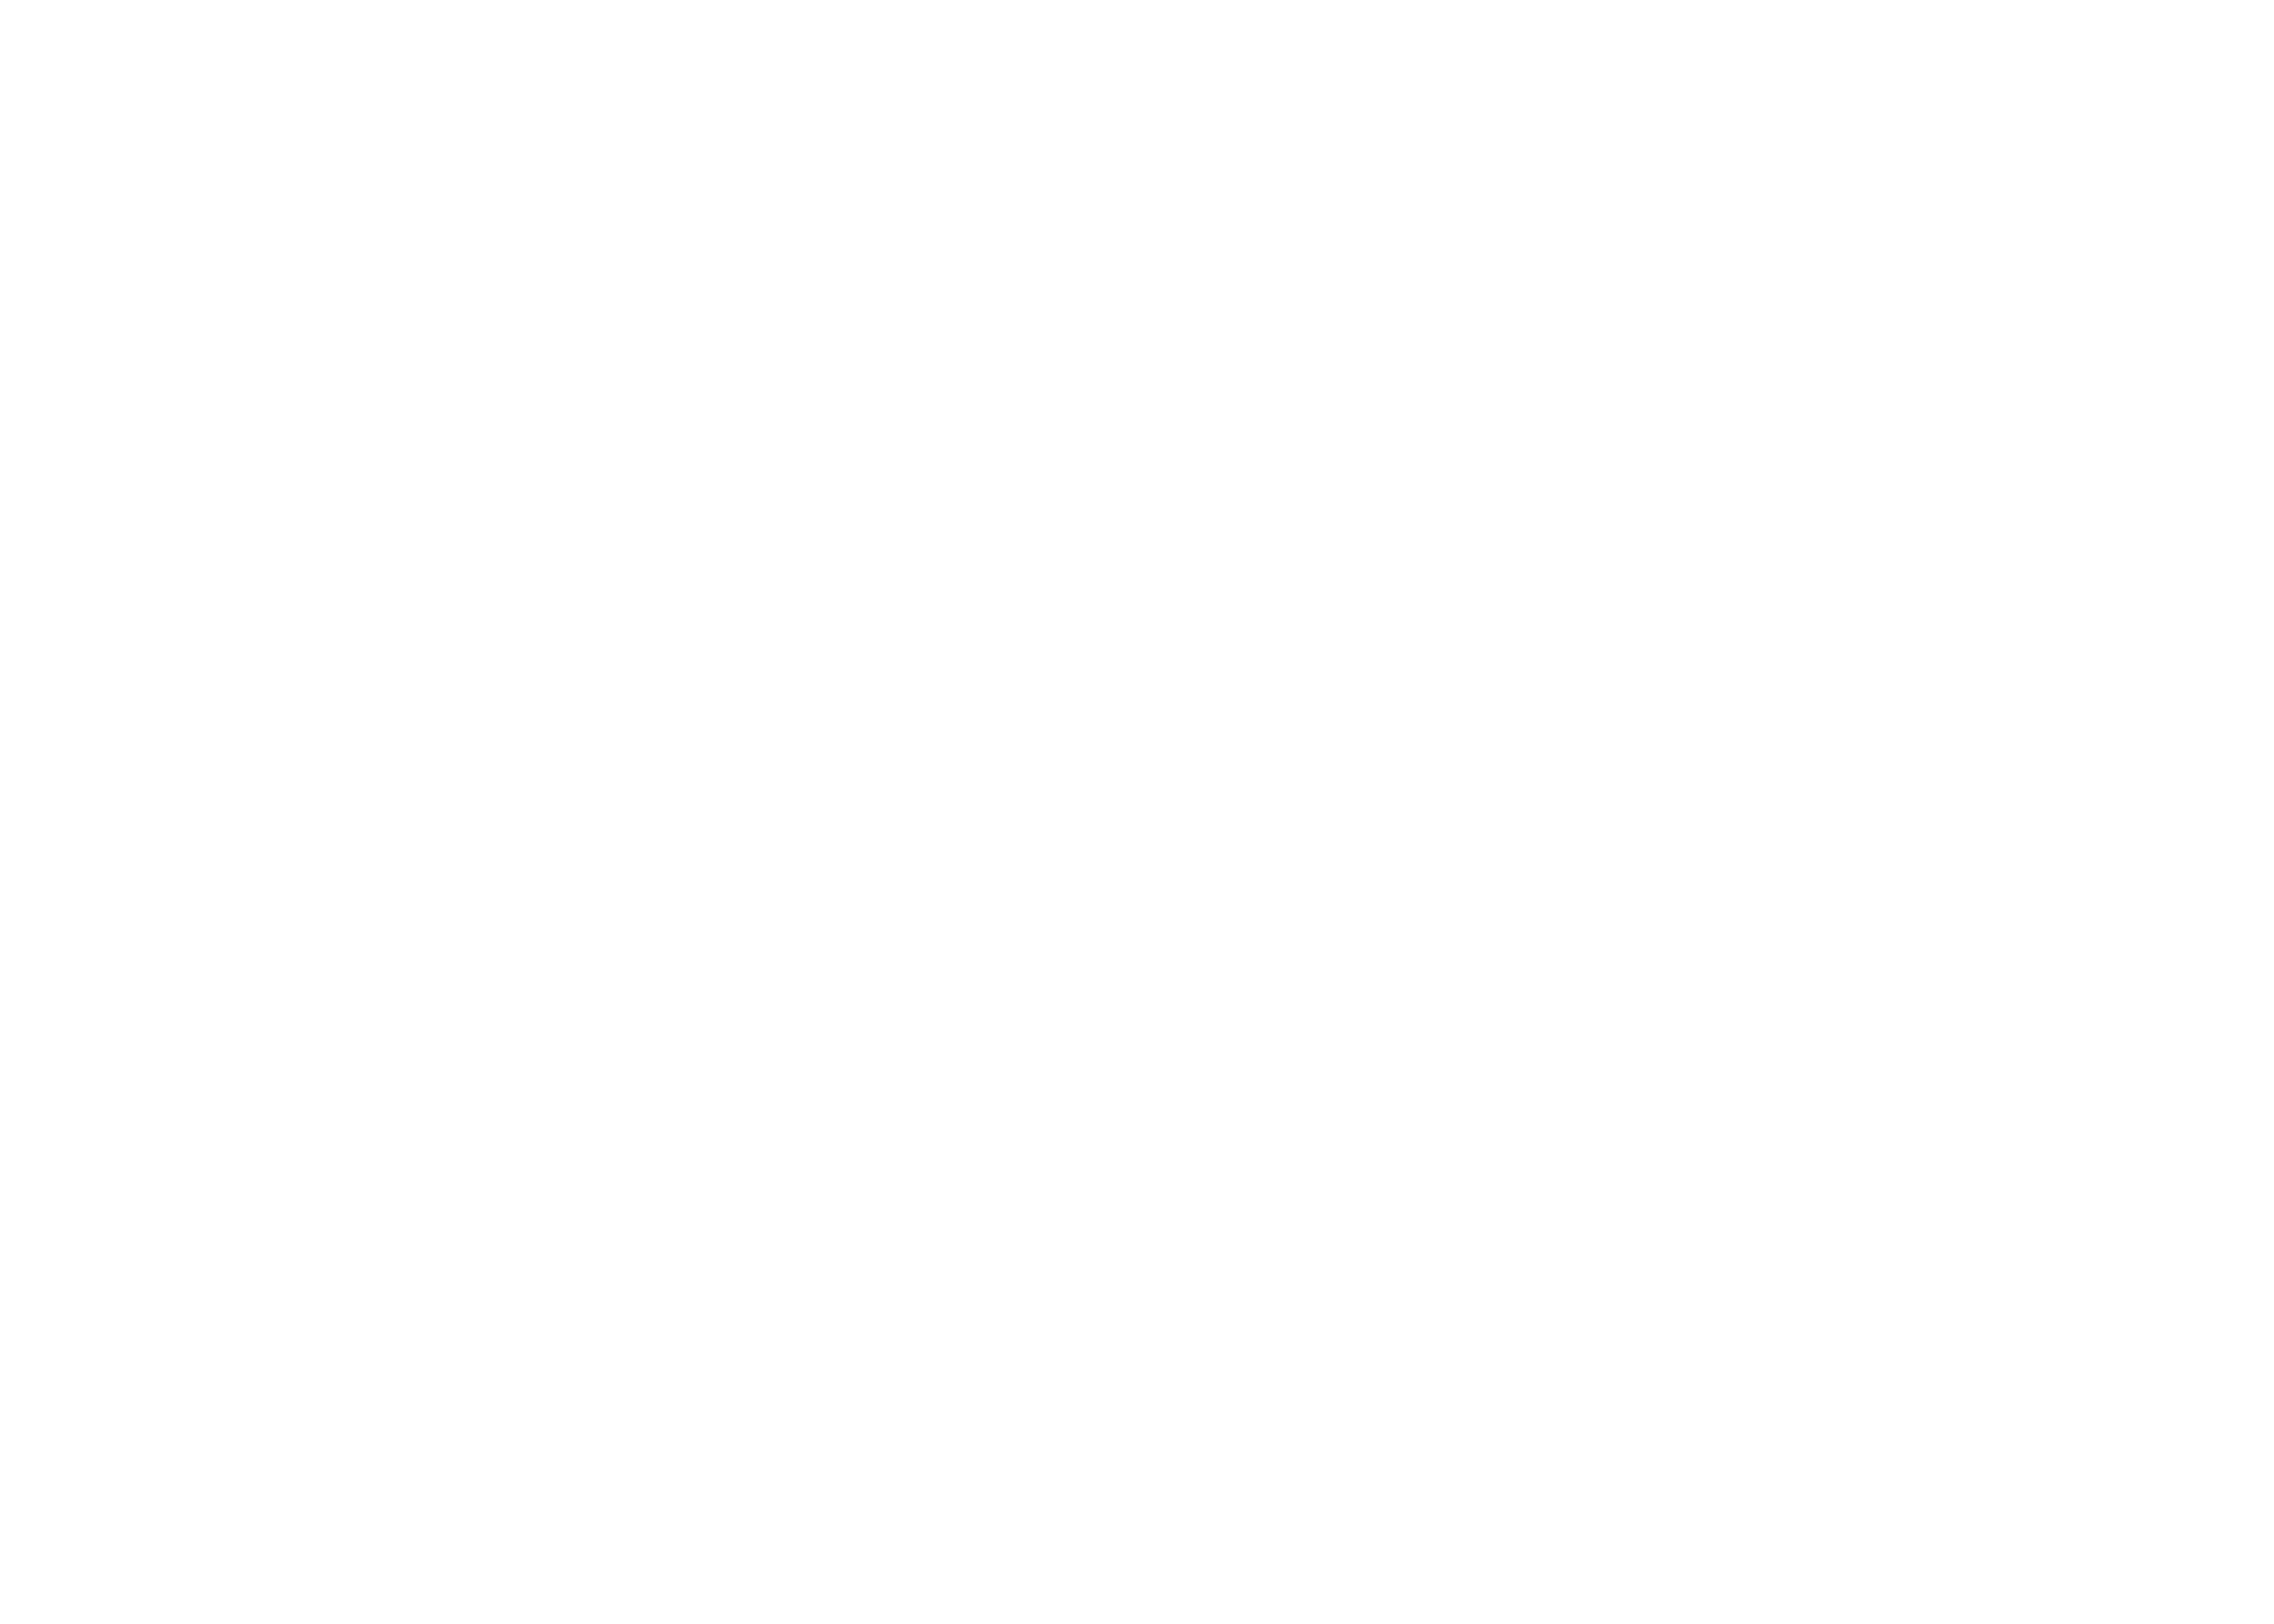

<IPython.core.display.Javascript object>


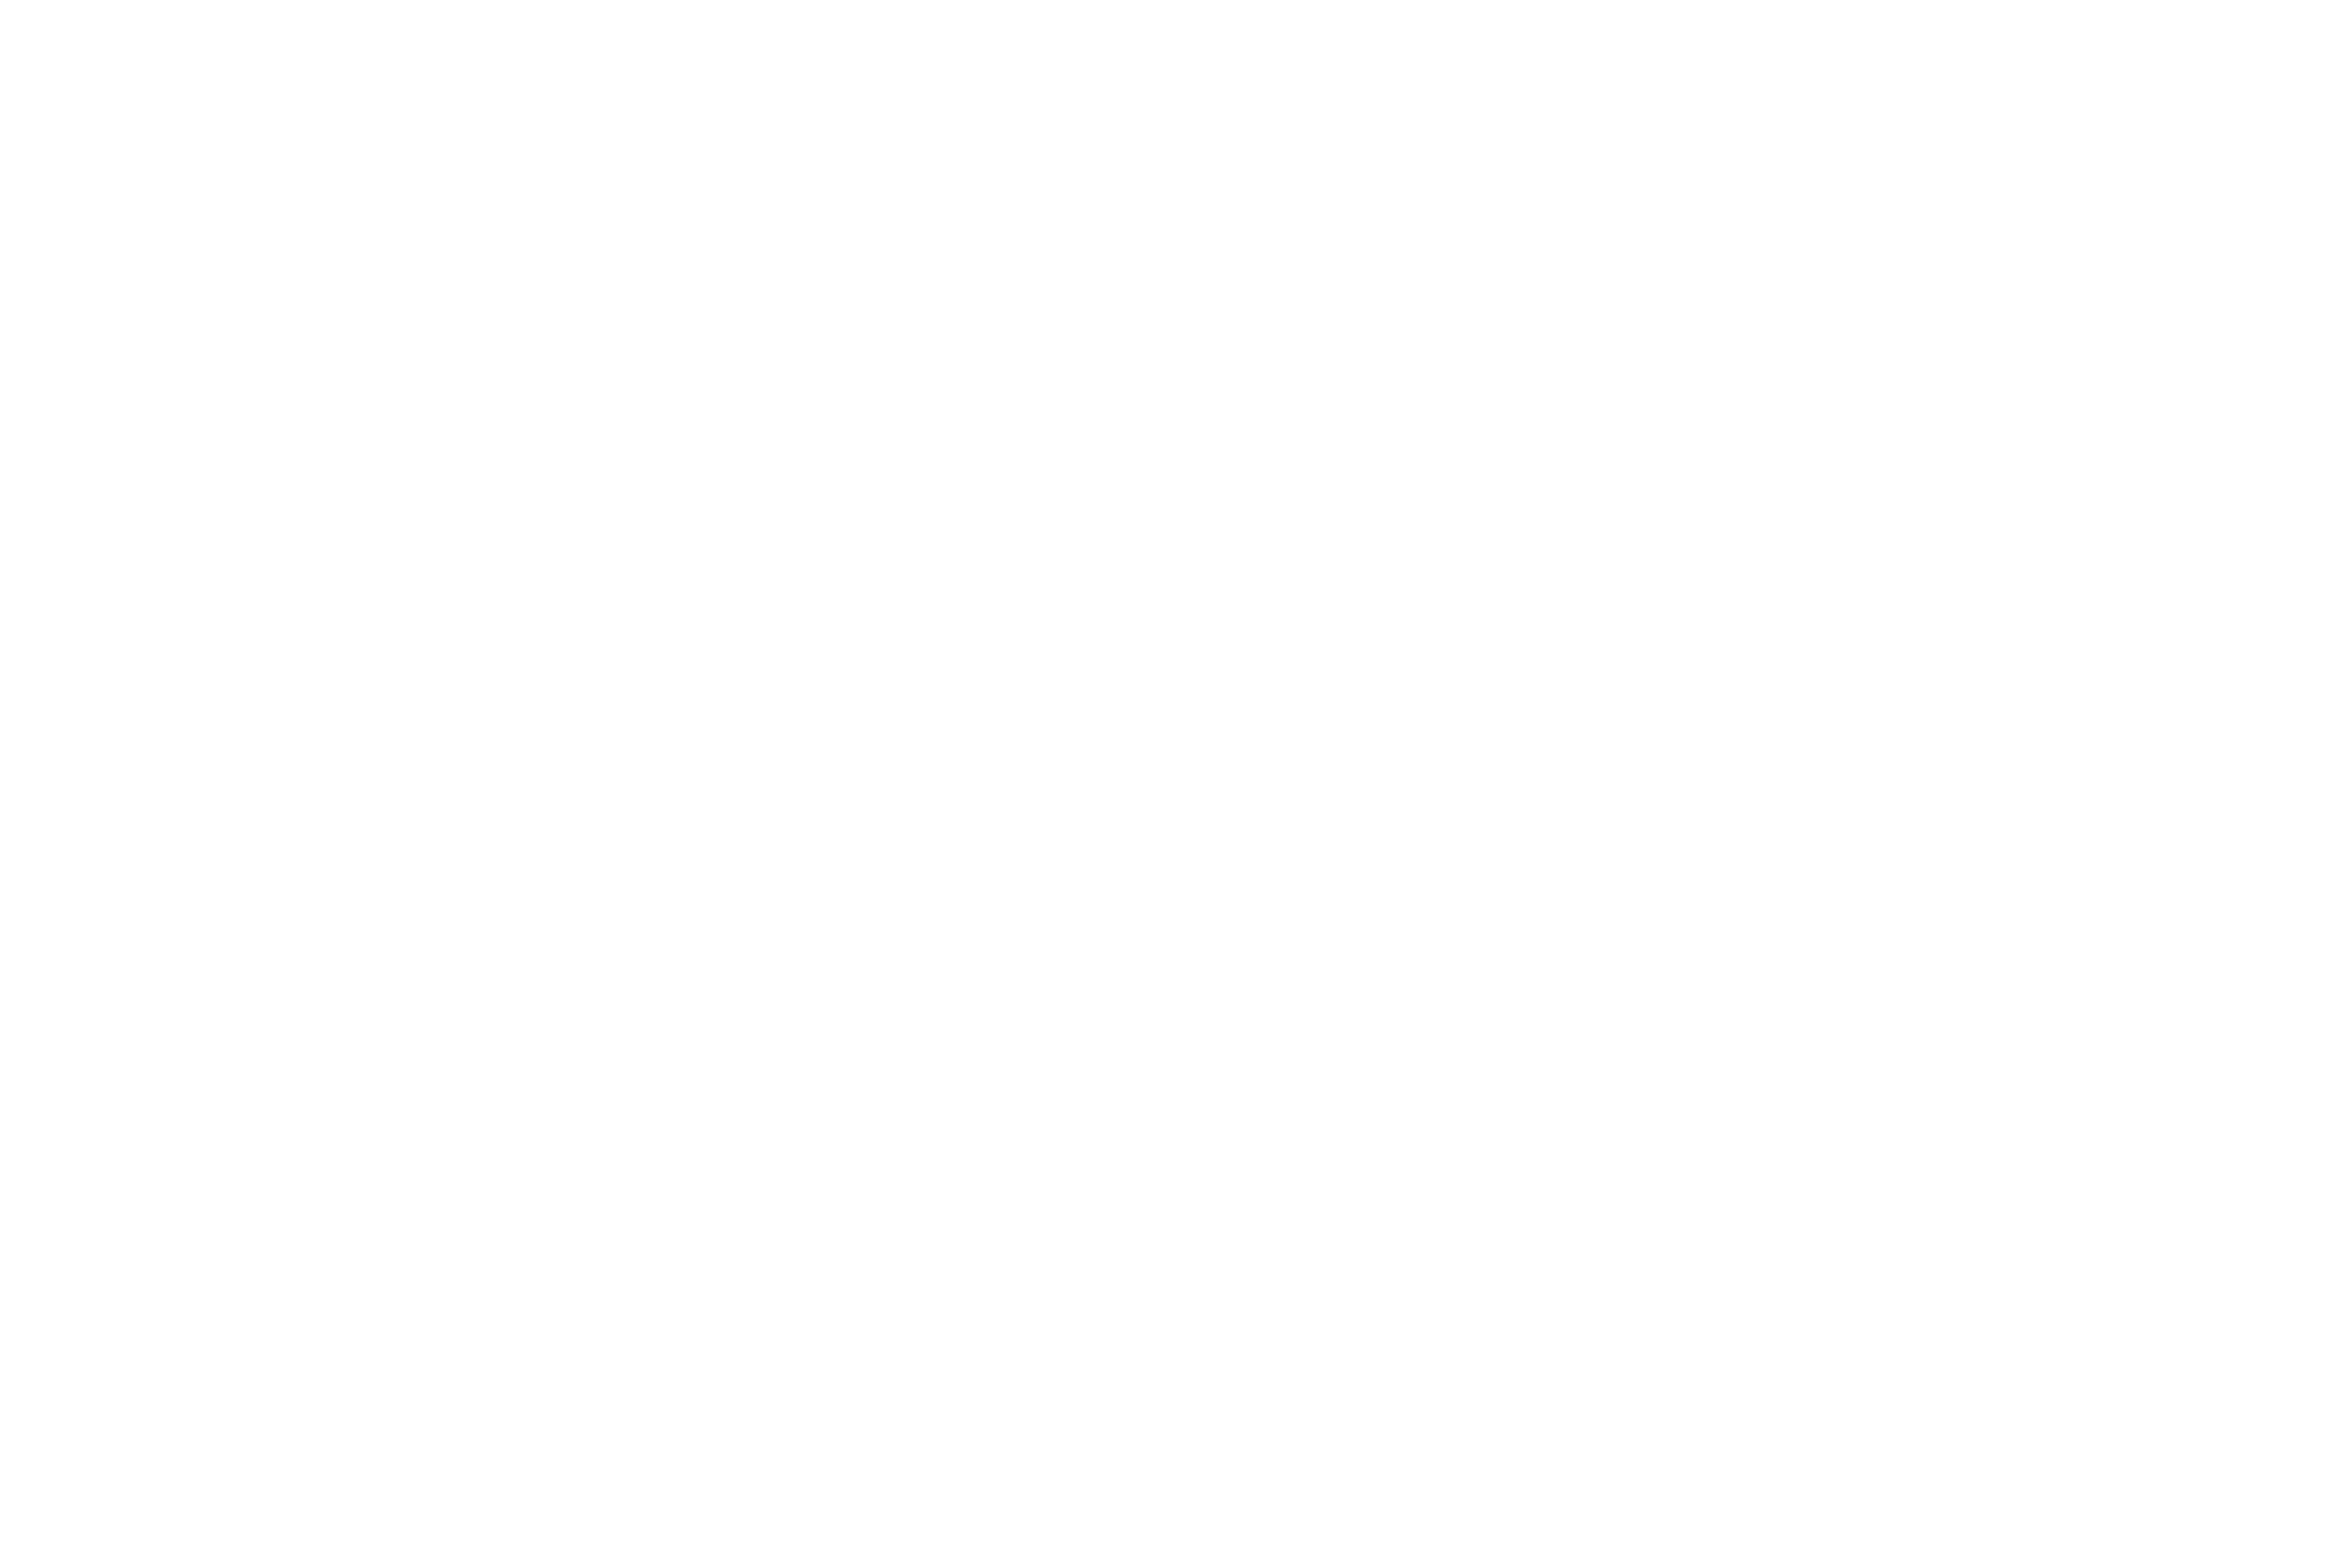

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Mean of random tests:  20.5
Step count:  34


<IPython.core.display.Javascript object>


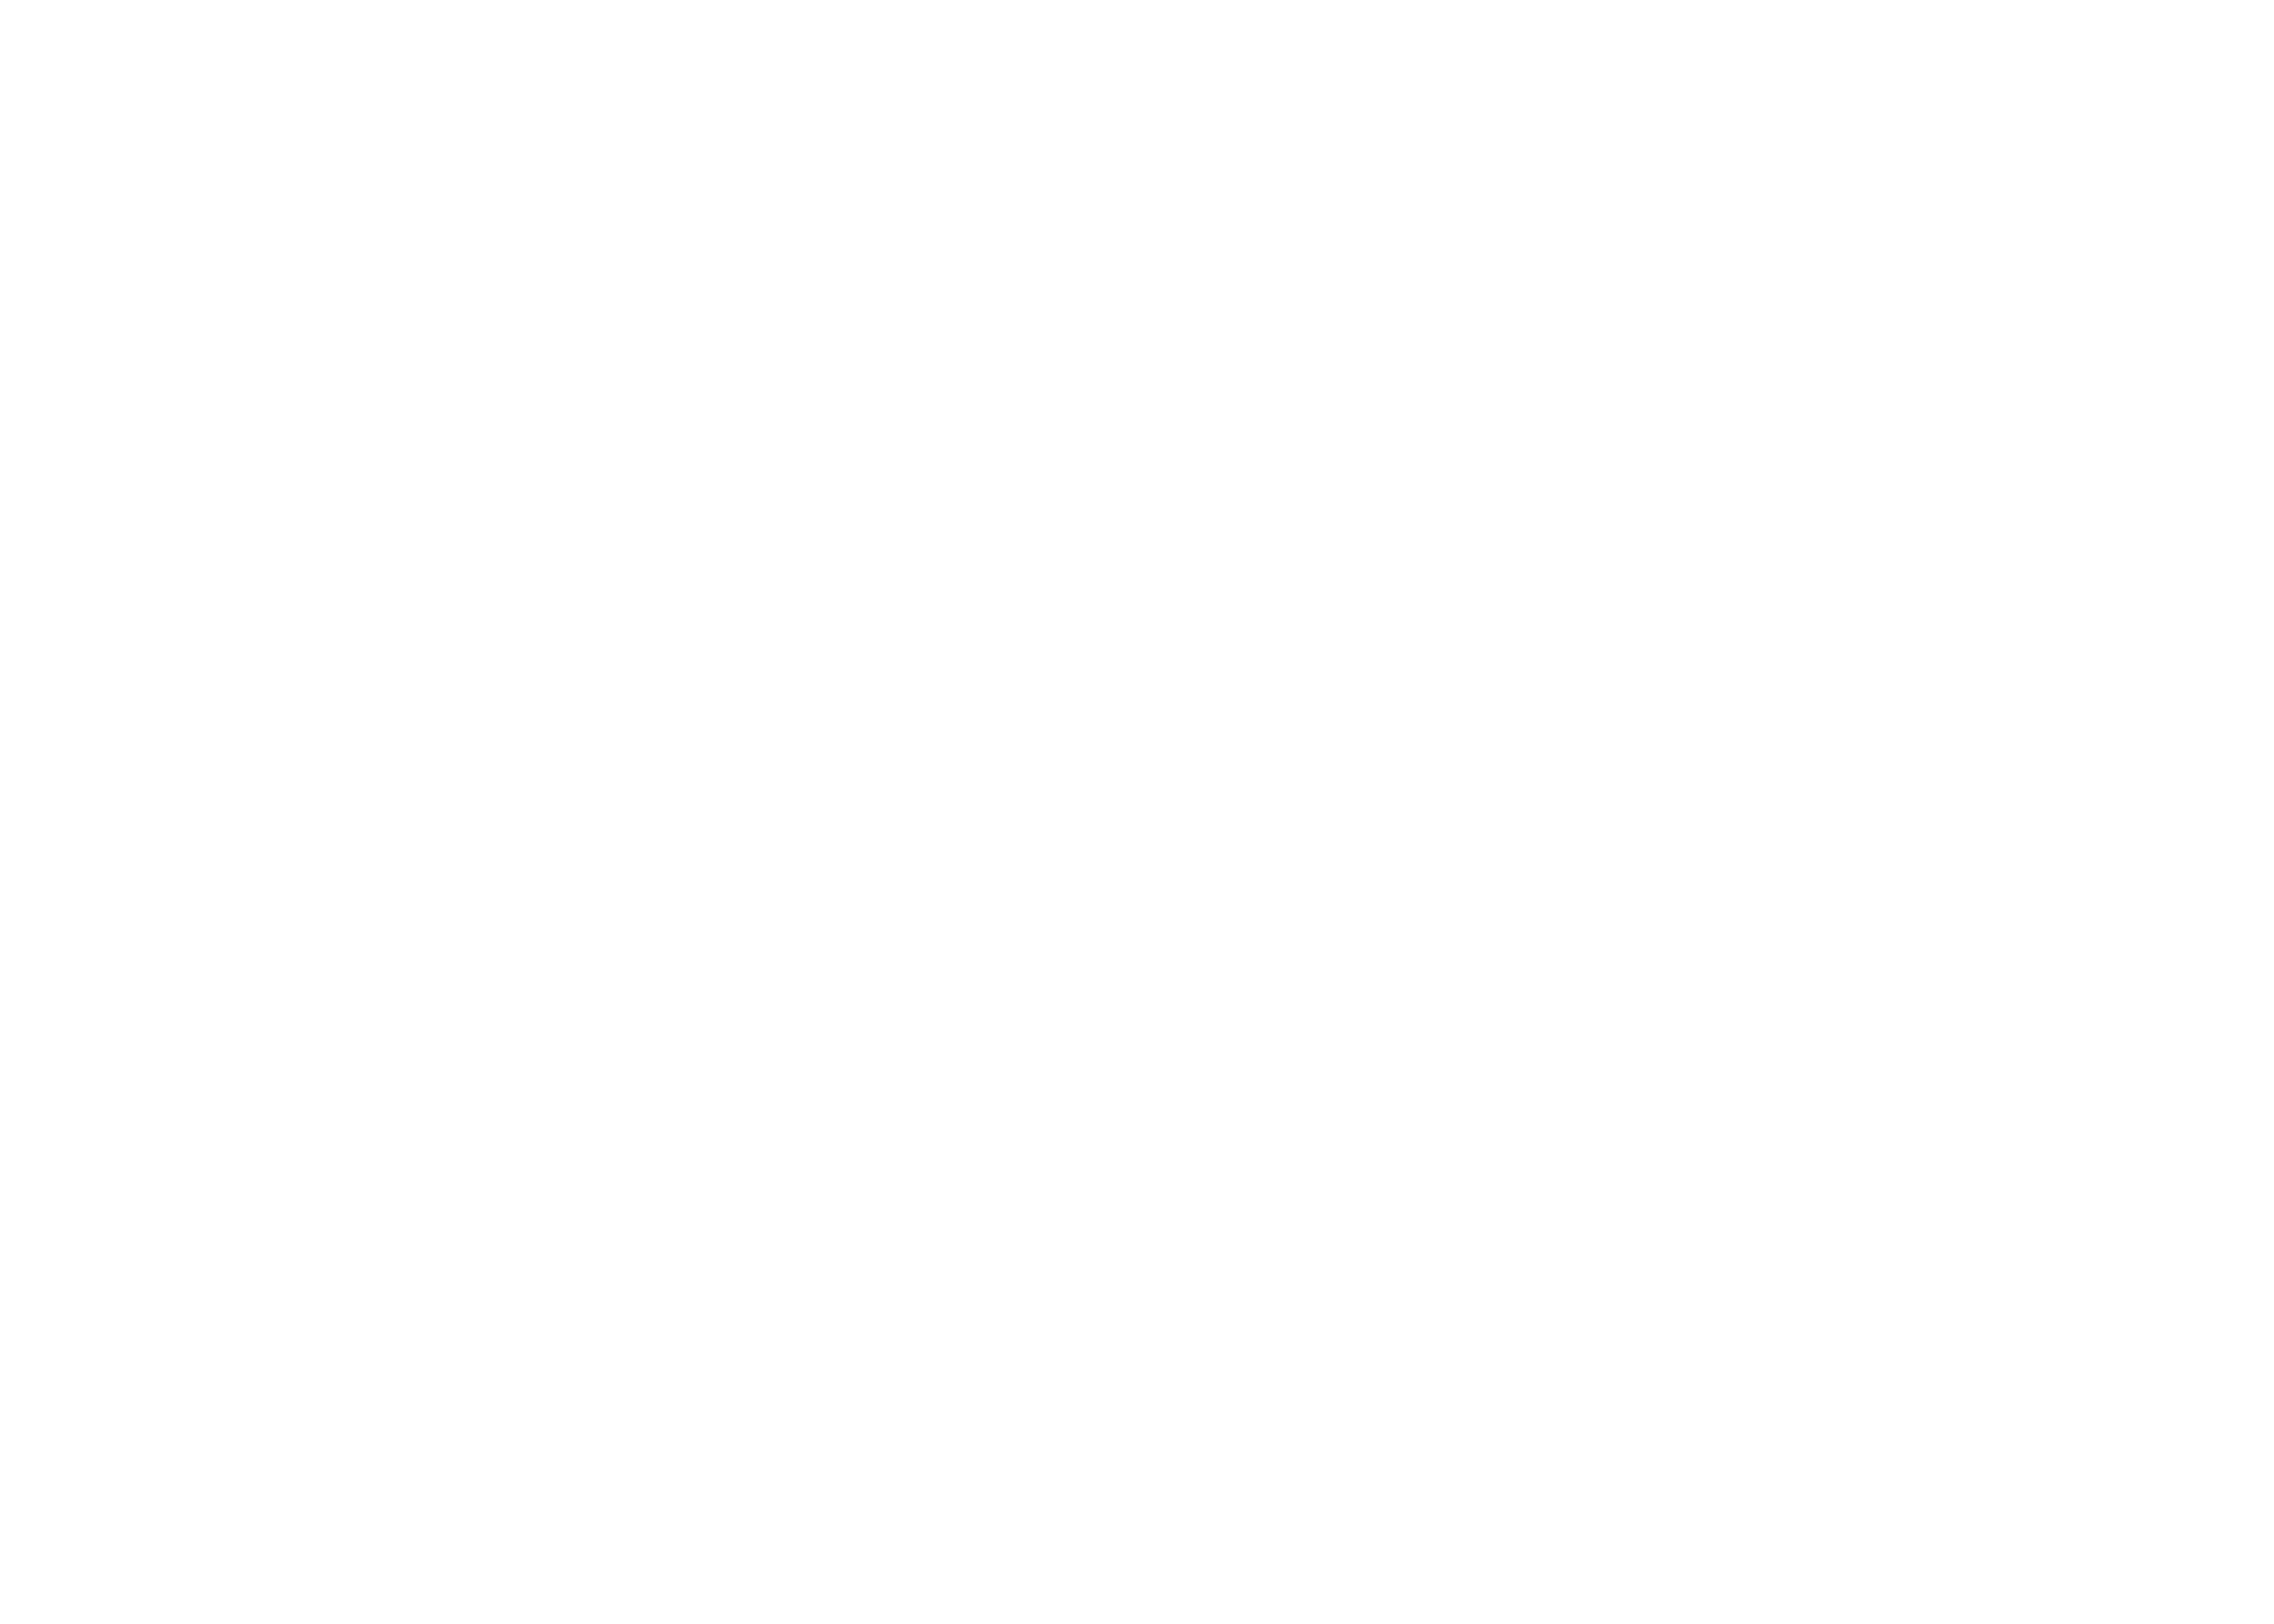

56


<IPython.core.display.Javascript object>


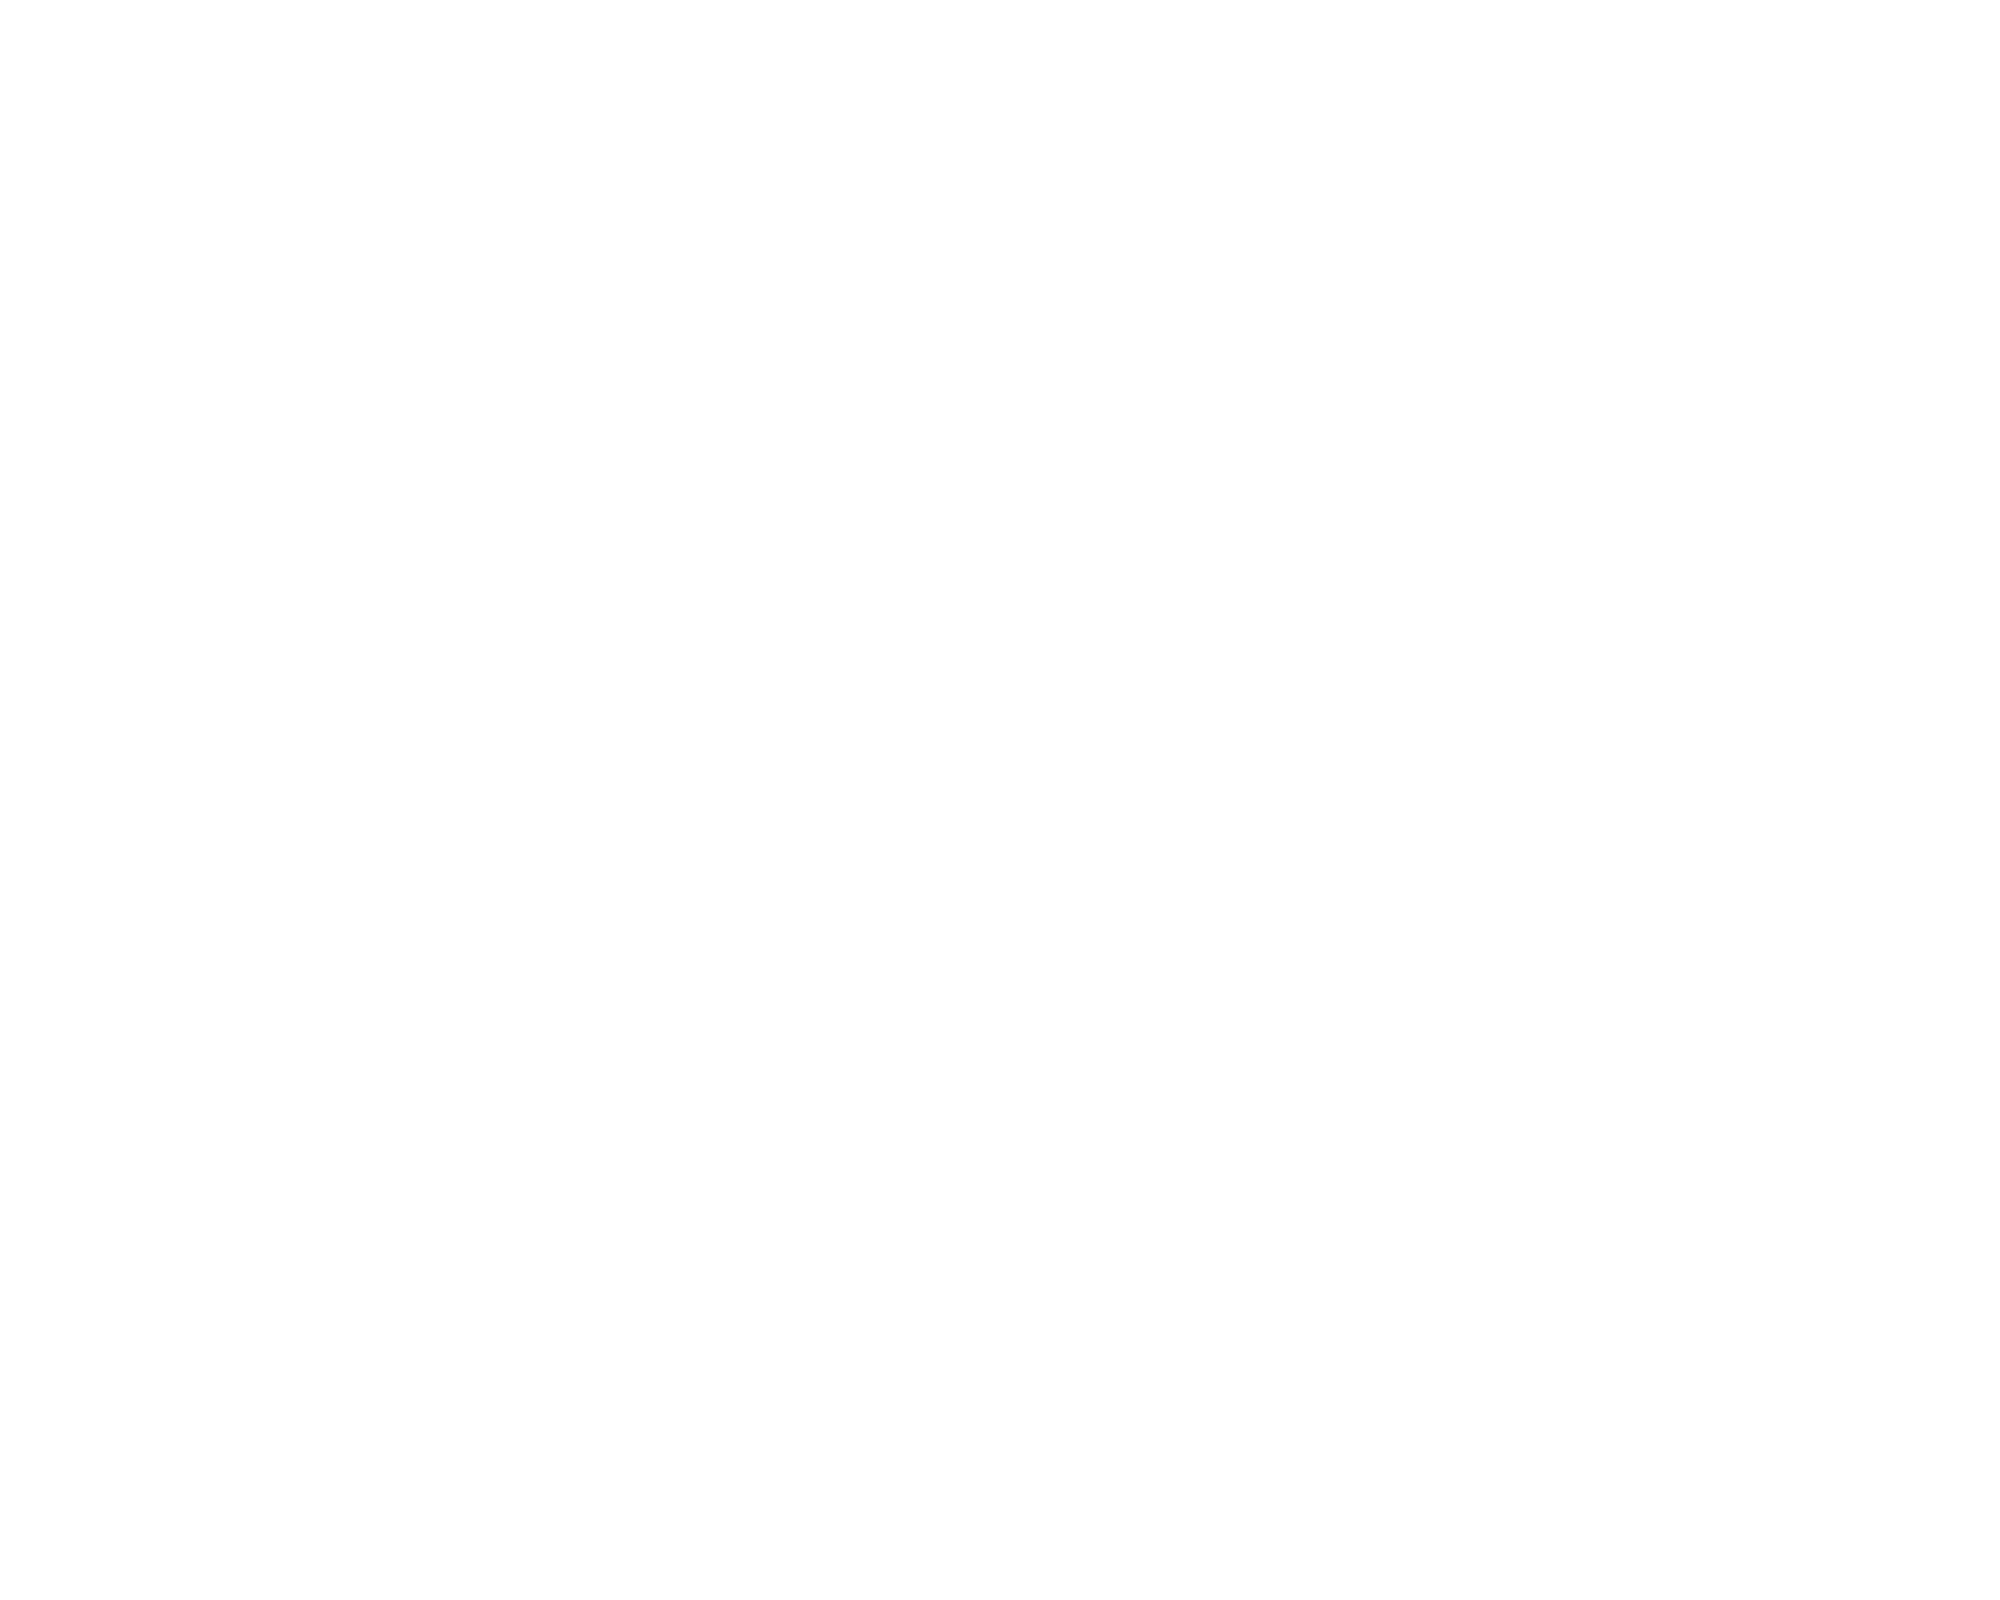

<IPython.core.display.Javascript object>


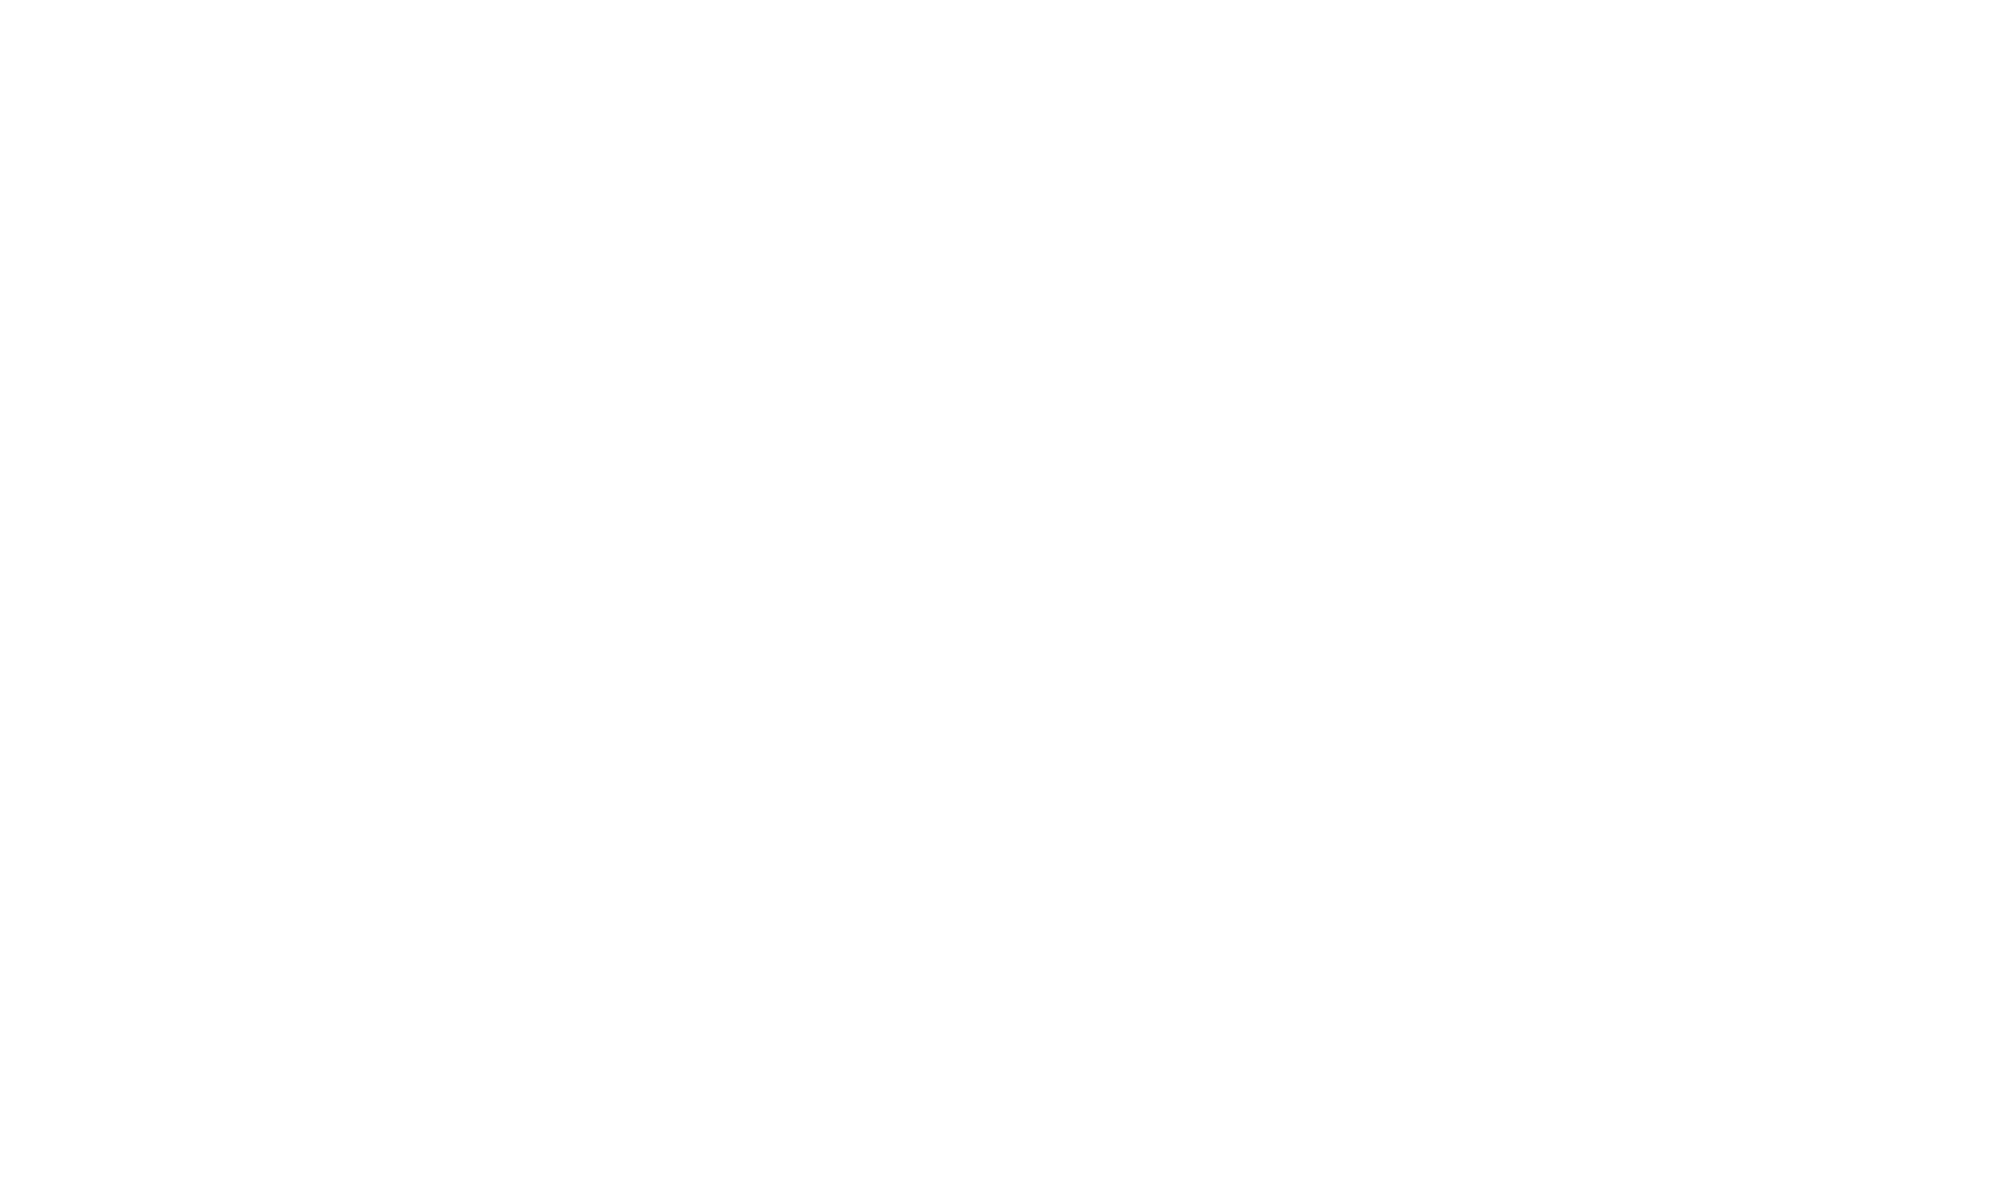

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob as glob
from scipy.signal import butter,filtfilt
from scipy.misc import derivative
import scipy.integrate as sint
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from matplotlib import colors
plt.rcParams.update({'font.size': 17})

%run matrix_profile_Bseries.ipynb
plt.close('all')

%matplotlib notebook

#%matplotlib inline

In [33]:
"""
Read all Mseries data into one big dataframe
Find the path to files in subfolders using os.listdir
"""
def read_M_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []
    
    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_M_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/M*.txt")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

"""
Function to read M_series data into pandas dataframe
"""
def read_Mseries_data(path):
    drifter_identifyer = path[85:-4]
    print(drifter_identifyer)
    column_names = ['time', 'pressure1', 'temp1', 'pressure2', 'temp2', 'acc_x', 'acc_y', 'acc_z', 'gyro_x',
                    'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z', 'High-g acc_x', 'High-g acc_y', 'High-g acc_z']
    indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    df = pd.read_csv(path, header = 0, names = column_names,usecols = indices)
    df.drop(df[abs(df.pressure1) > 3000].index, inplace = True)
    df.drop(df[abs(df.pressure2) > 3000].index, inplace = True)
    return df

def plot_and_slice(filename,start,stop):
    df = read_Mseries_data(filename)
    df.drop(df[abs(df.pressure1) > 3000].index, inplace = True)
    df.drop(df[abs(df.pressure2) > 3000].index, inplace = True)
    
    #Send data through low pass filter
    low_pass_signal = df[["pressure1","pressure2","acc_x","acc_y","acc_z"]].to_numpy()
    
    
    stop = len(low_pass_signal[:,0][0:stop])
    # Filter requirements.
    time = time_array(start,stop)
    
    T = time[-1]         # Sample Period
    fs = 50.0       # sample rate, Hz
    cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    order = 2       # sin wave can be approx represented as quadratic
    n = int(T * fs) # total number of samples
    
    for i in range(low_pass_signal.shape[1]):
        y = butter_lowpass_filter(low_pass_signal[:,i], cutoff, fs, order)
        low_pass_signal[:,i] = y
    
    
        
    low_pass_mean_p = (low_pass_signal[:,0][start:stop] + low_pass_signal[:,1][start:stop])/2
    fig, ax = plt.subplots(figsize = (9,6))
    ax.plot(low_pass_mean_p)
    plt.show()
    
    #upsample data to 100 hz
    upsample_lpmp = np.zeros(len(low_pass_mean_p)*2)
    k=0
    for i in range(0,len(low_pass_mean_p)*2-2,2):
        upsample_lpmp[i] = low_pass_mean_p[k]
        upsample_lpmp[i+1] = (low_pass_mean_p[k] + low_pass_mean_p[k+1])/2
        k+=1
    
    upsample_lpmp[-3:len(upsample_lpmp)] = low_pass_mean_p[-3:len(low_pass_mean_p)]
           
    low_pass_mean_p = upsample_lpmp
    

    
    processed_df = pd.DataFrame(low_pass_mean_p,columns = ['pressure'])
    
    return processed_df

"""Function taken from somehere on the internett"""
#https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


"""Create a time array from M series indexes"""
def time_array(start,end):
    time_s = np.linspace(0,end-start,end-start)/50#convert to seconds
    return time_s



13072021/M14/M140713160508


<IPython.core.display.Javascript object>


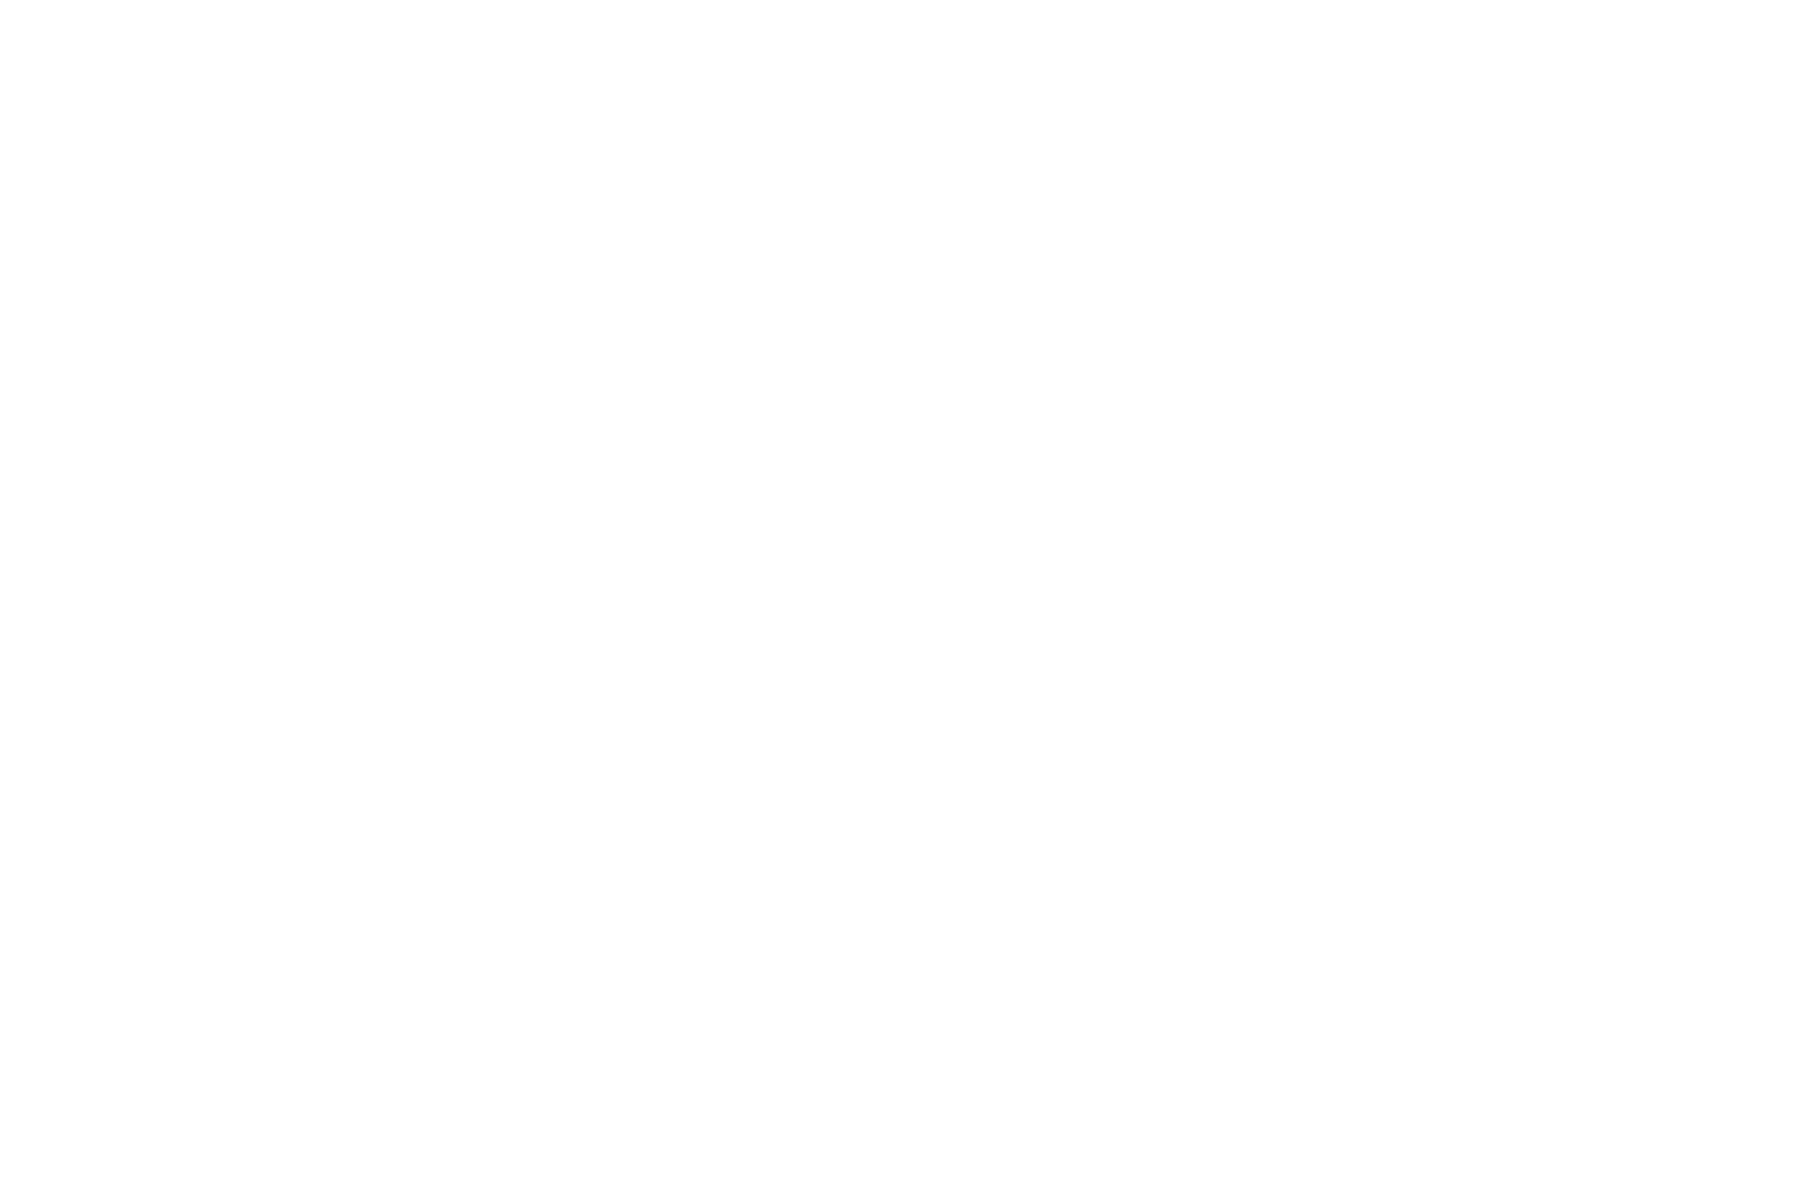

13072021/M15/M150713160801


<IPython.core.display.Javascript object>


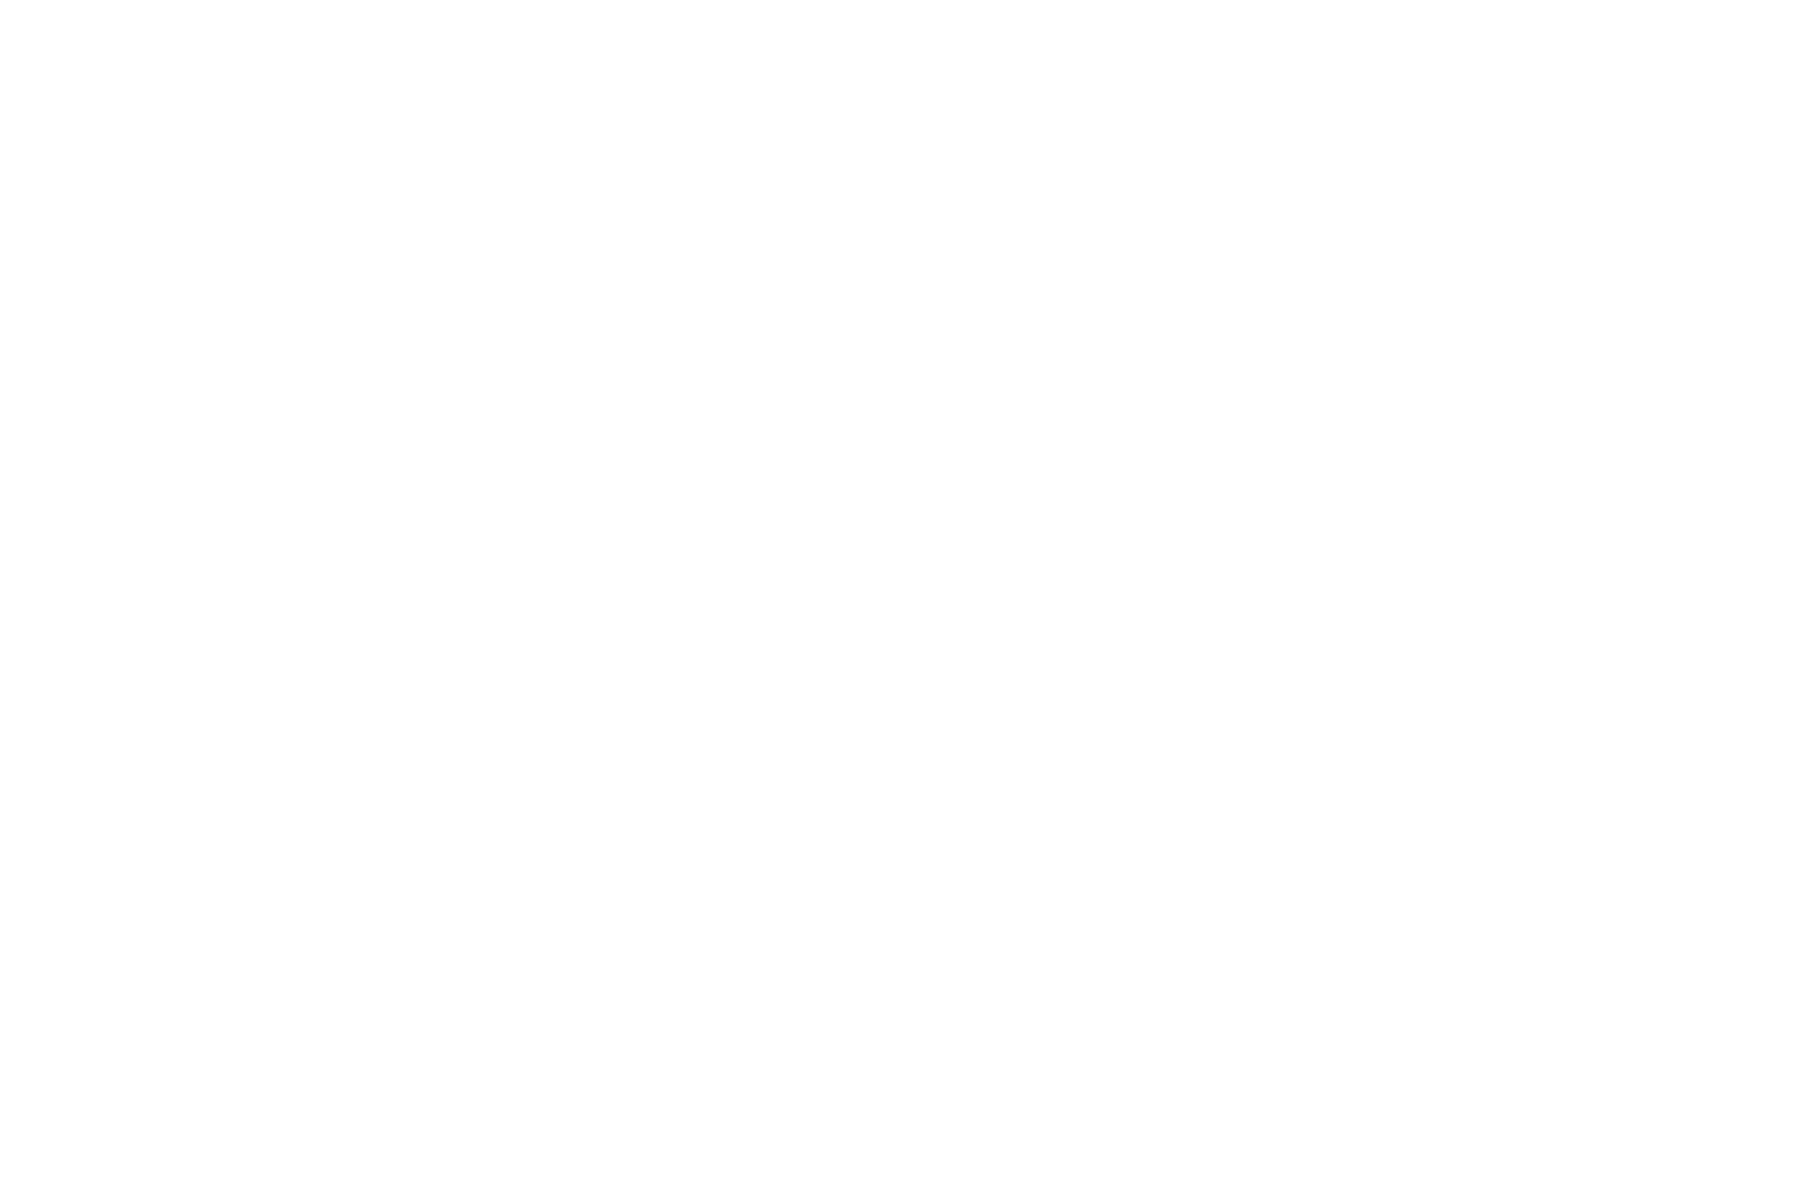

13072021/M16/M160713160519


<IPython.core.display.Javascript object>


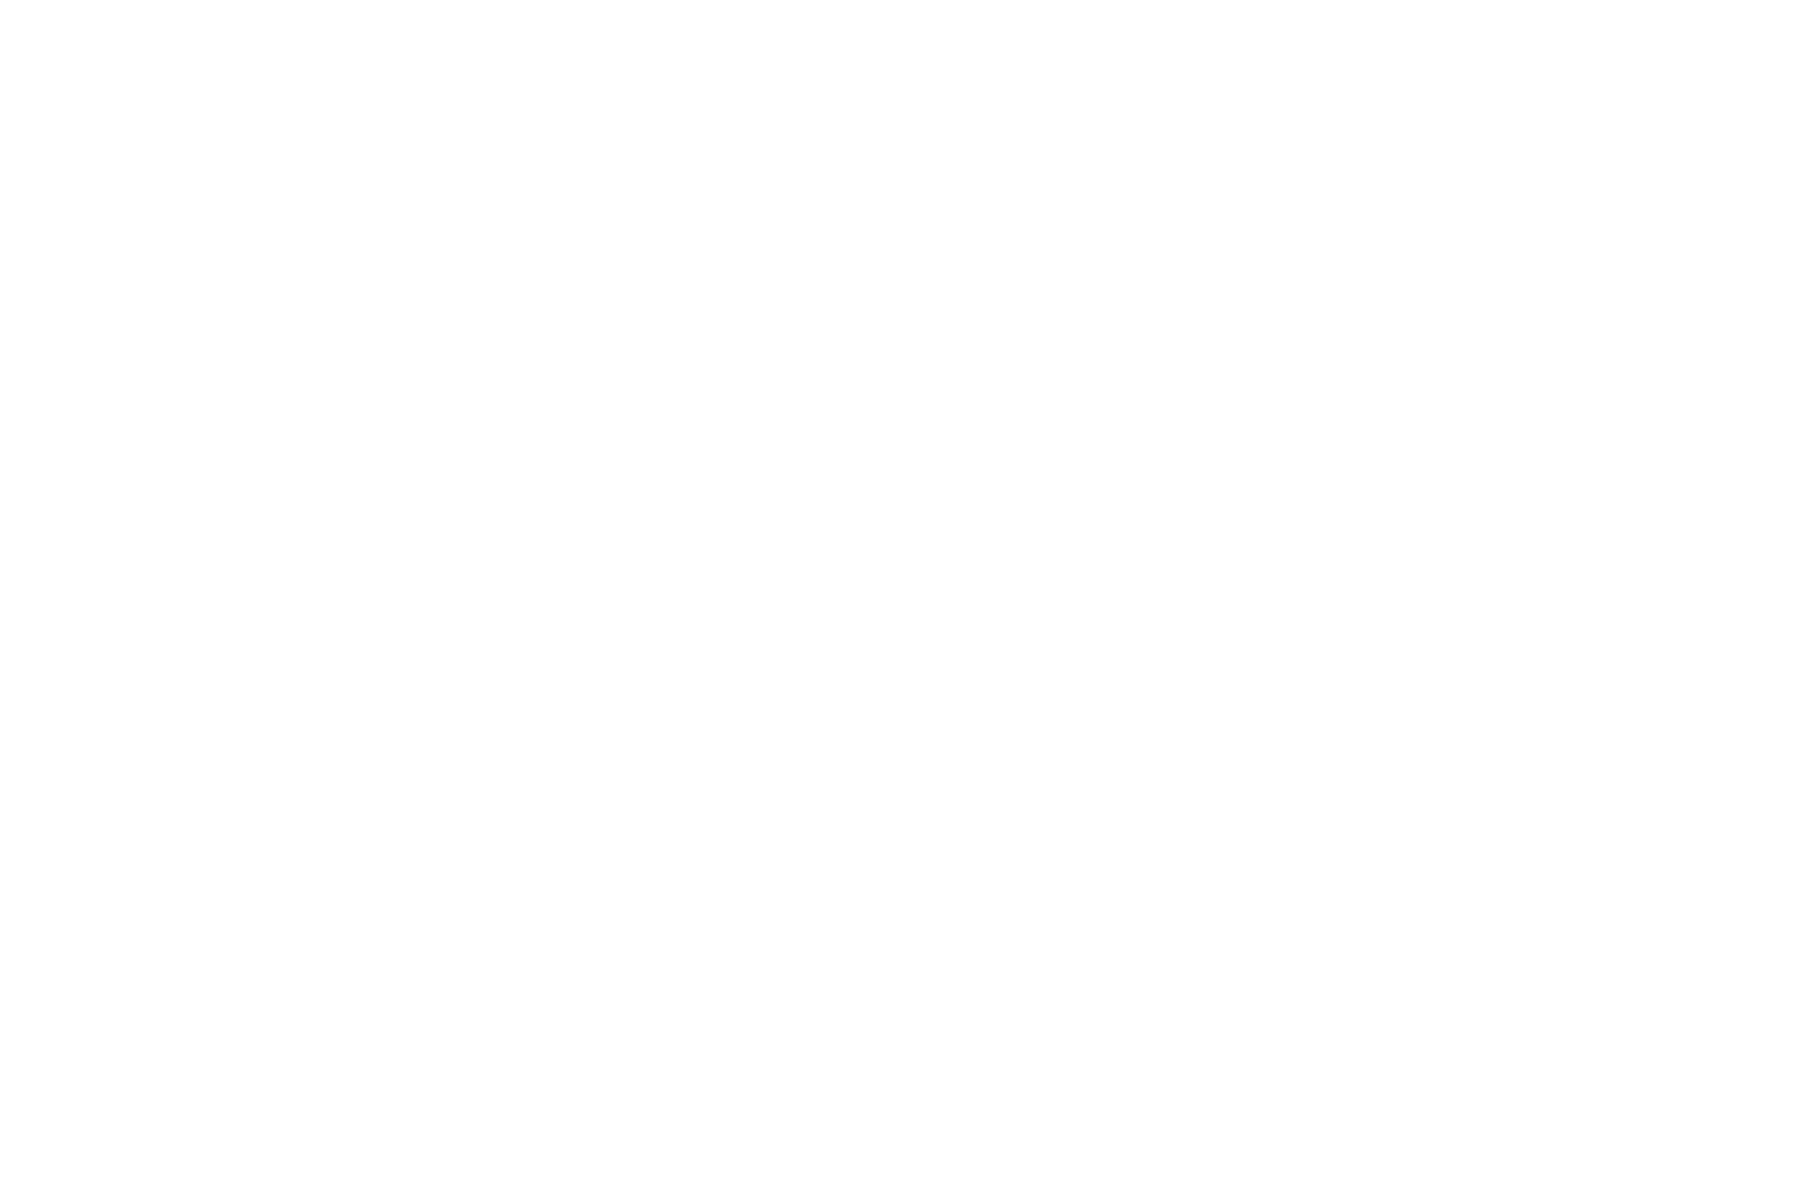

13072021/M18/M180713160427


<IPython.core.display.Javascript object>


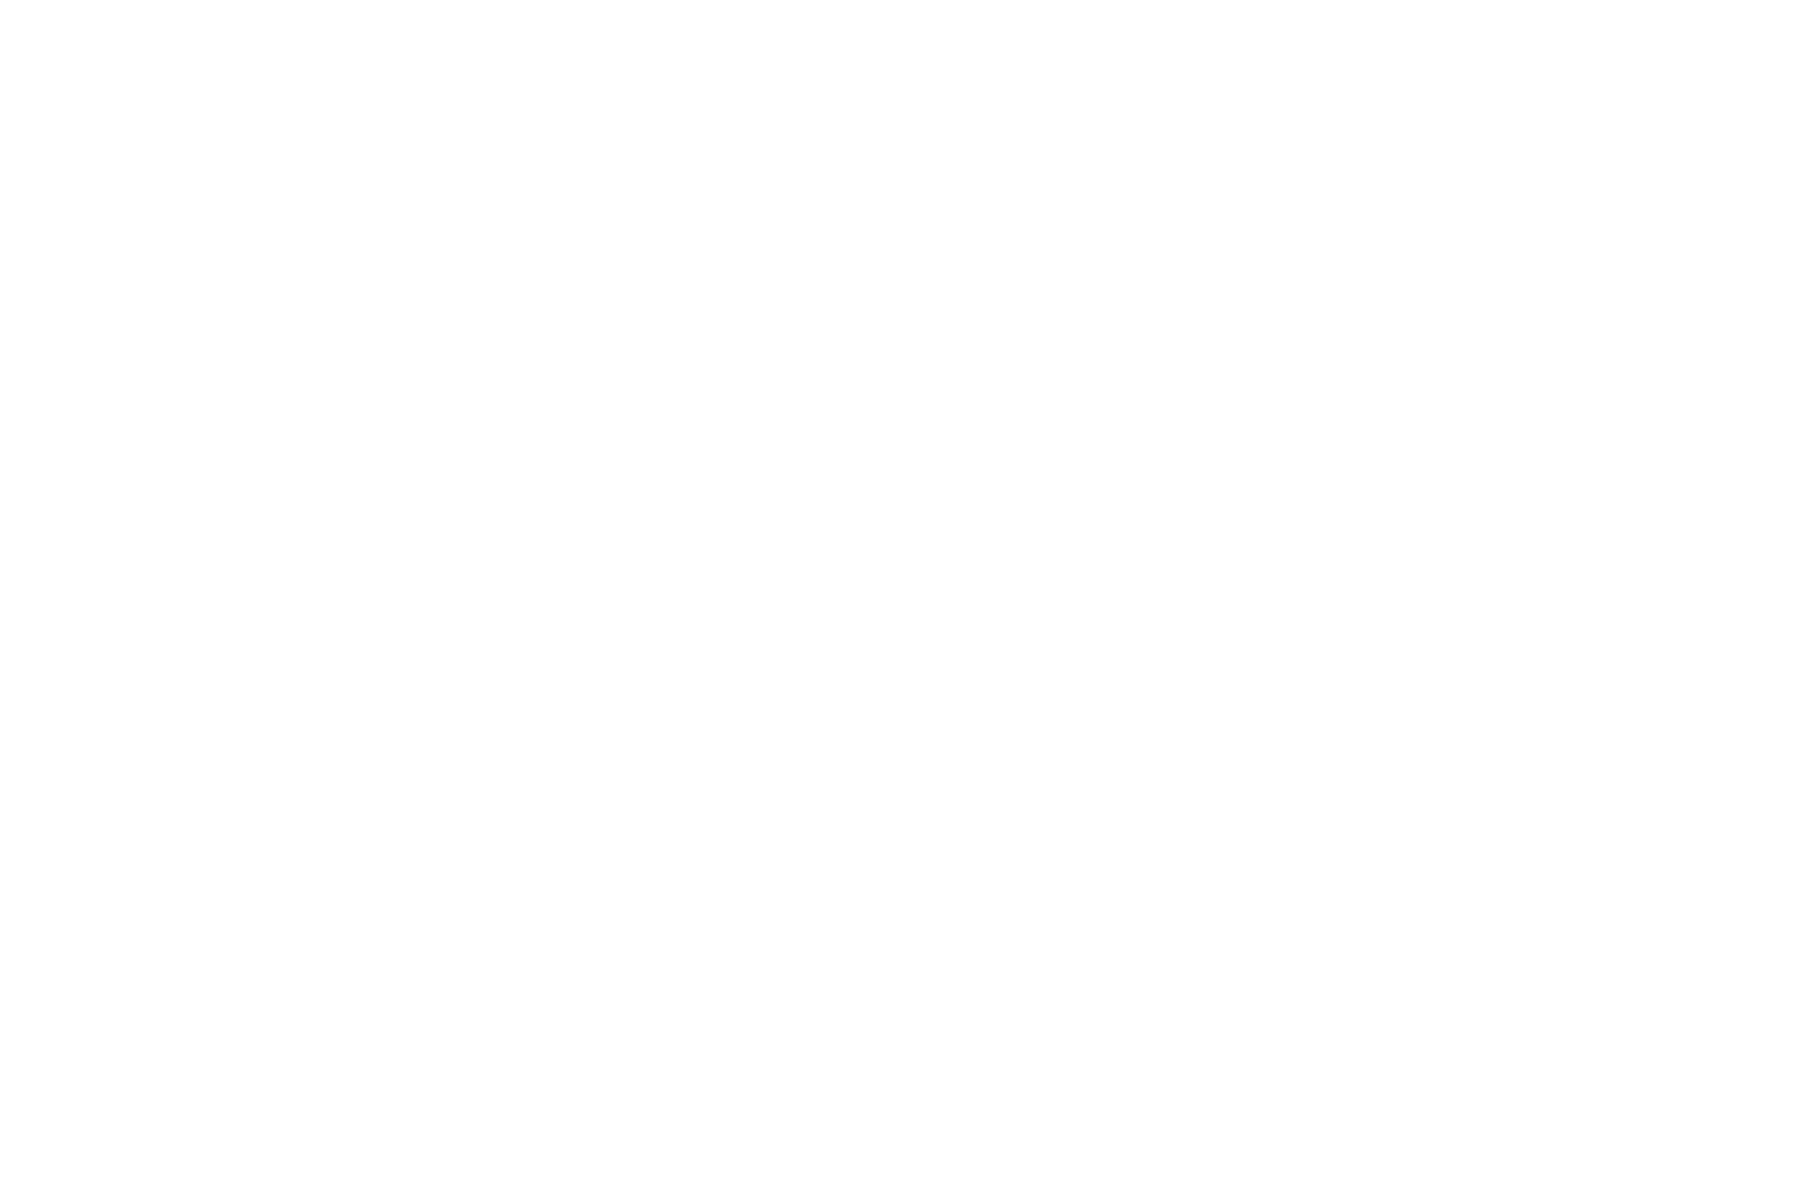

13072021/M18/M180713151102


<IPython.core.display.Javascript object>


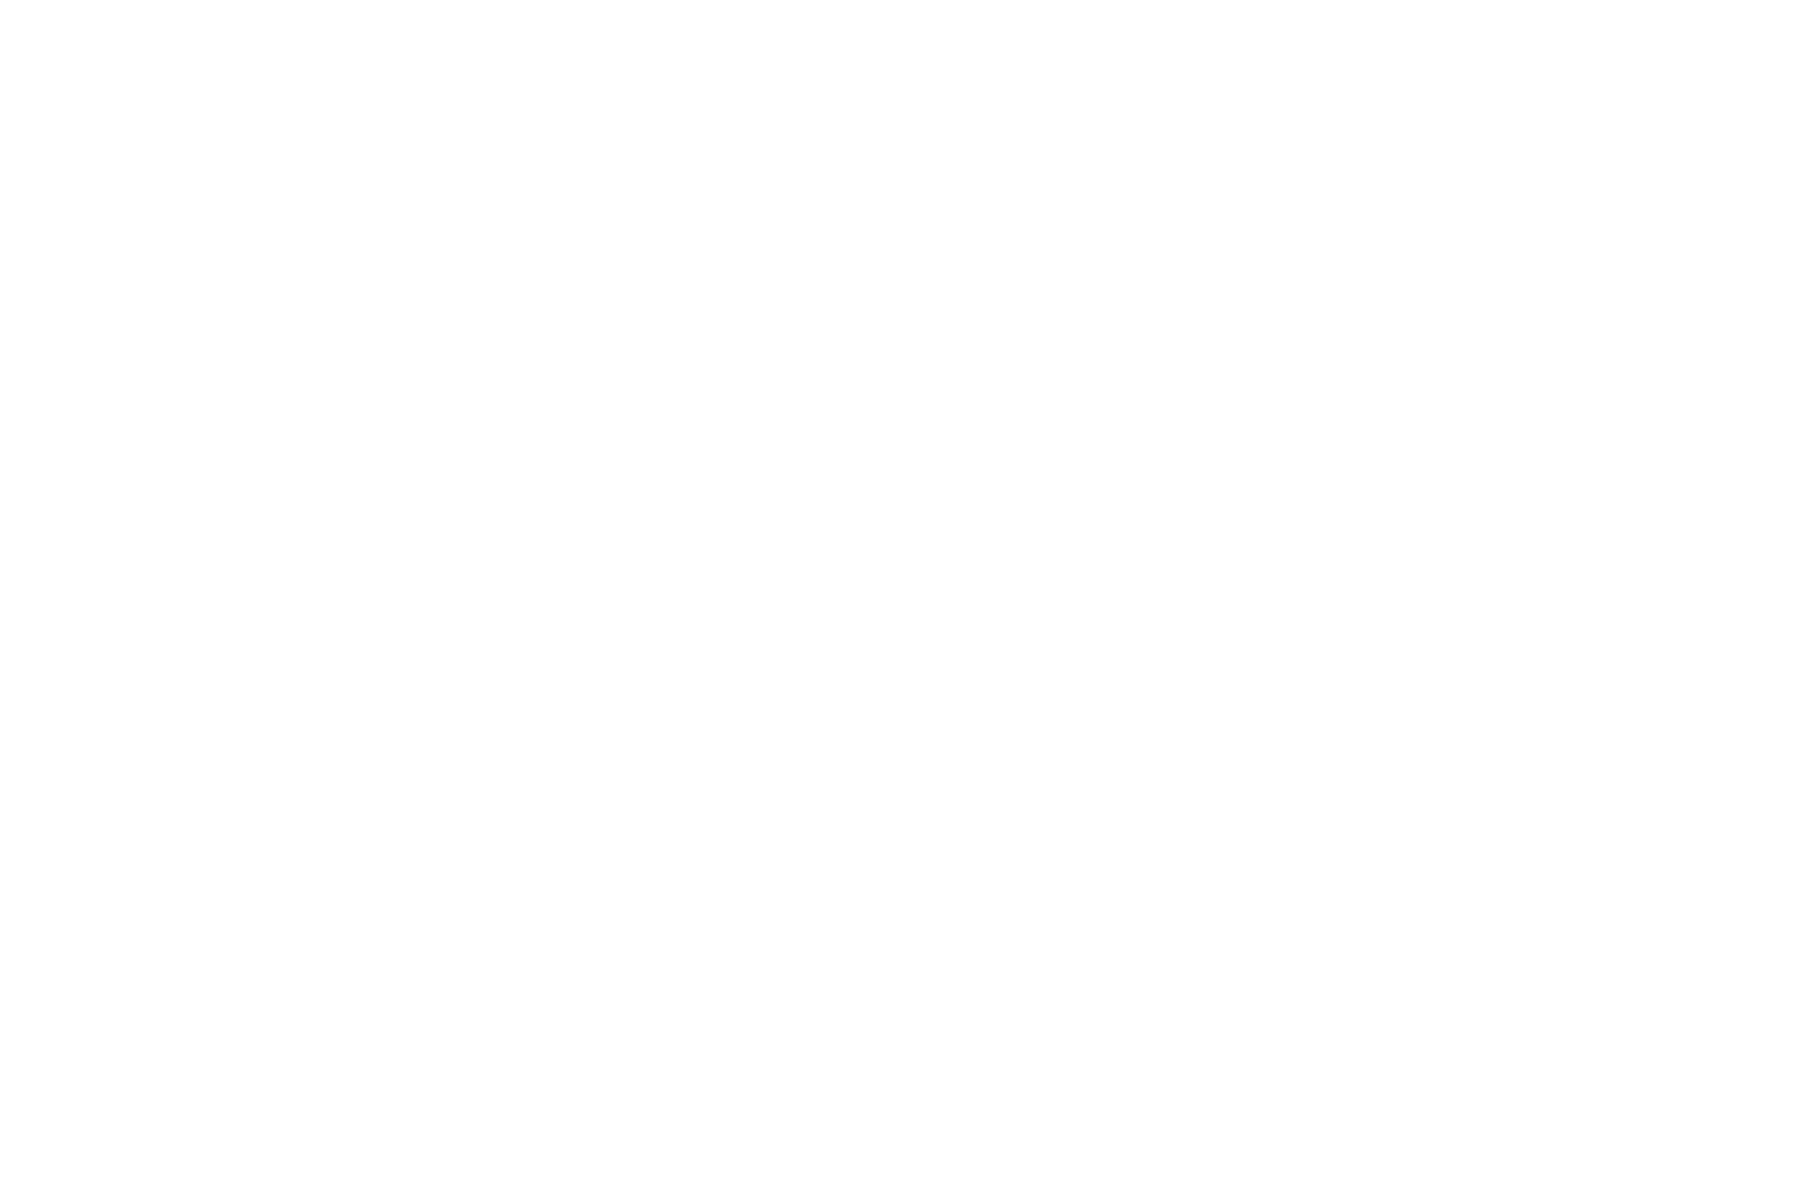

13072021/M20/M200713151908


<IPython.core.display.Javascript object>


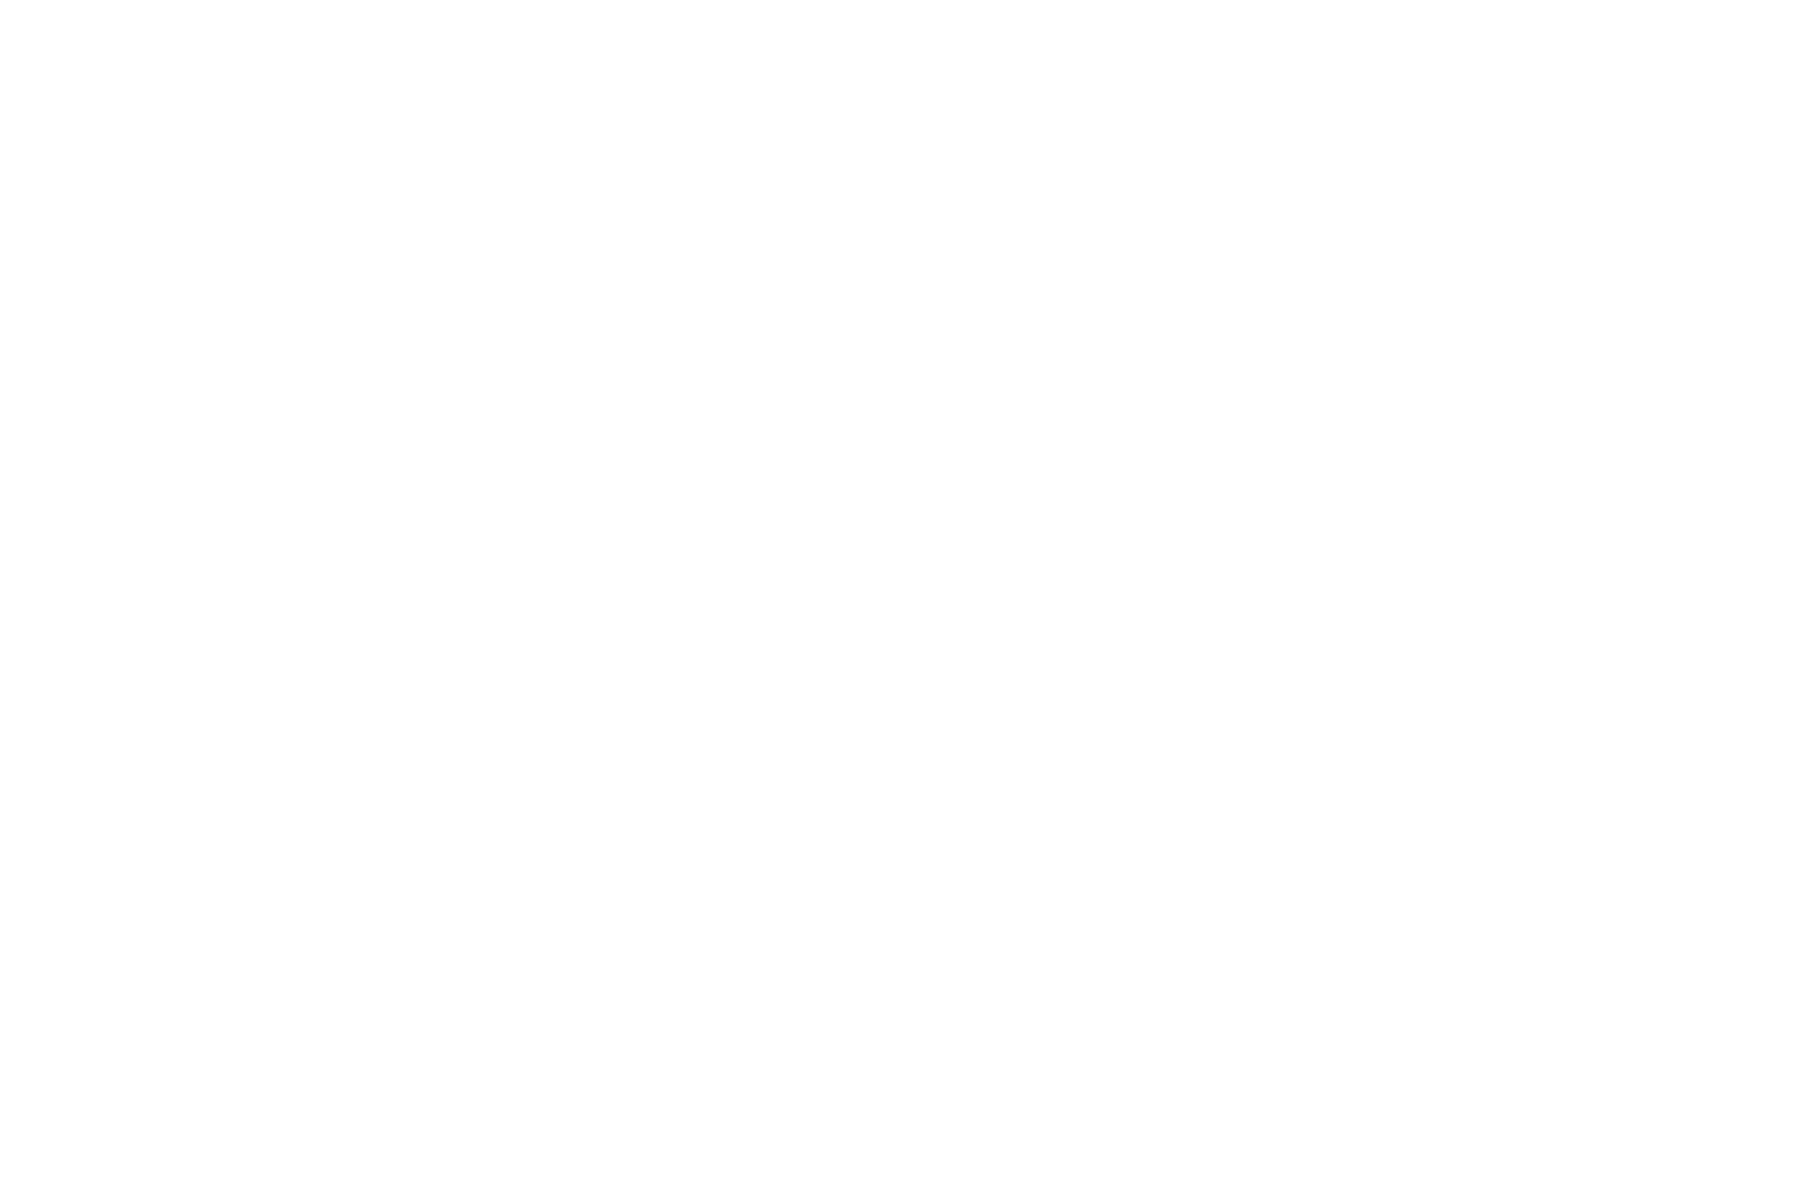

13072021/M21/M210713151106


<IPython.core.display.Javascript object>


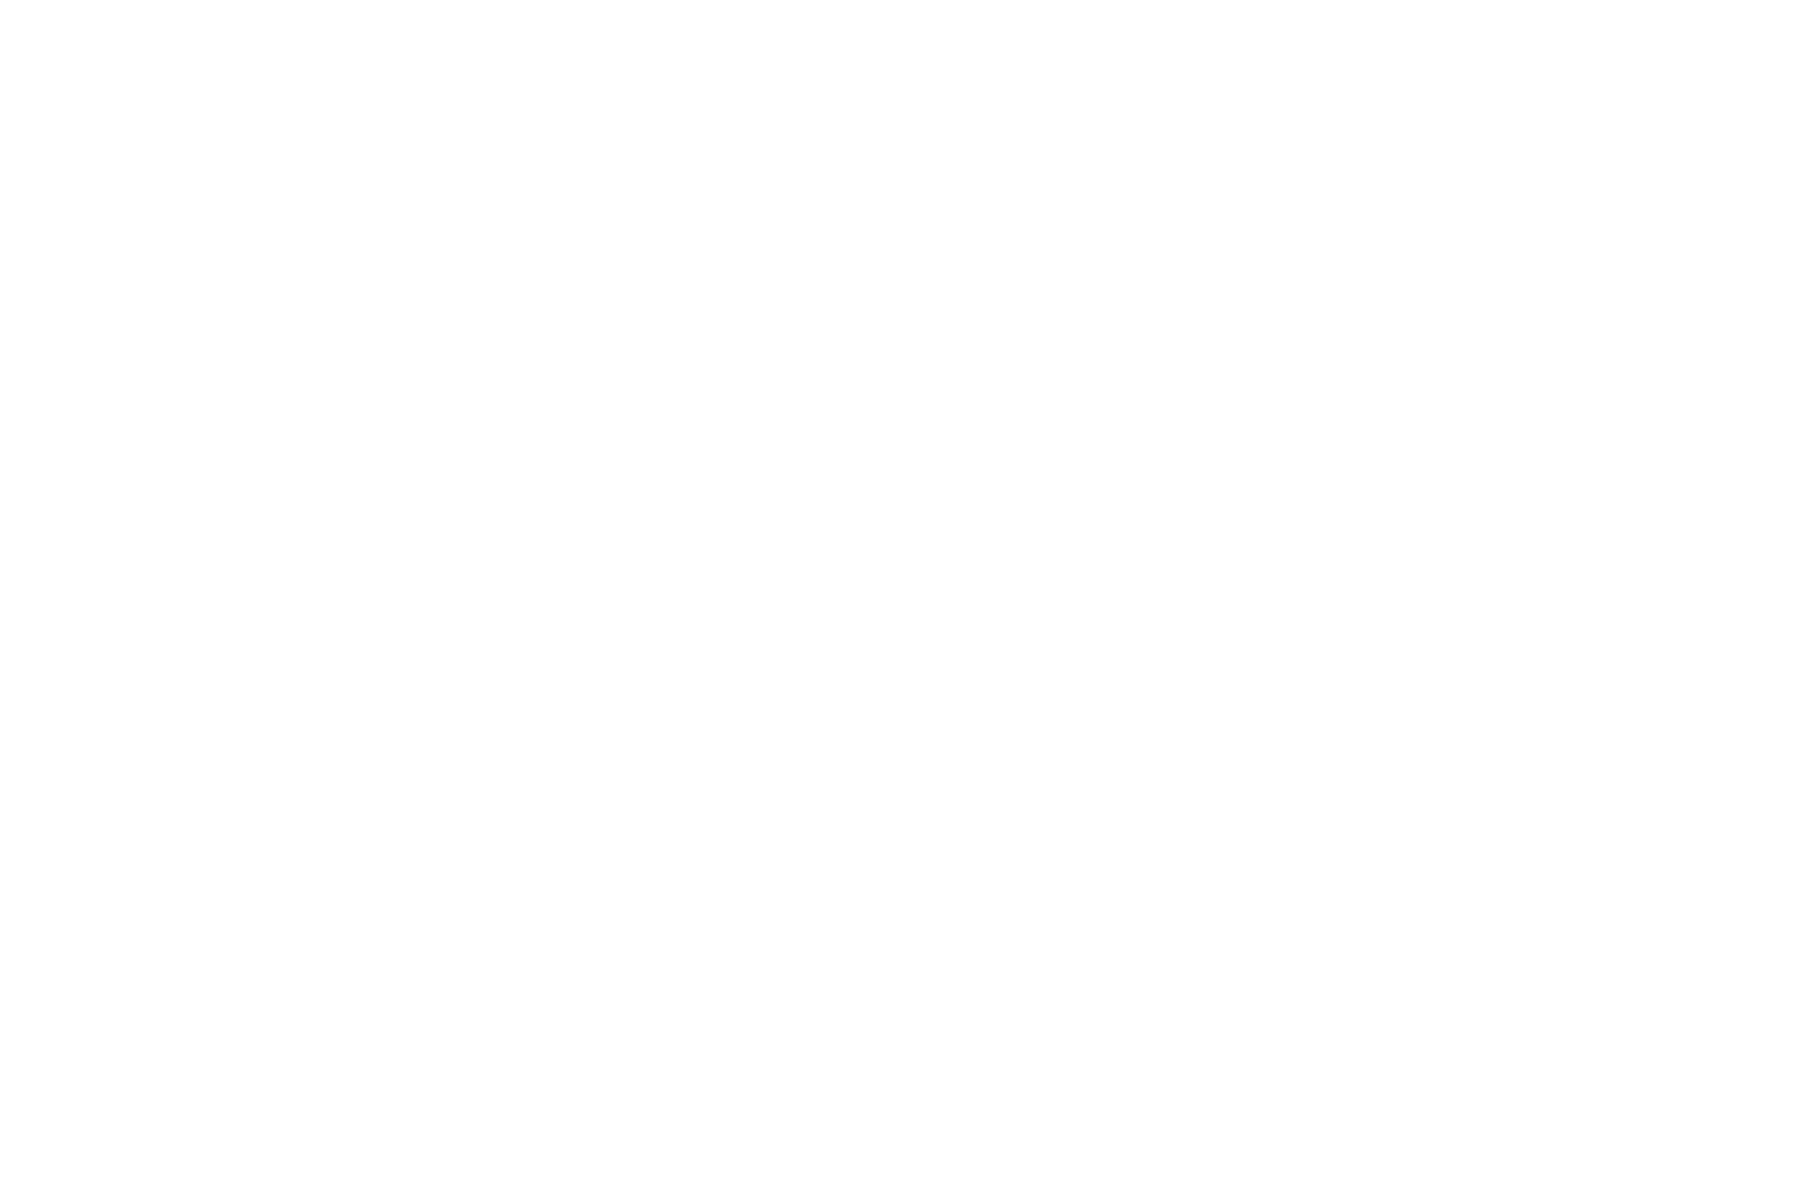

15072021/M09/M090715104232


<IPython.core.display.Javascript object>


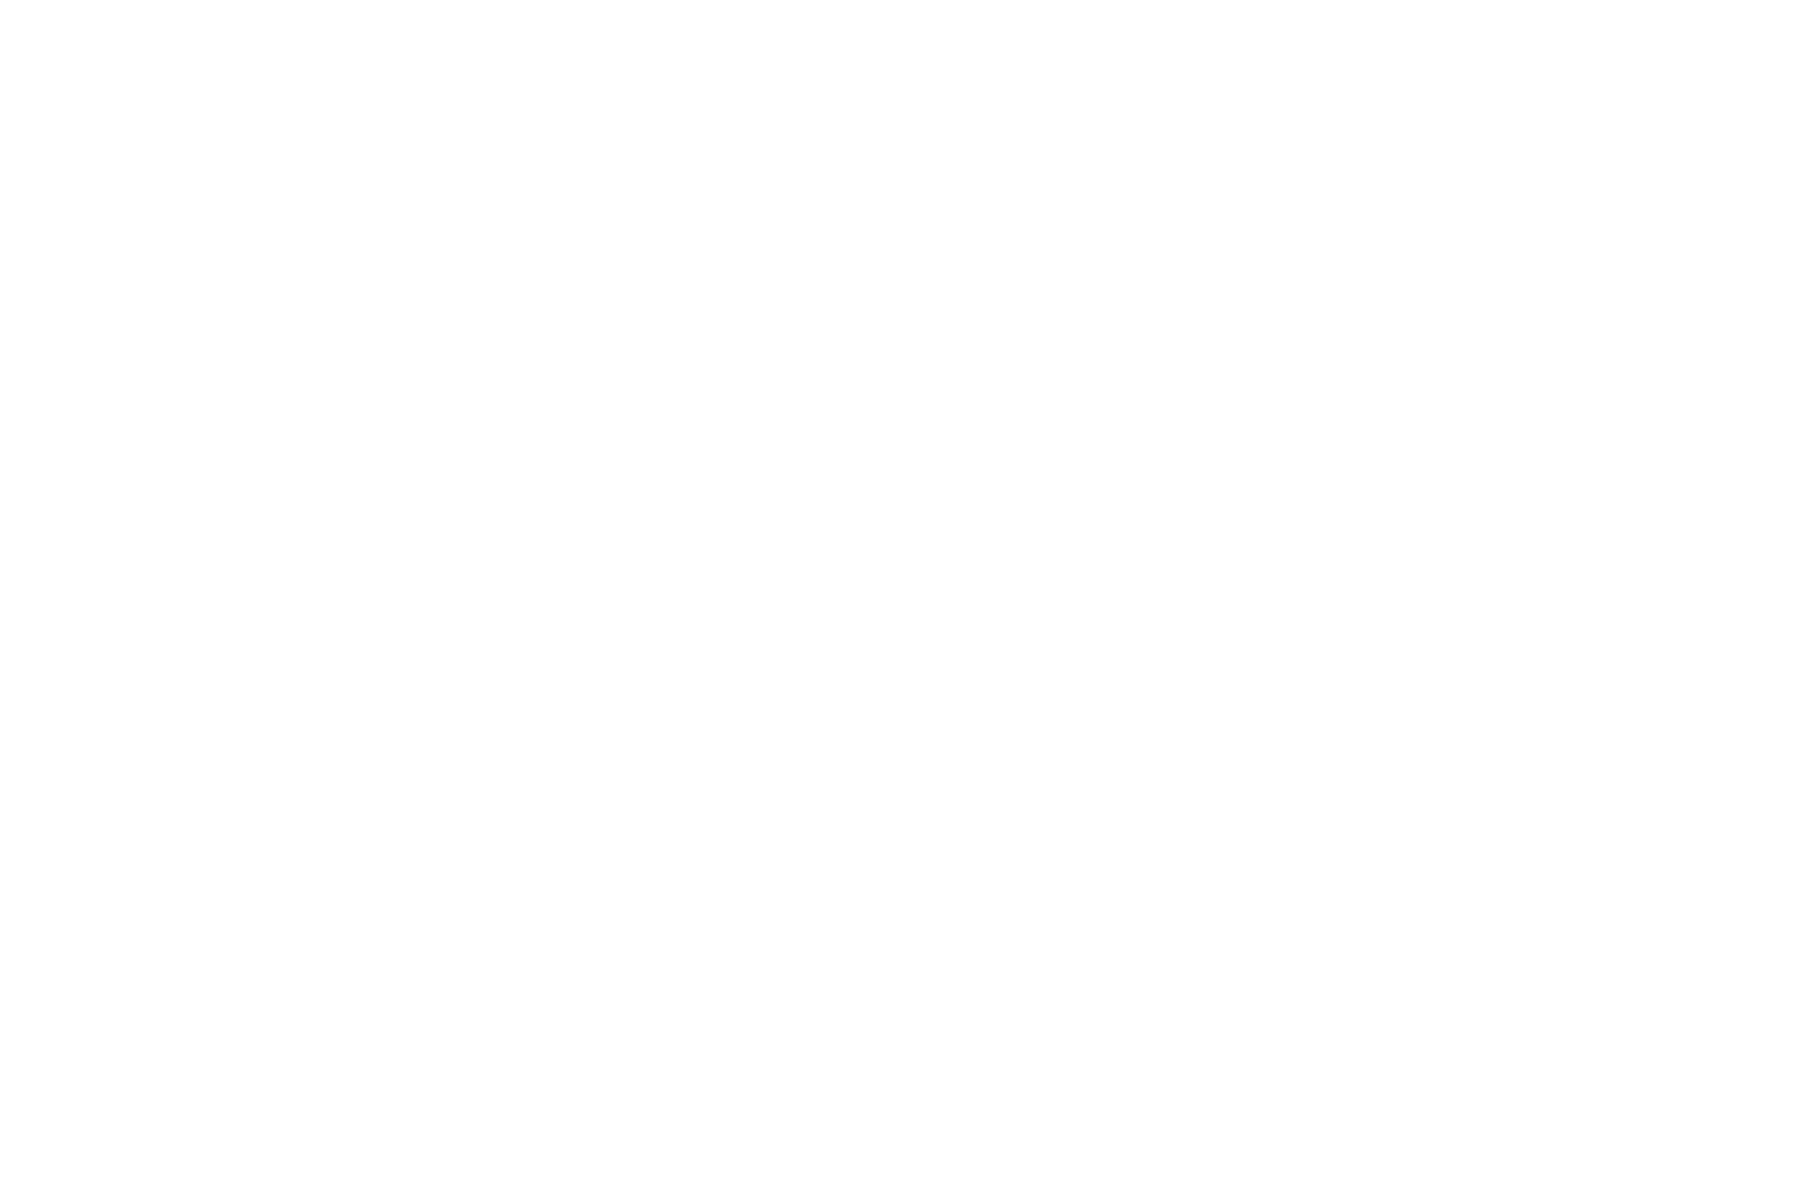

15072021/M09/M090715161901


<IPython.core.display.Javascript object>


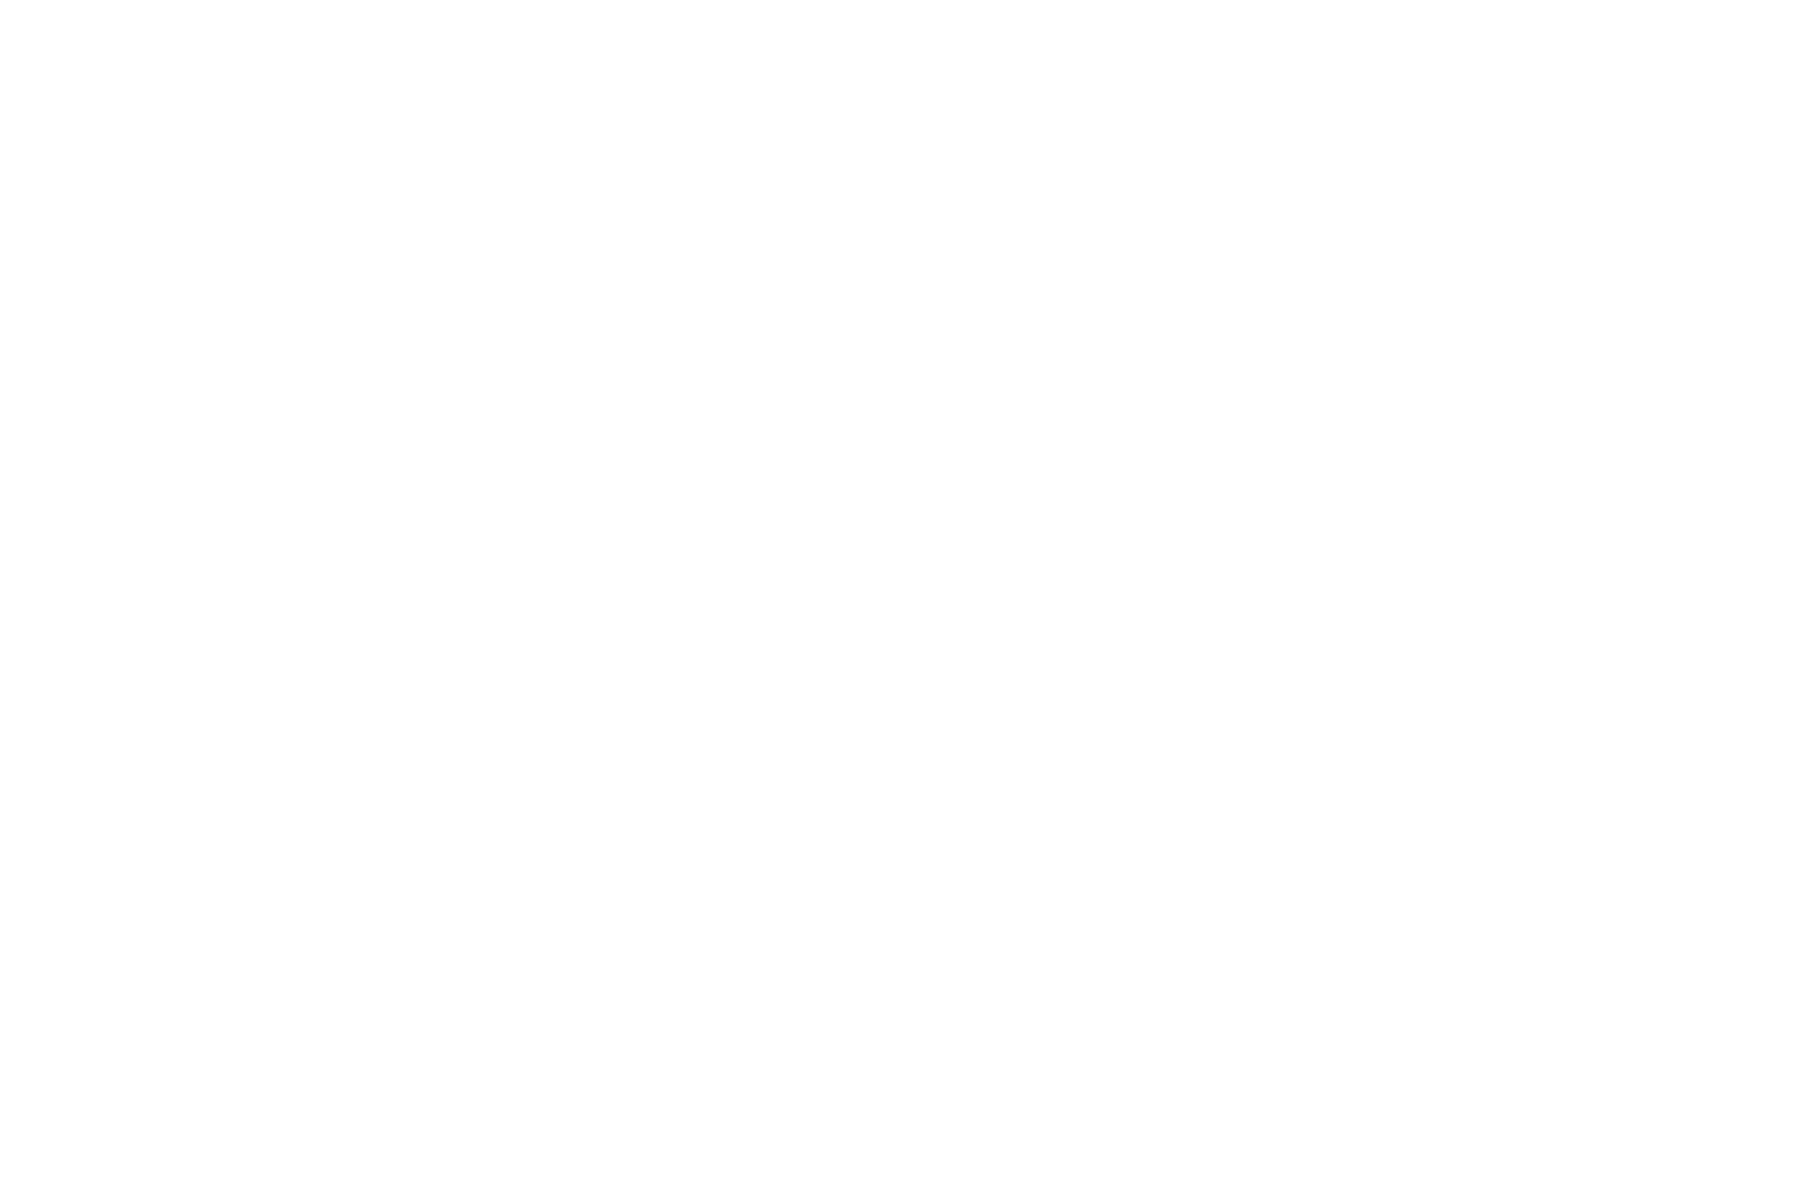

15072021/M14/M140715104256


<IPython.core.display.Javascript object>


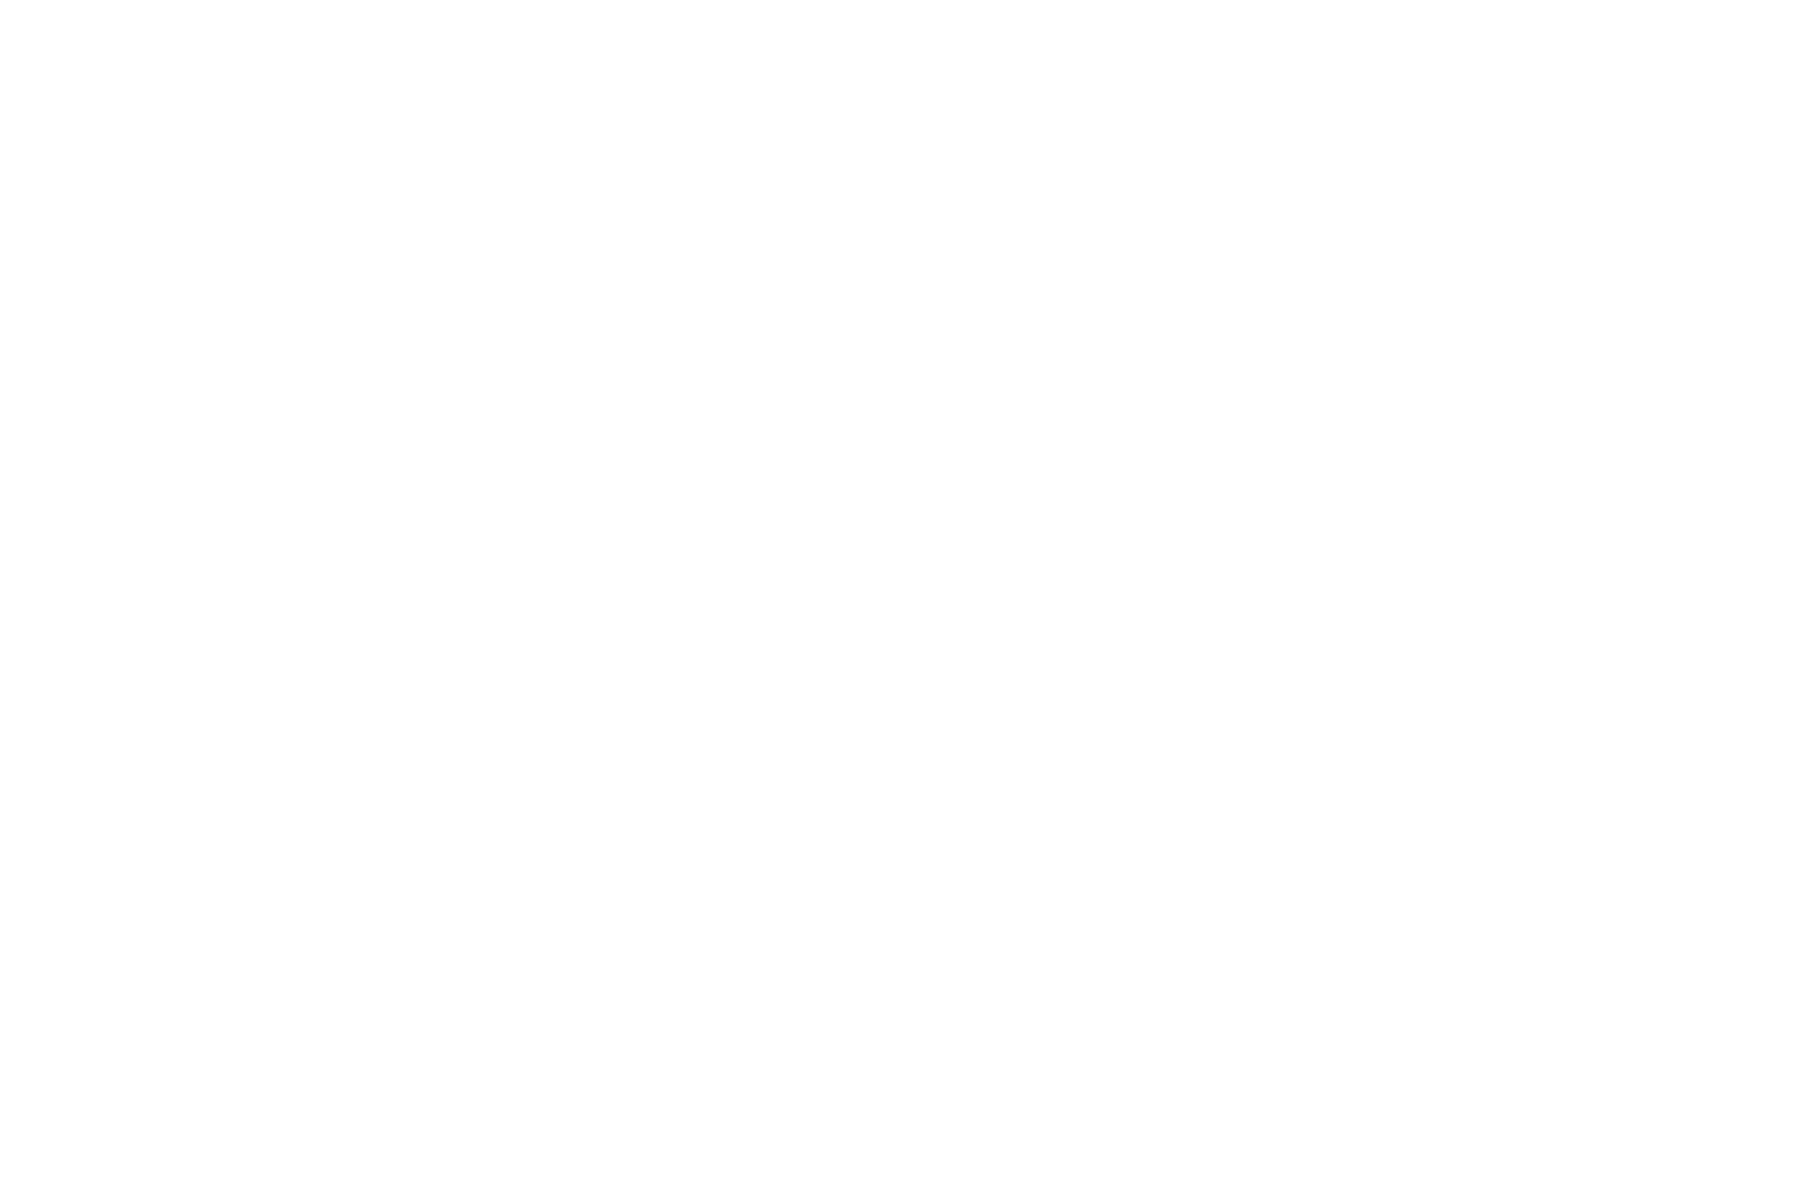

15072021/M15/M150715161817


<IPython.core.display.Javascript object>


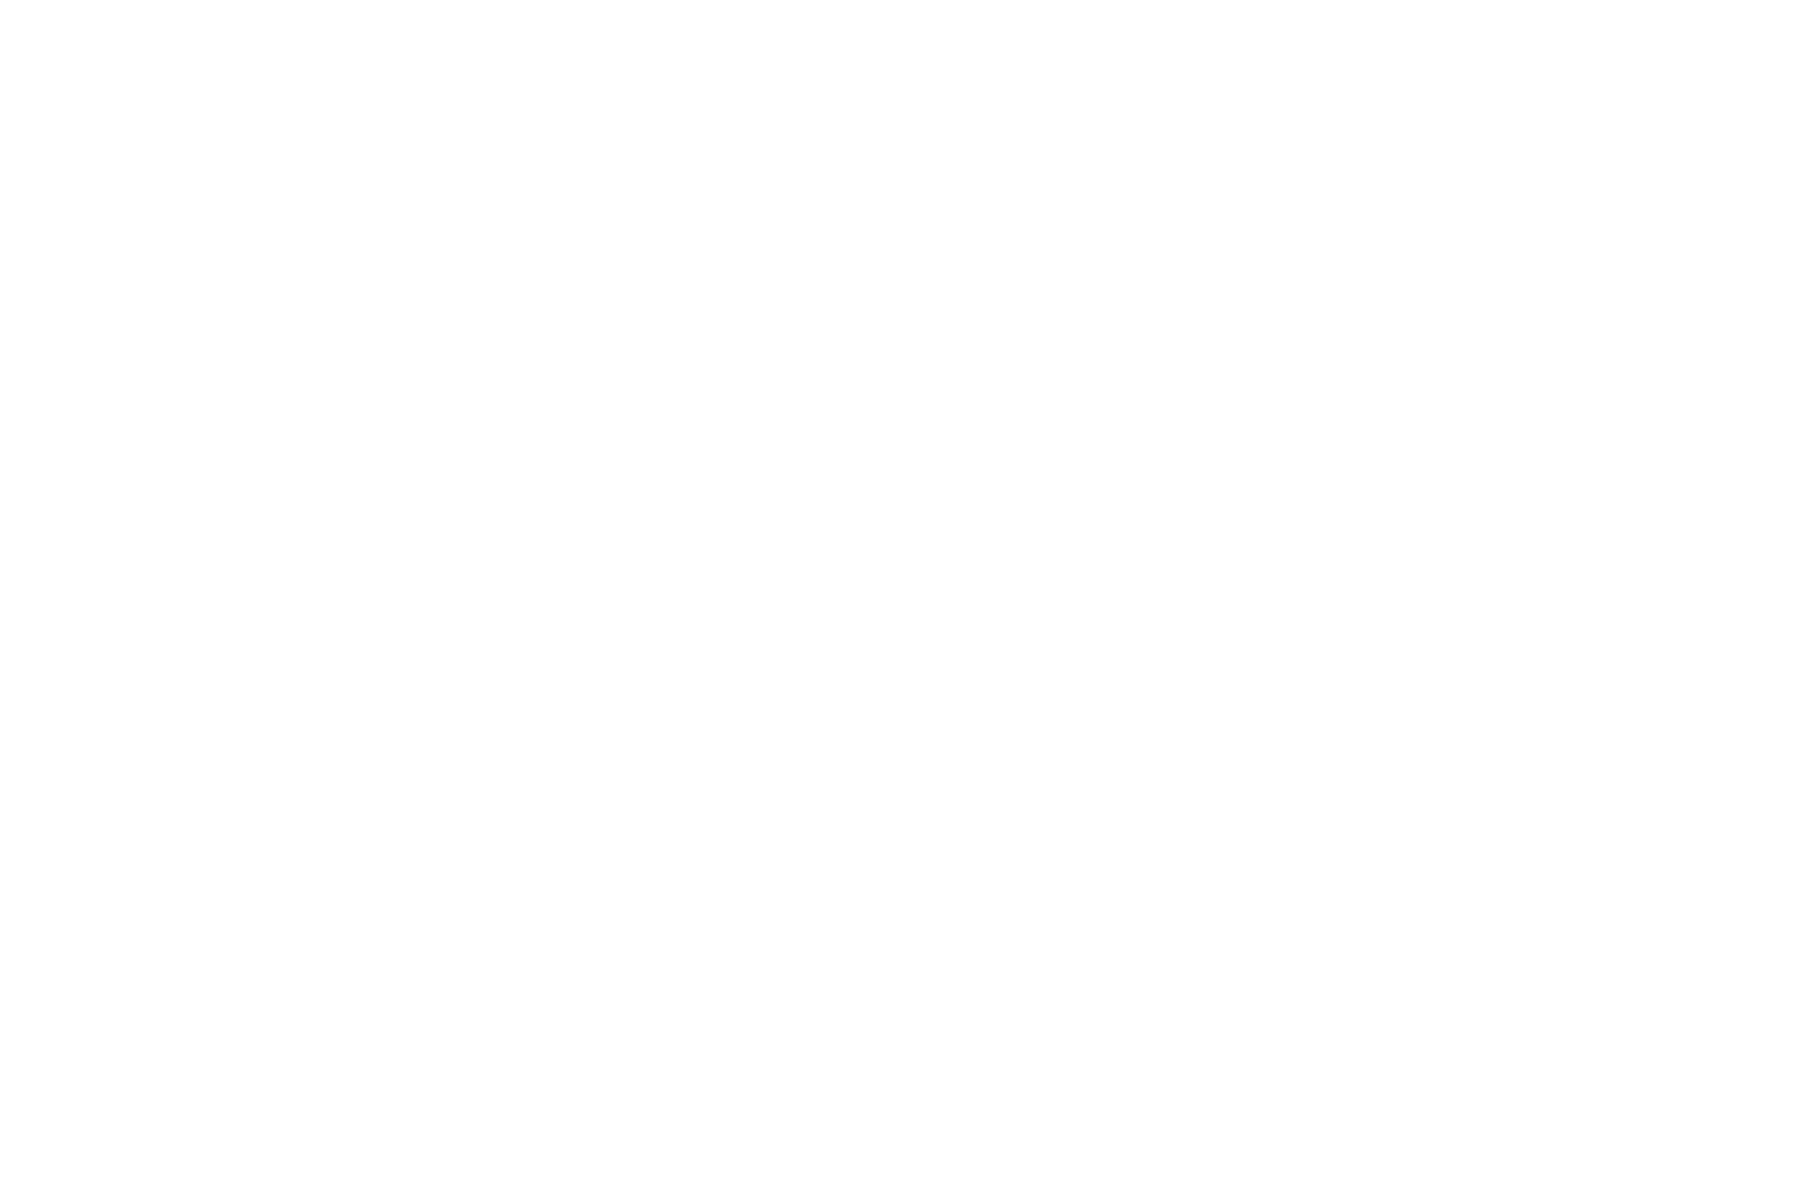

15072021/M15/M150715104249


<IPython.core.display.Javascript object>


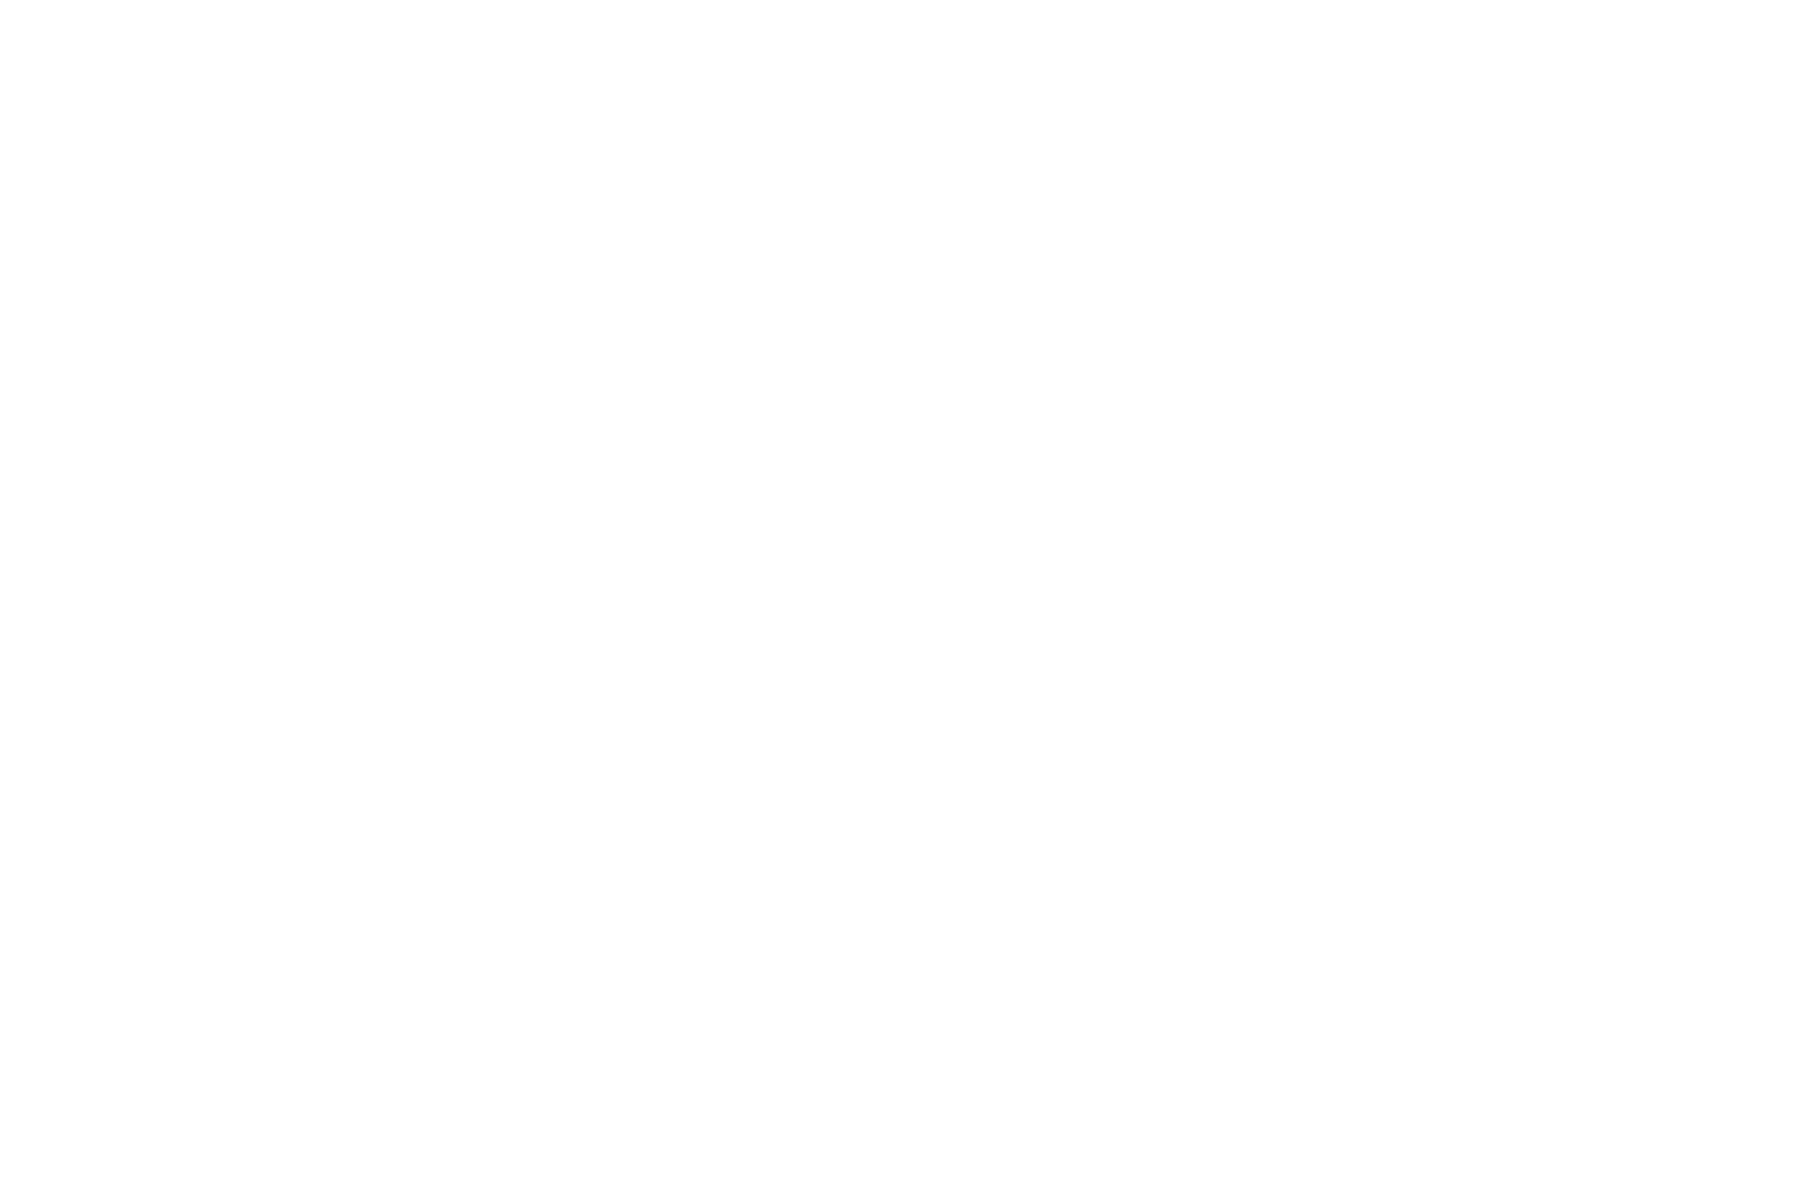

15072021/M16/M160715161745


<IPython.core.display.Javascript object>


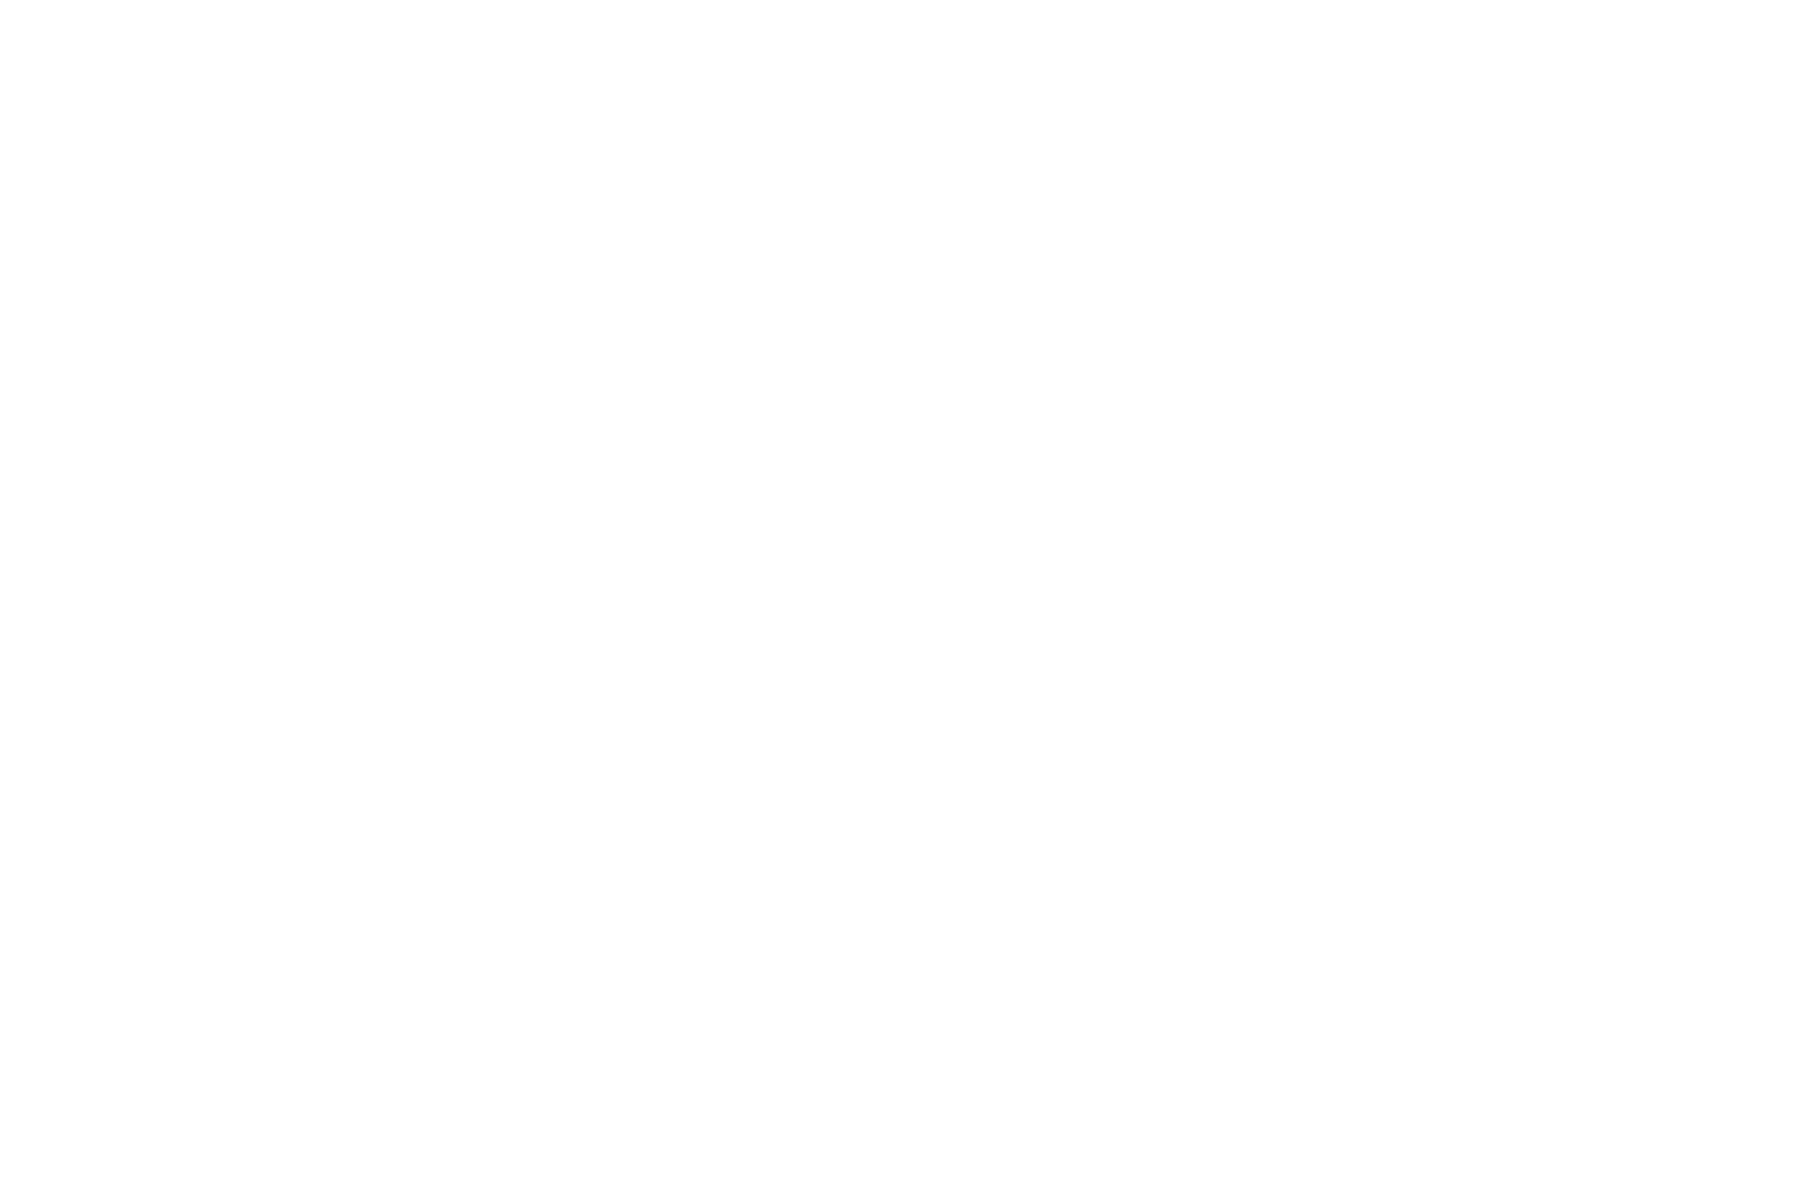

15072021/M18/M180715104333


<IPython.core.display.Javascript object>


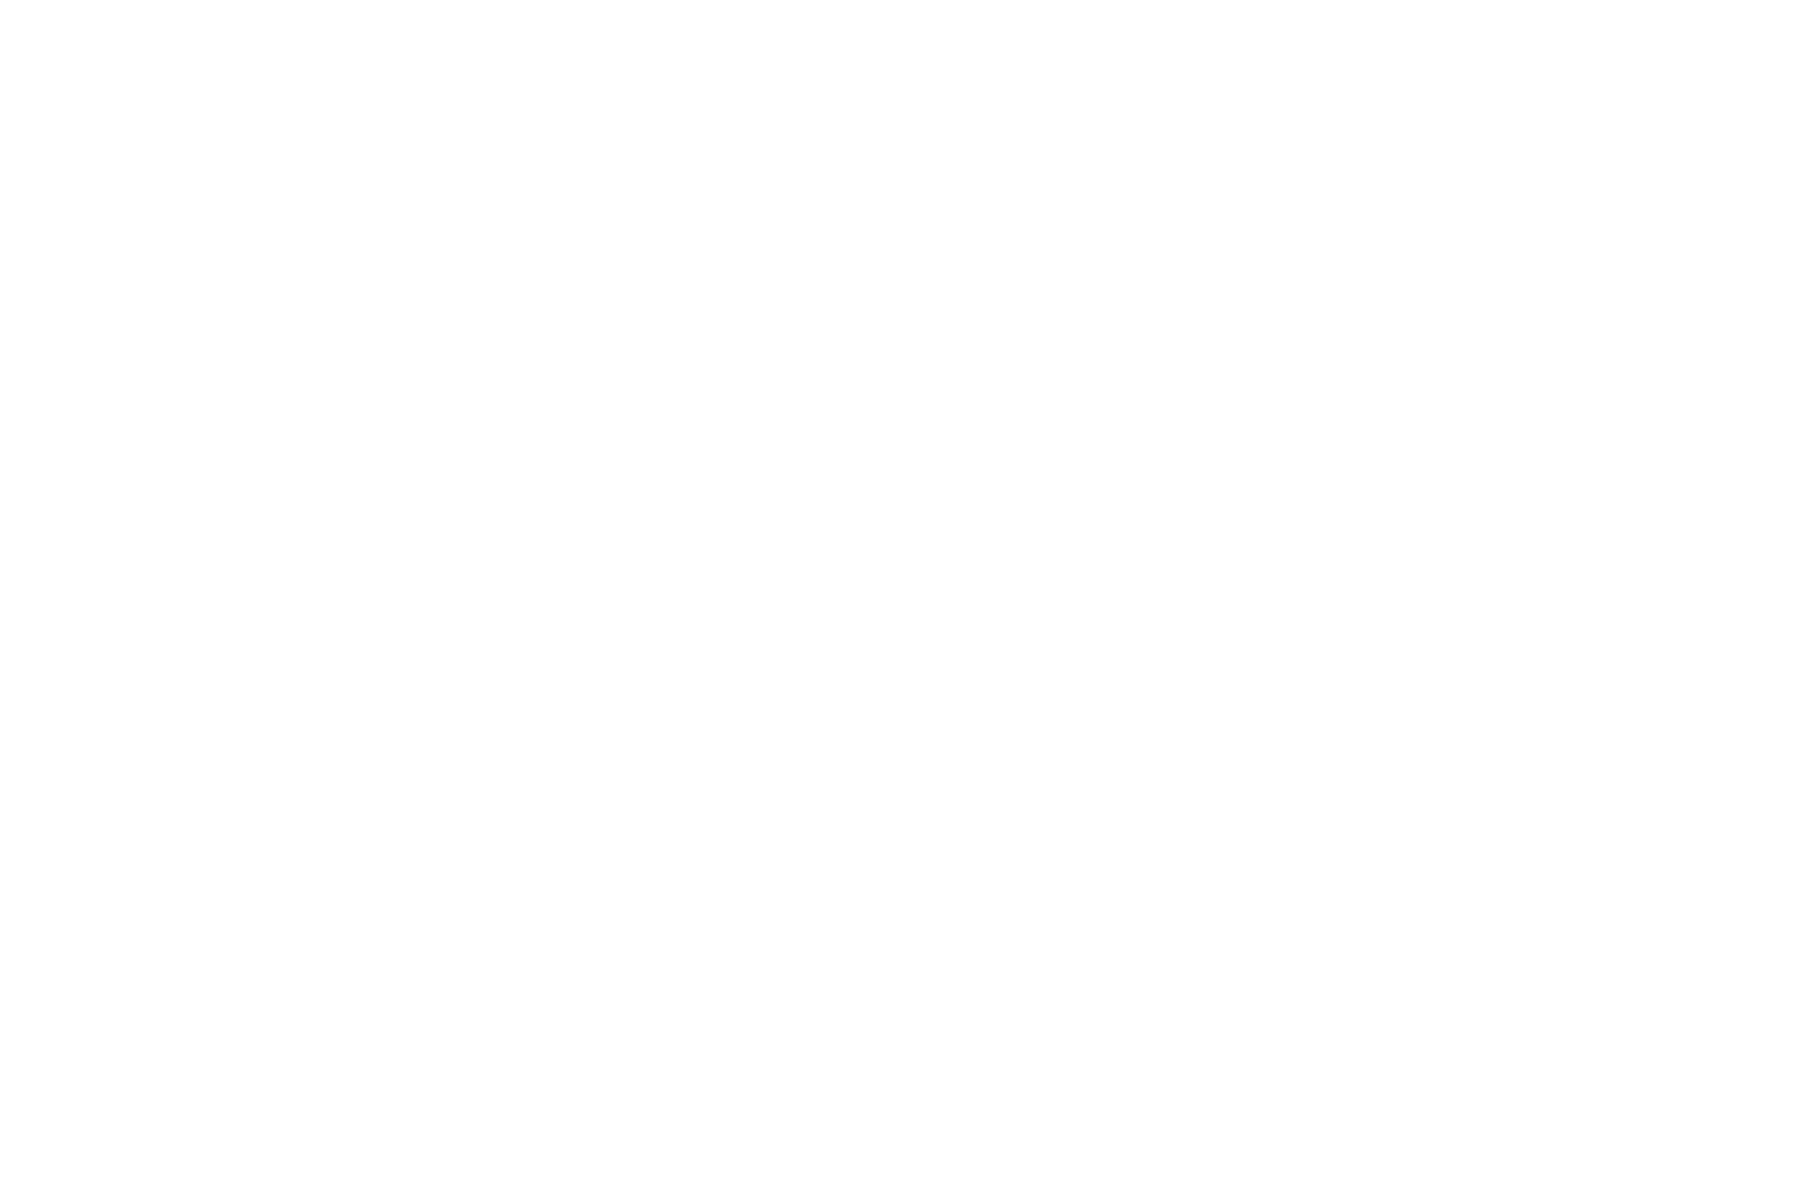

15072021/M19/M190715104424


<IPython.core.display.Javascript object>


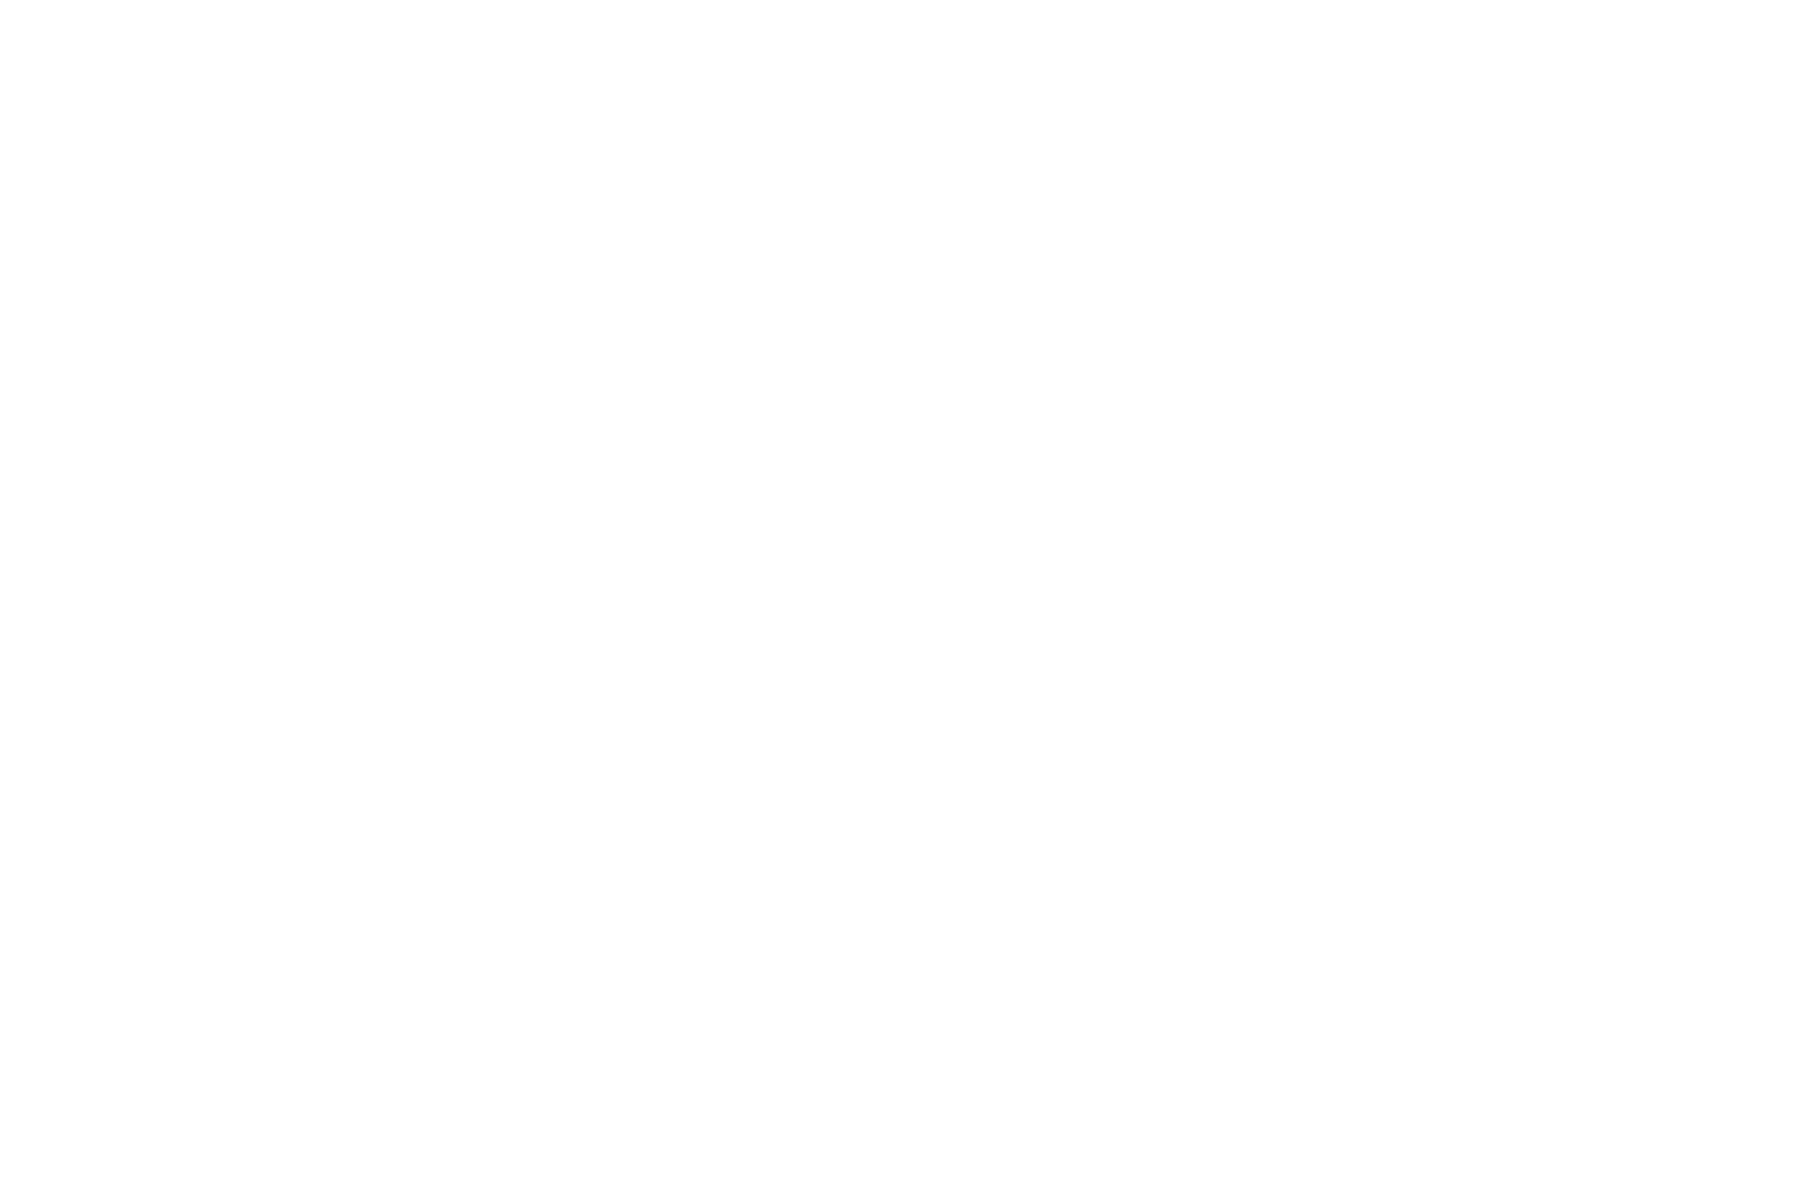

15072021/M21/M210715104407


<IPython.core.display.Javascript object>


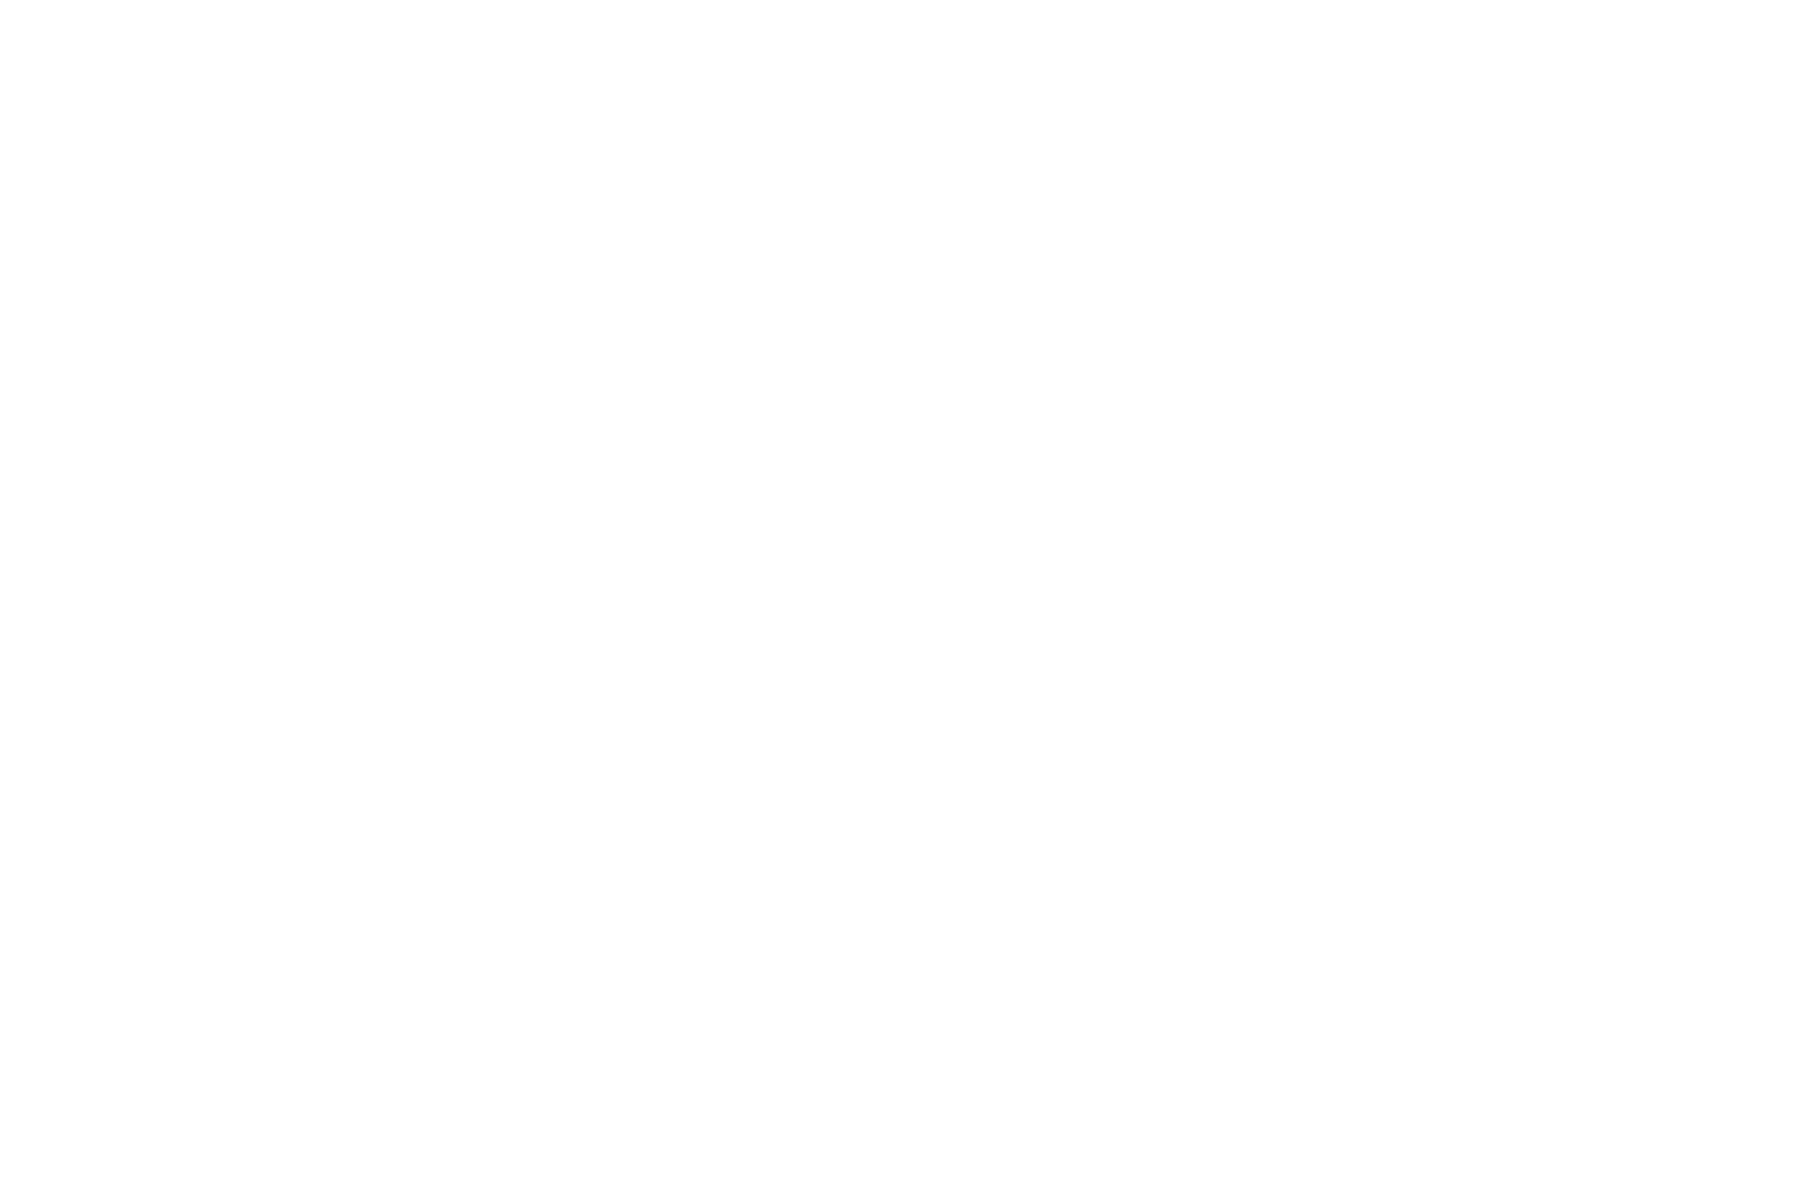

In [34]:
%matplotlib notebook
"""read all filenames from folder system"""
path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial_channel"#common path
filenames = np.array(read_M_series_subfolders(path),dtype=object)
filenames = np.unique(filenames)#remove duplicate files
#M_series_df = Concatonate_M_Series(filenames)

"""13072021/M14"""
M_13_1 = plot_and_slice(filenames[1][0],50100,68920)

"""13072021/M15"""
M_13_2 = plot_and_slice(filenames[2][1],45026,63905)


"""13072021/M16"""

M_13_3 = plot_and_slice(filenames[3][1],56628,83549)

"""13072021/M18"""
M_13_4 = plot_and_slice(filenames[5][0],61914,80133)
M_13_5 = plot_and_slice(filenames[5][2],25987,42833)

"""13072021/M20/M200713151908"""
M_13_6 = plot_and_slice(filenames[7][0],5900,-1)#incomplete?

"""13072021/M21"""

M_13_6 = plot_and_slice(filenames[8][1],32560,49500)



"""15072021/M09"""
M_15_1 = plot_and_slice(filenames[10][0],49896,70100)
M_15_2 = plot_and_slice(filenames[10][1],13305,32185)

"""15072021/M14"""
M_15_3 = plot_and_slice(filenames[11][0],21900,41250)


"""15072021/M15"""
M_15_4 = plot_and_slice(filenames[12][0],18370,37150)
M_15_5 = plot_and_slice(filenames[12][1],16040,36250)

"""15072021/M16"""
M_15_6 = plot_and_slice(filenames[13][0],21570,40900)


"""15072021/M18"""
M_15_7 = plot_and_slice(filenames[15][0],22440,41700)

"""15072021/M19"""
M_15_8 = plot_and_slice(filenames[16][1],22770,41400)

"""15072021/M21"""
M_15_9 = plot_and_slice(filenames[18][0],29570,48750)



plt.close("all")

17072021/M03/M030717135325


<IPython.core.display.Javascript object>


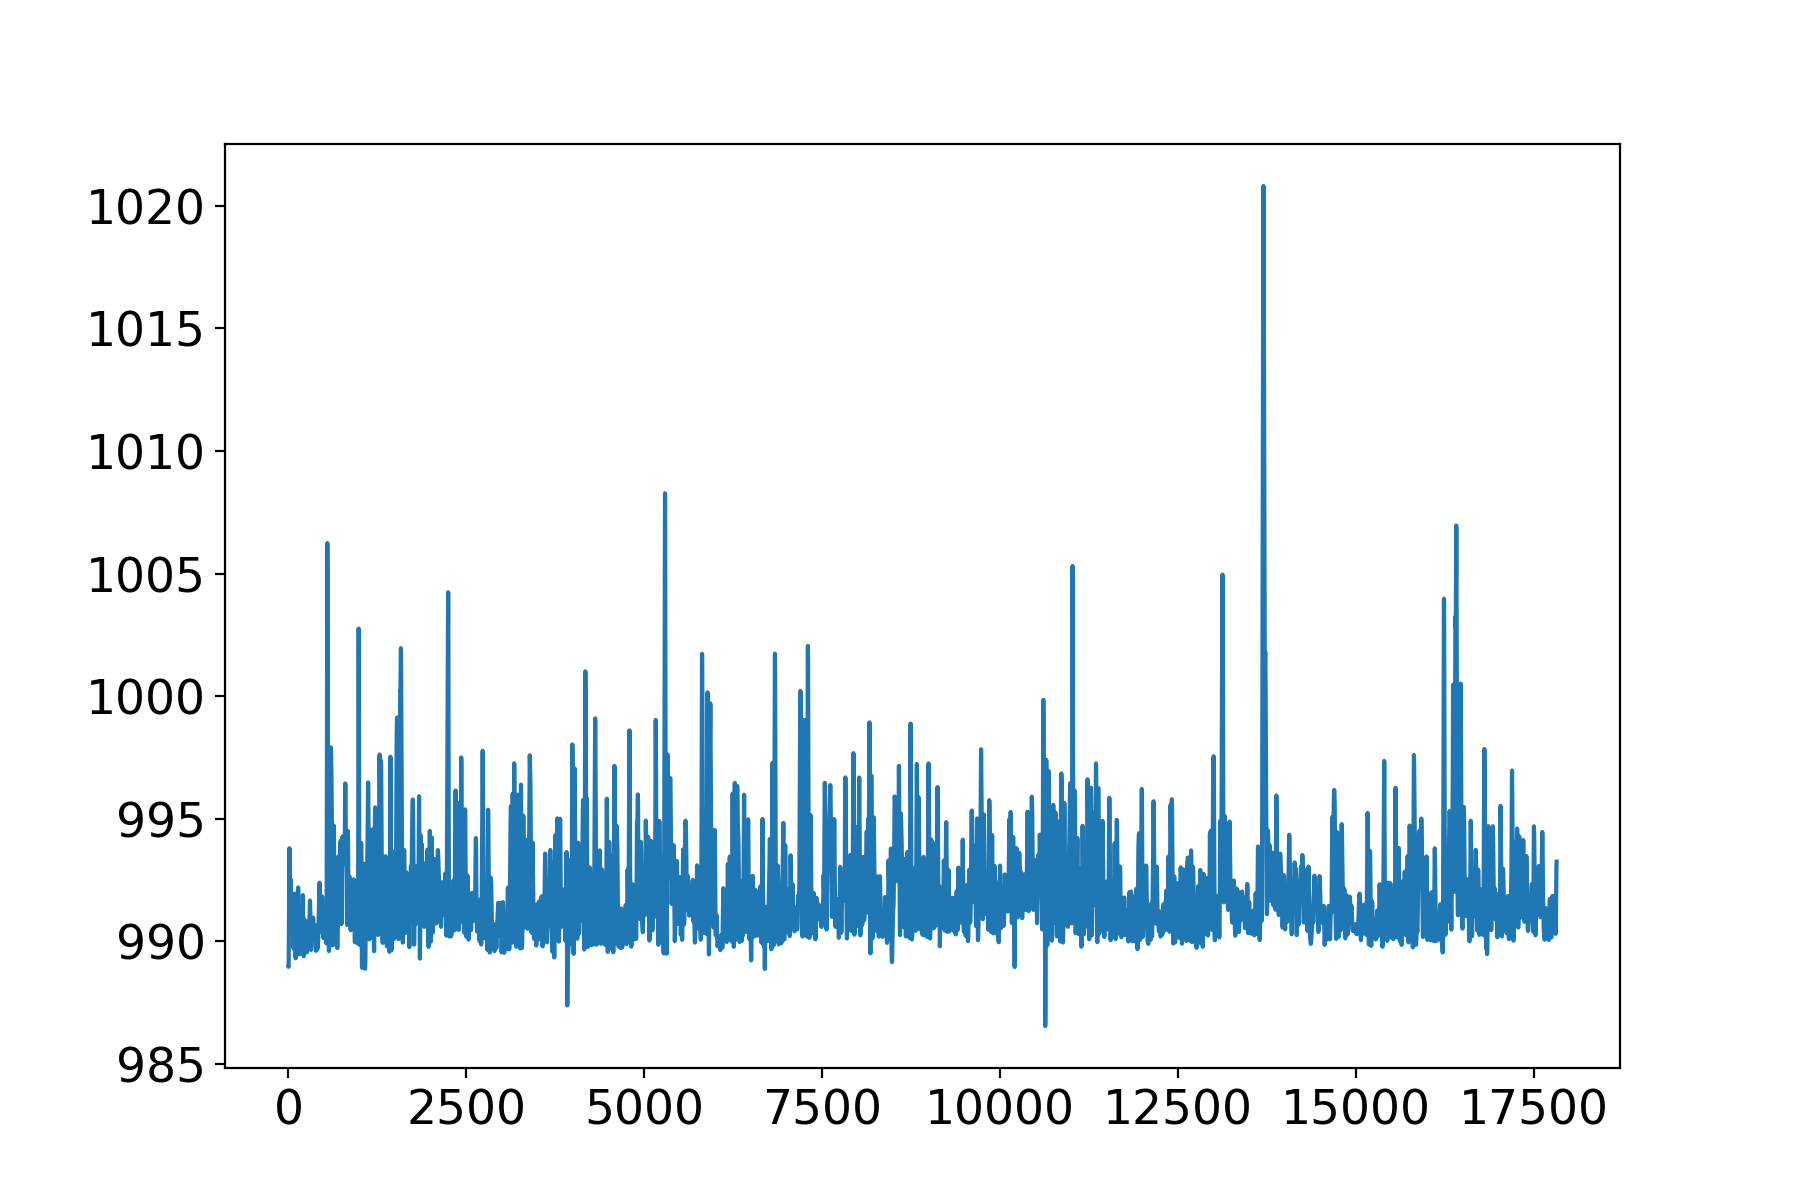

17072021/M05/M050717135331


<IPython.core.display.Javascript object>


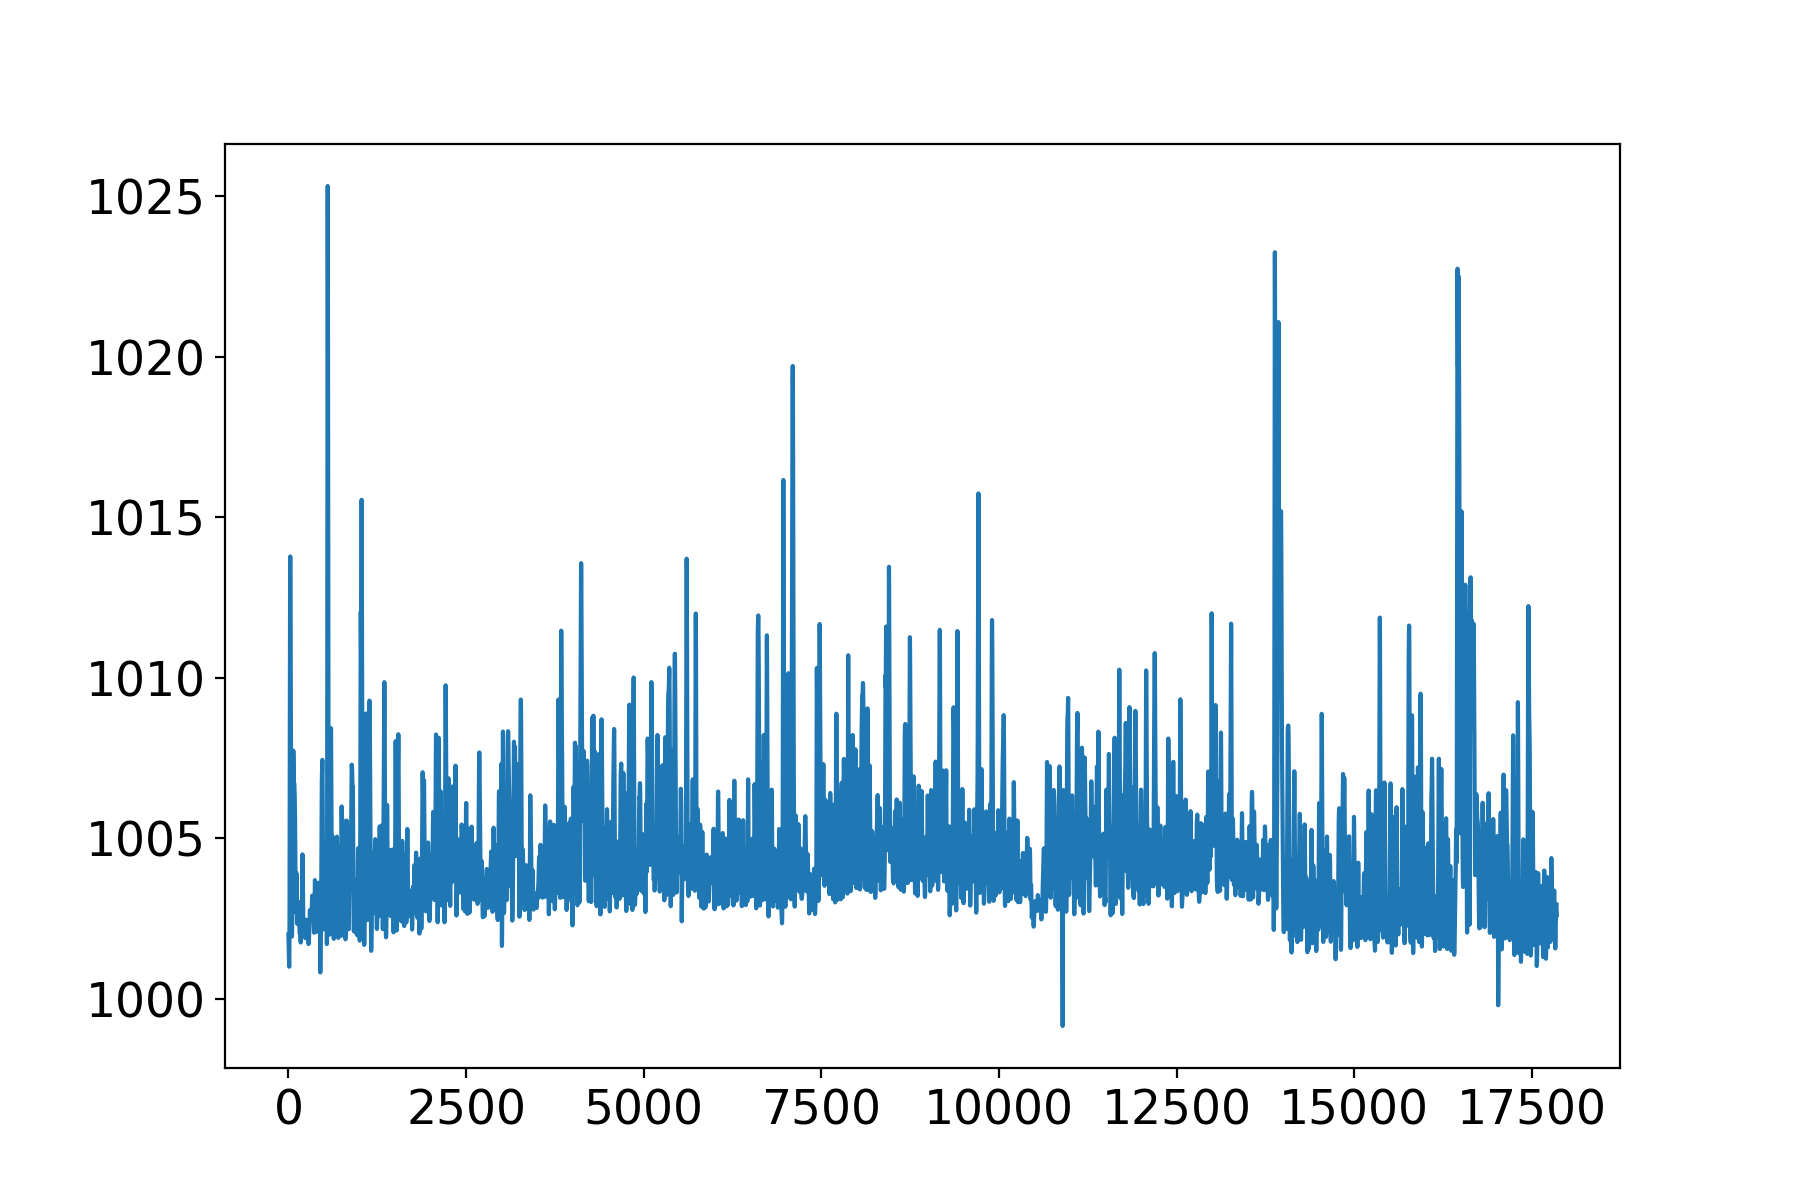

17072021/M08/M08-0717135422


<IPython.core.display.Javascript object>


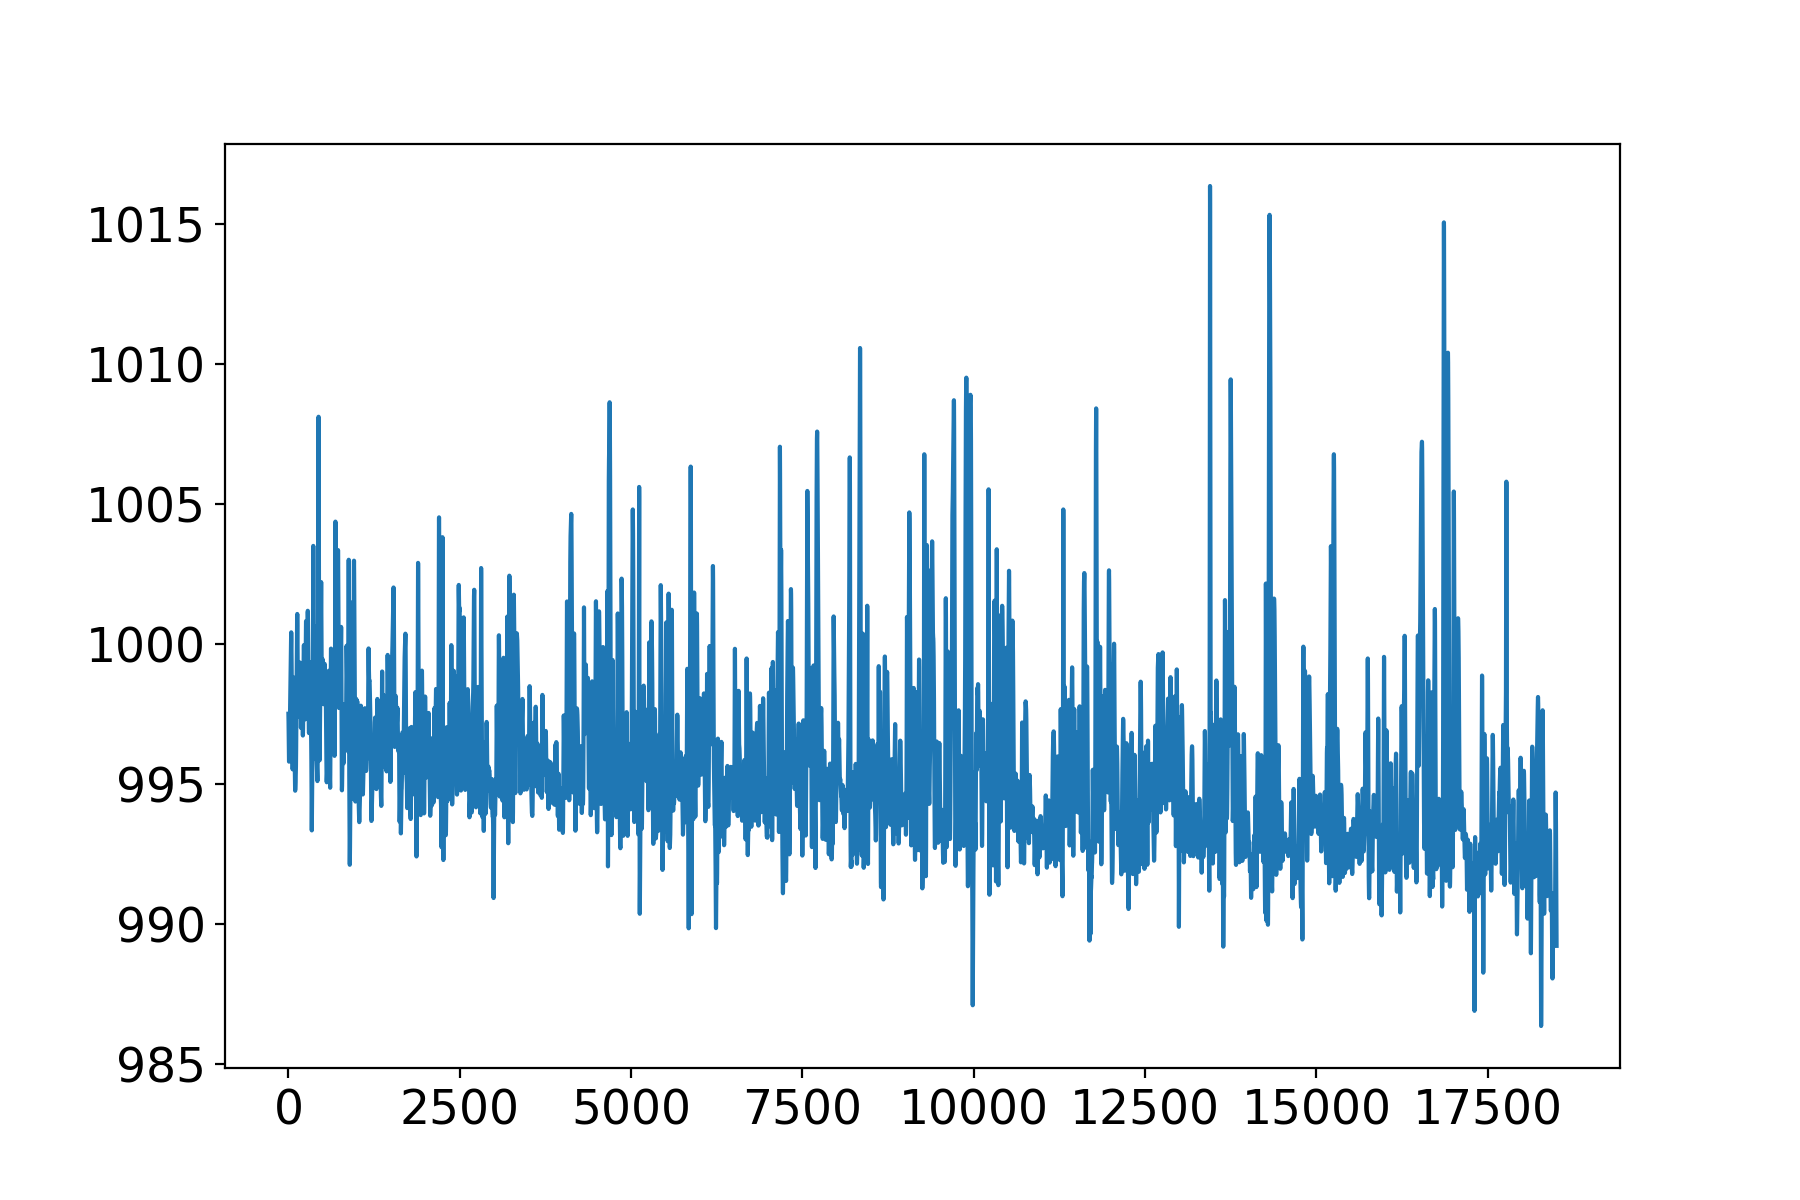

17072021/M09/M09-0717135430


<IPython.core.display.Javascript object>


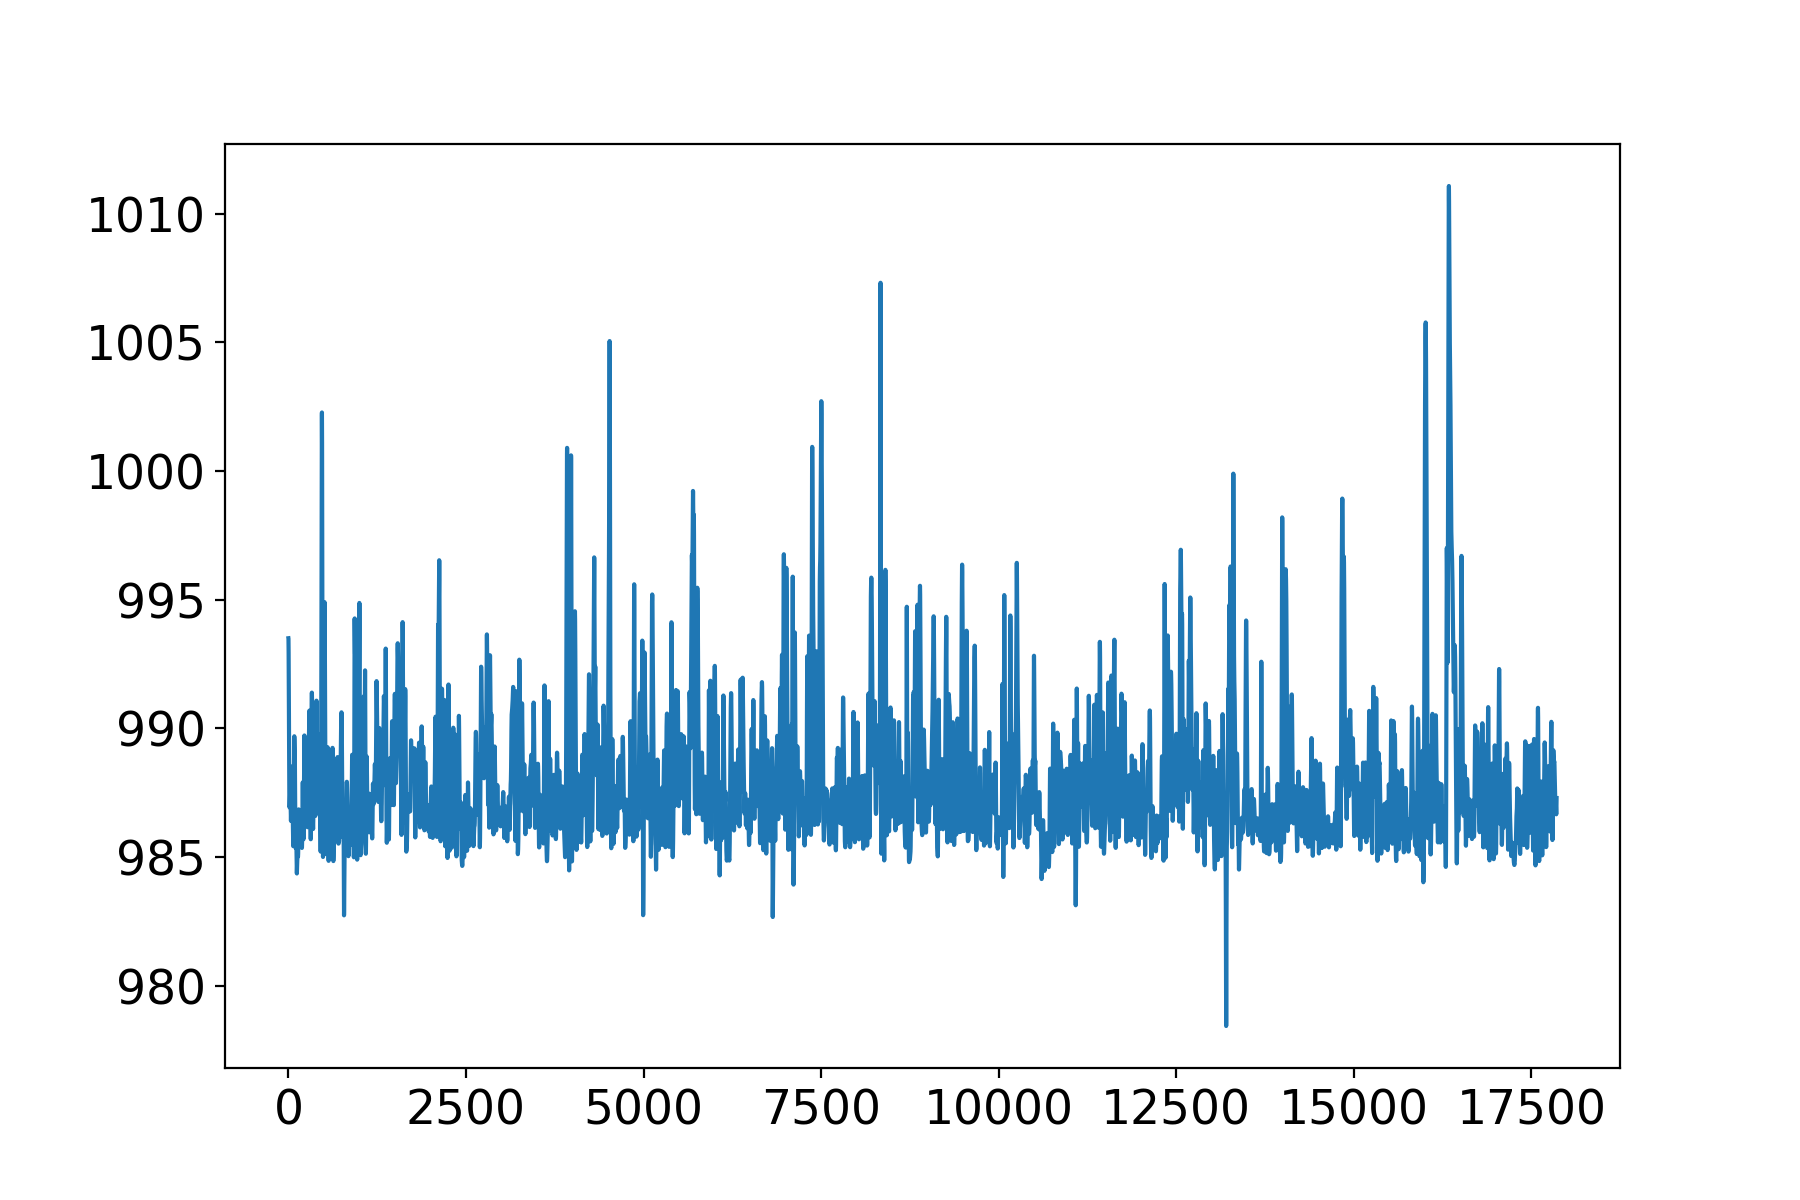

17072021/M23/M23-0717135553


<IPython.core.display.Javascript object>


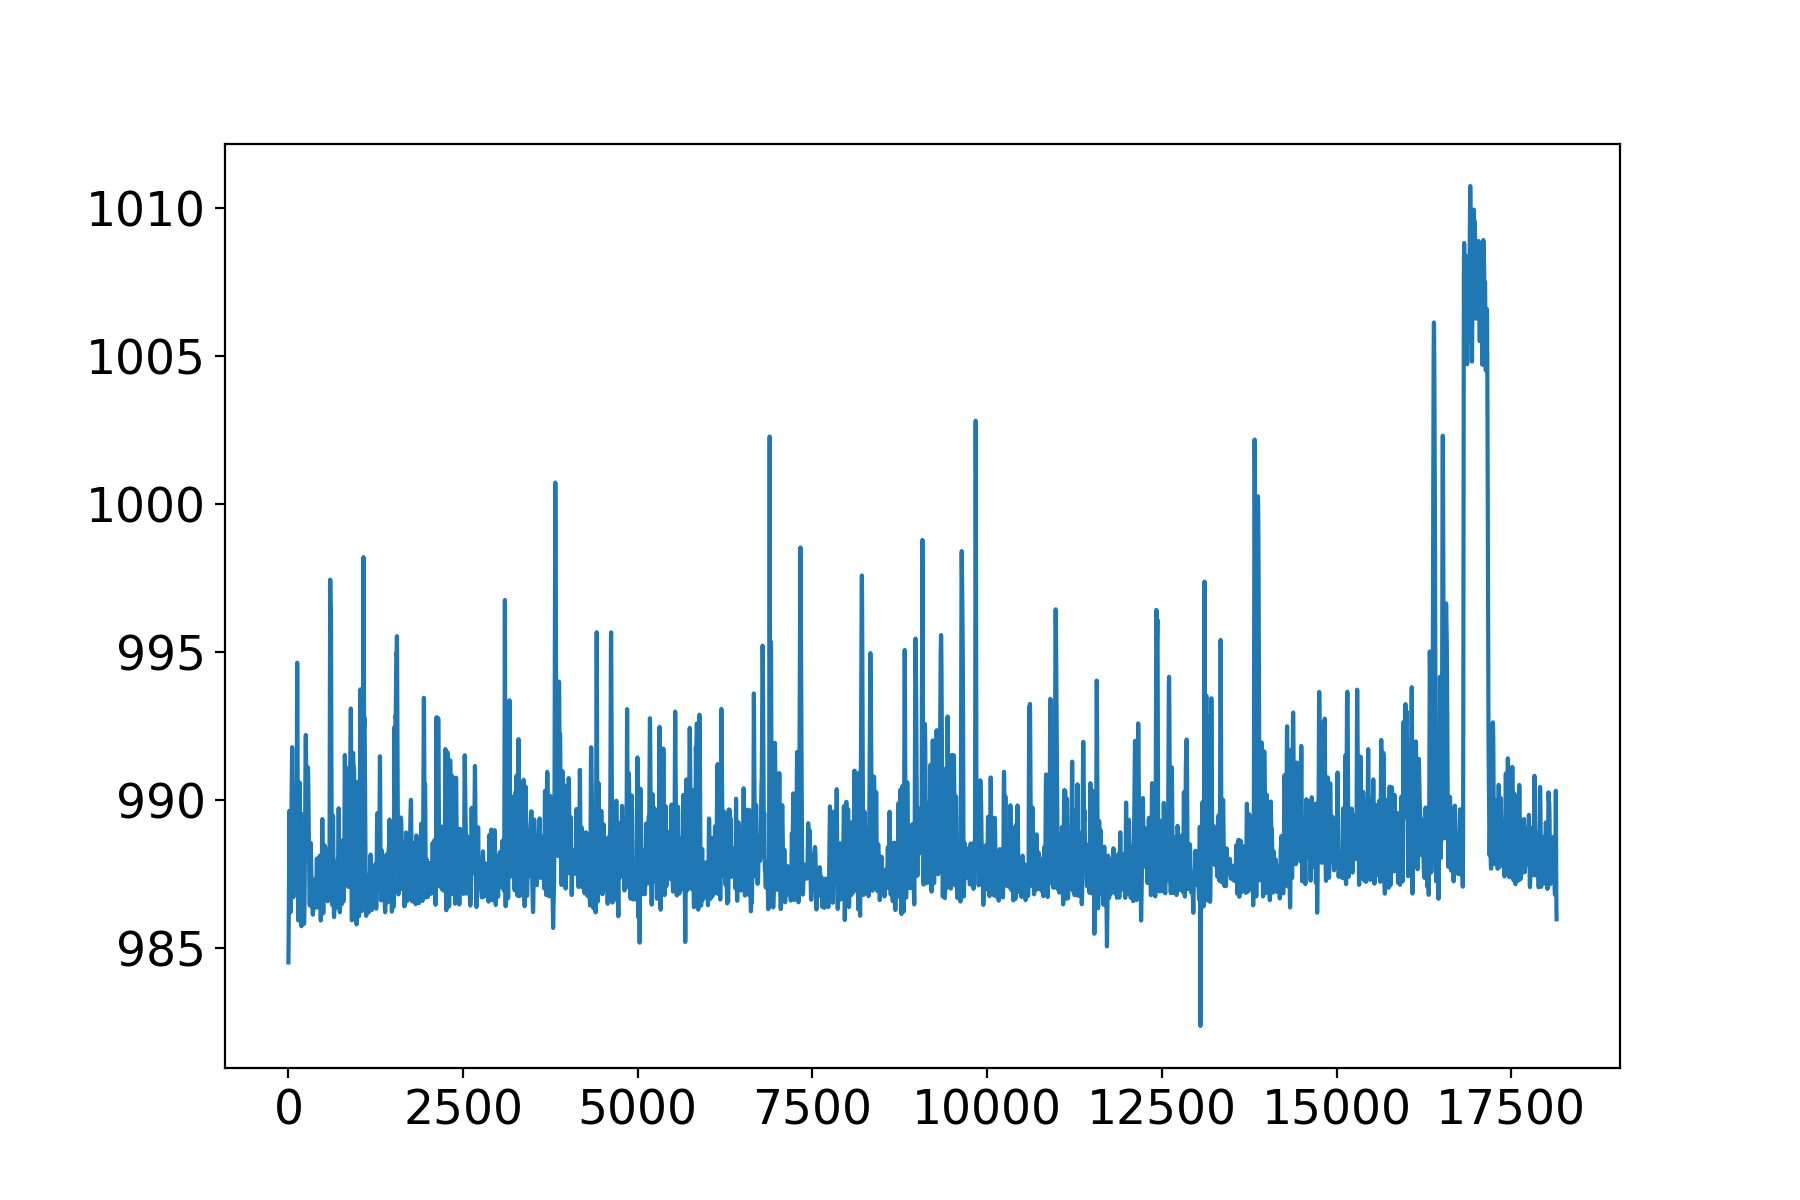

17072021/M24/M24-0717135616


<IPython.core.display.Javascript object>


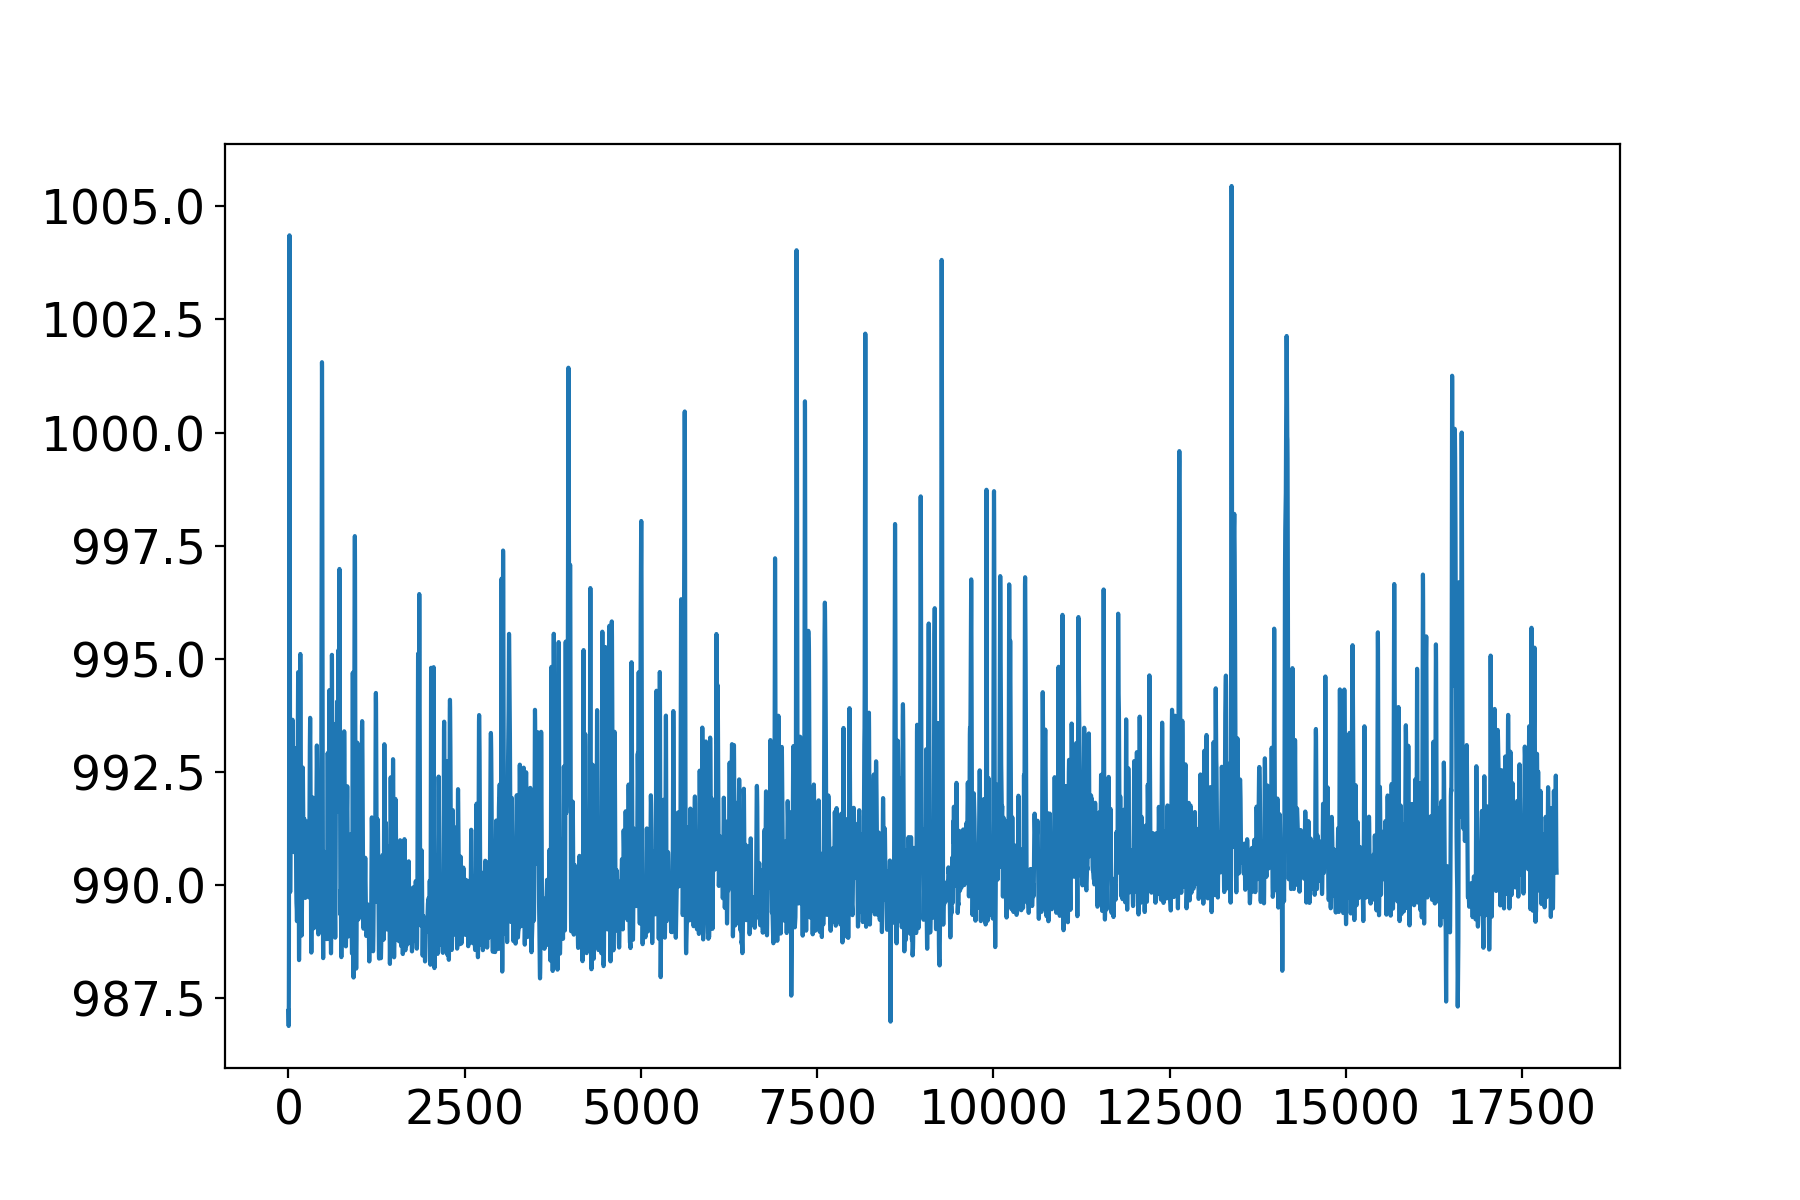

In [35]:

"""17072021/M03"""
M_17_1 = plot_and_slice(filenames[21][0],19565,37390)


"""17072021/M05"""
M_17_3 = plot_and_slice(filenames[23][0],26100,43950)# P1 and P2 identical"""

"""17072021/M08"""
M_17_4 = plot_and_slice(filenames[25][0],26440,44946)

"""17072021/M09"""
M_17_5 = plot_and_slice(filenames[26][0],28722,46577)

"""17072021/M23"""
M_17_6 = plot_and_slice(filenames[28][3],33500,51650)

"""17072021/M24"""
M_17_7 = plot_and_slice(filenames[29][0],34910,52900)

18072021/M04/M040718144901


<IPython.core.display.Javascript object>


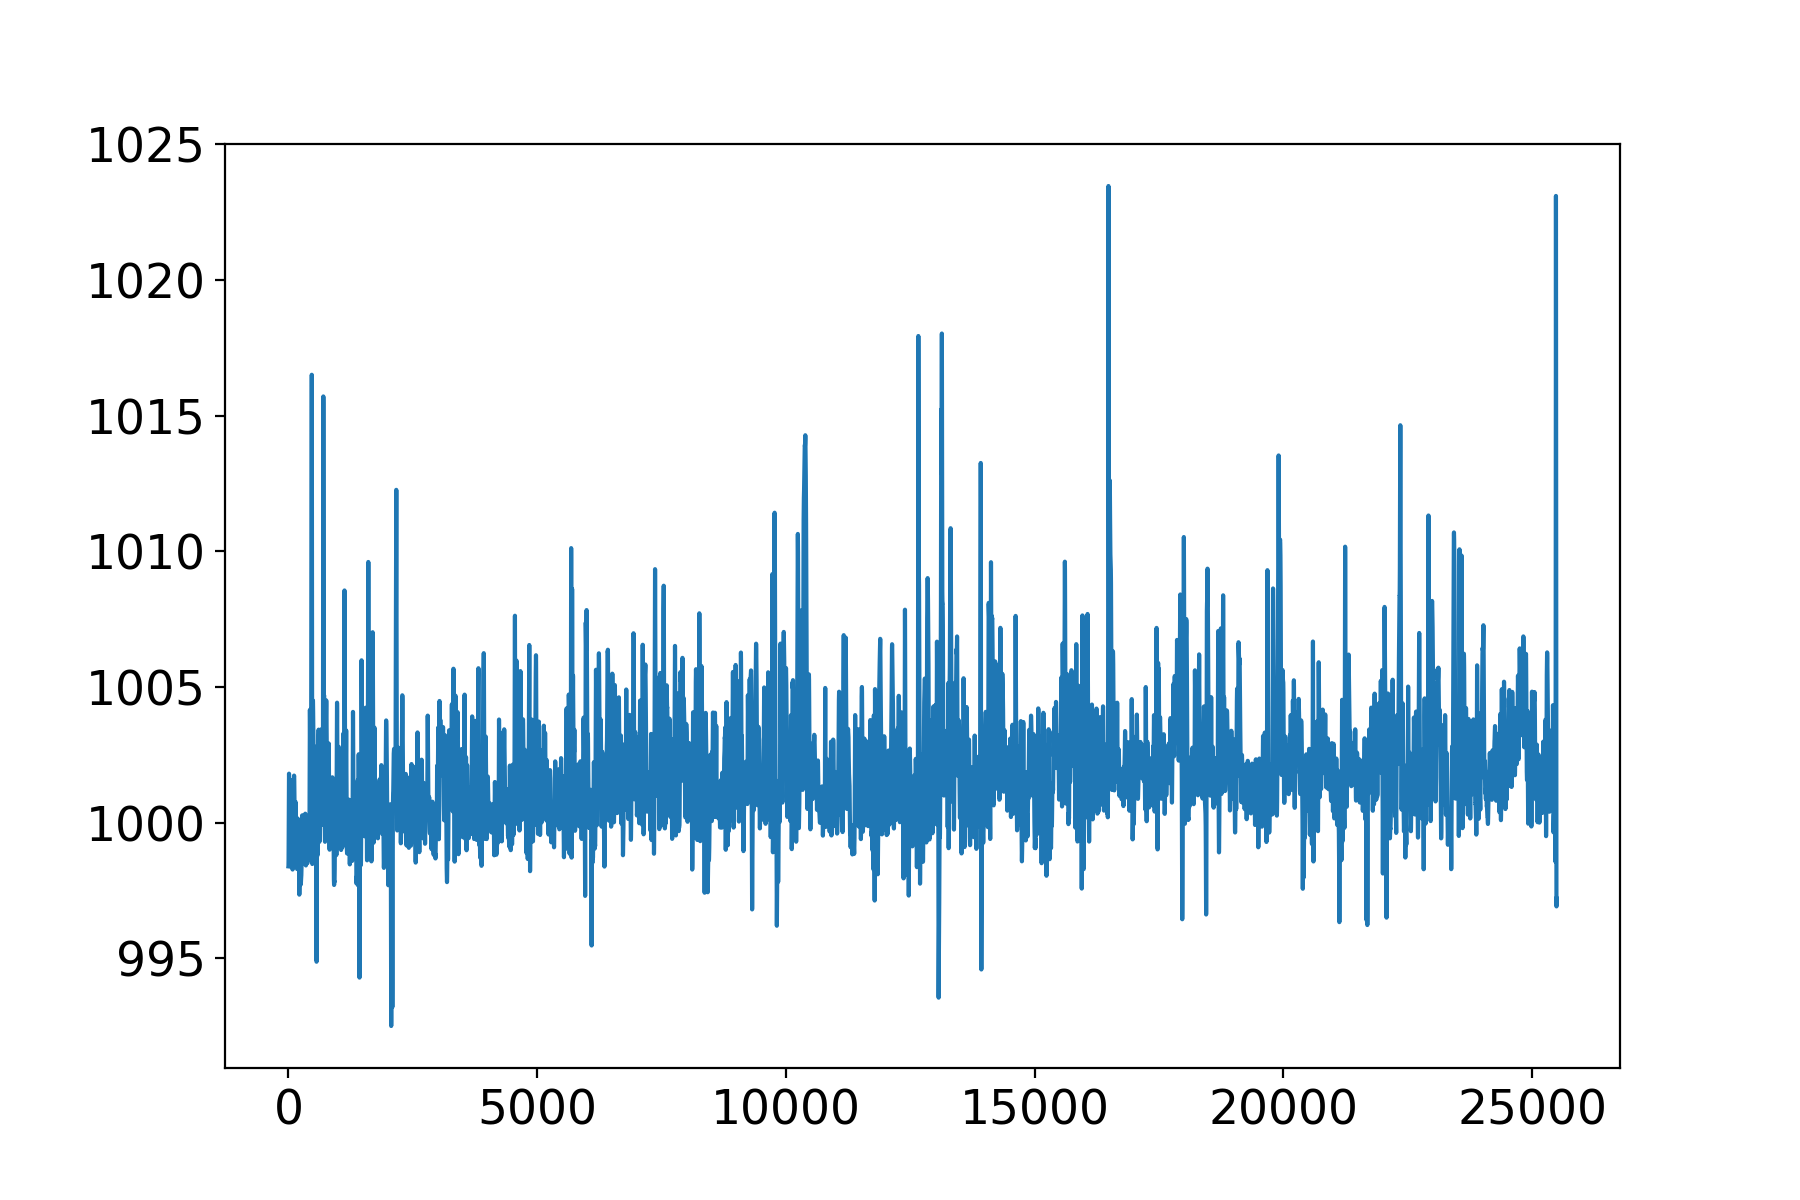

18072021/M08/M08-0718173755


<IPython.core.display.Javascript object>


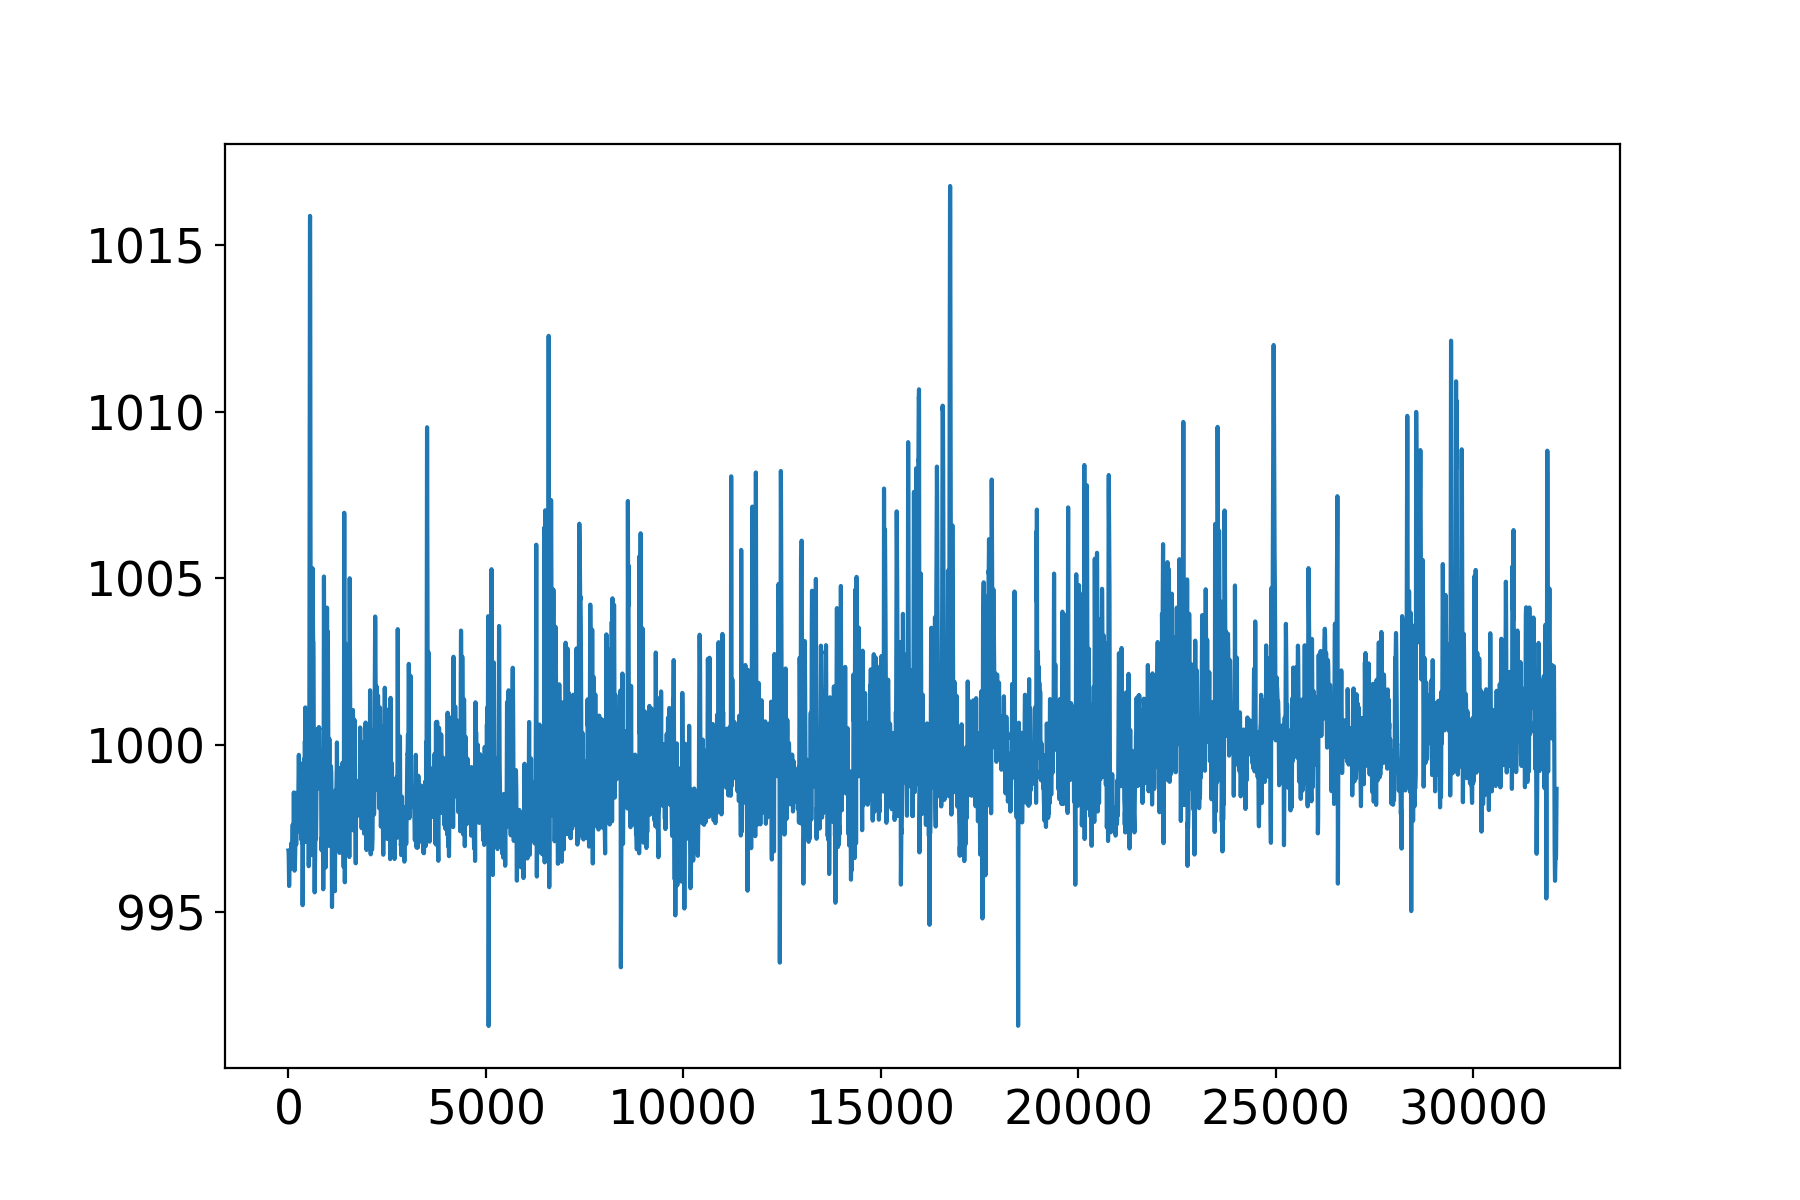

18072021/M09/M09-0718144906


<IPython.core.display.Javascript object>


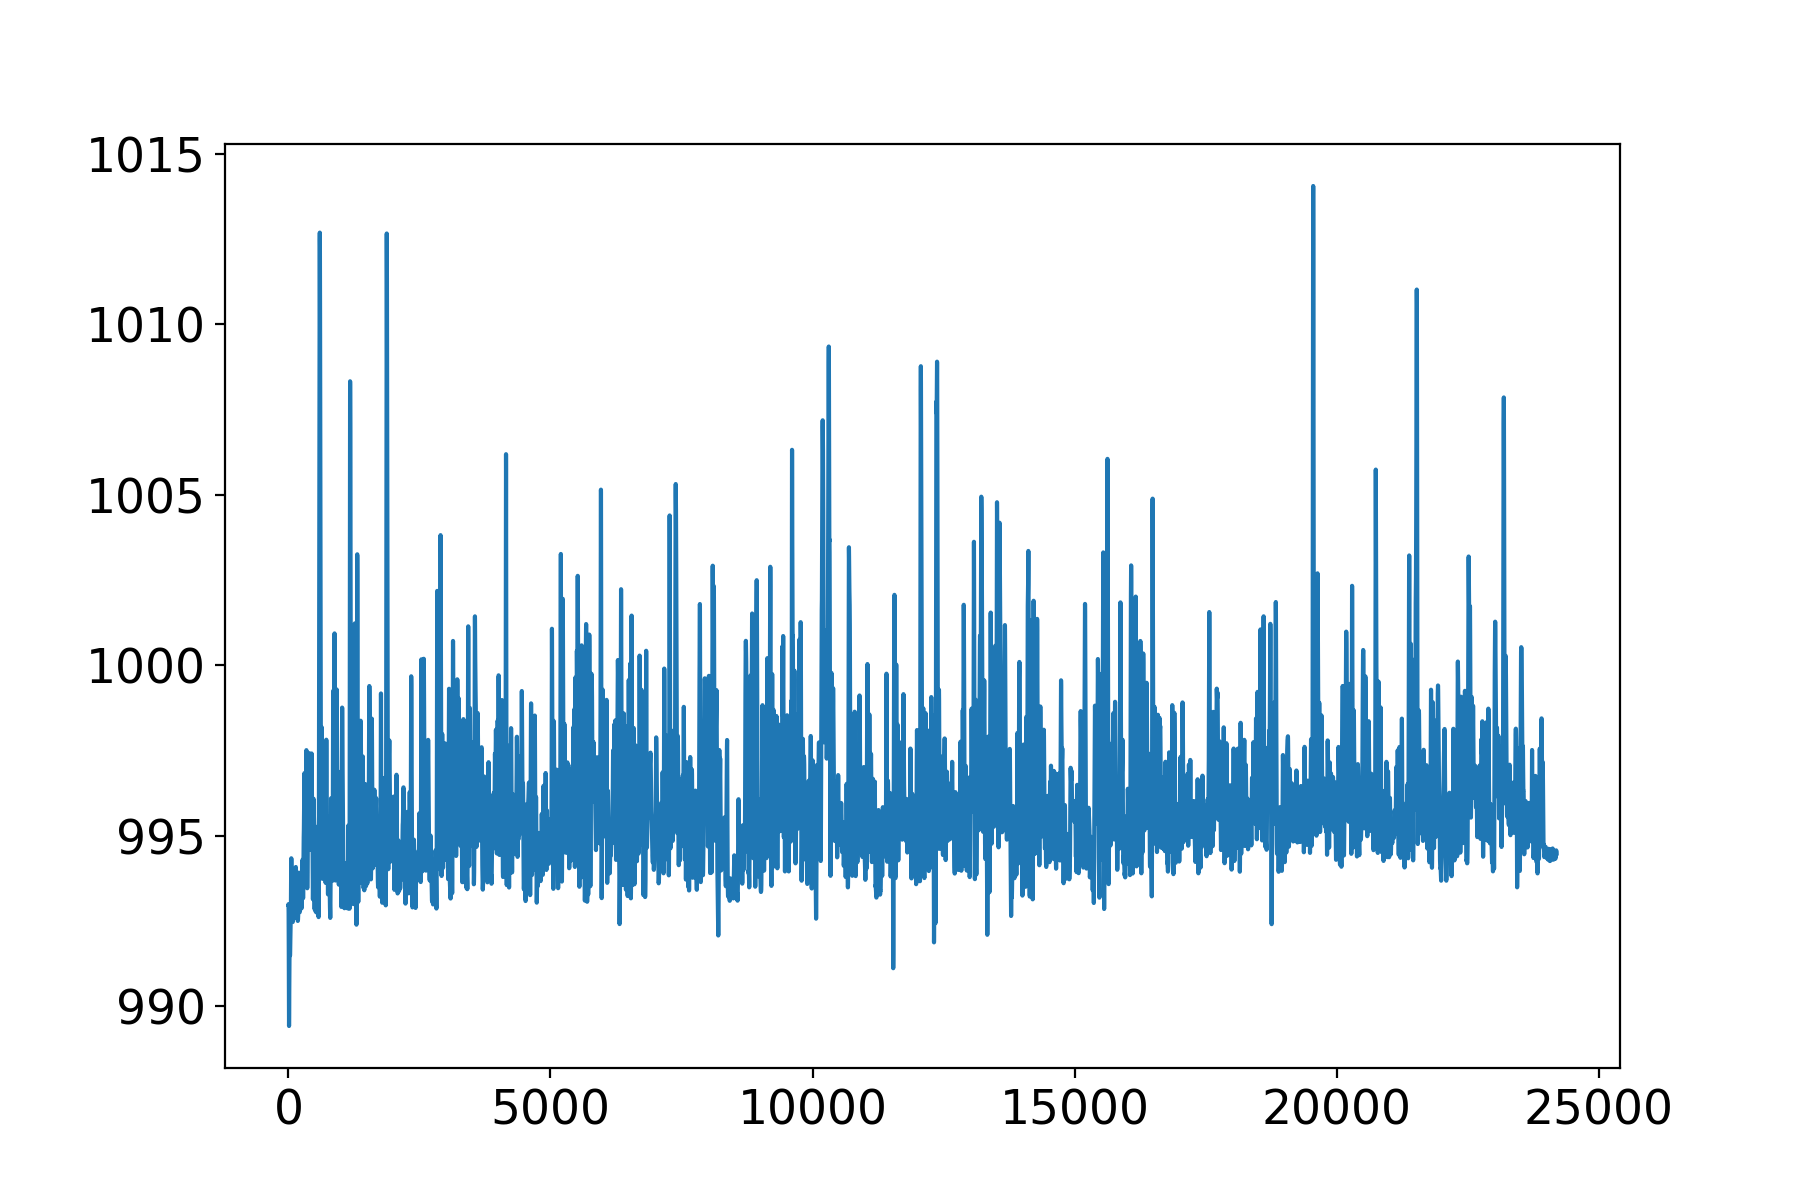

18072021/M23/M23-0718144836


<IPython.core.display.Javascript object>


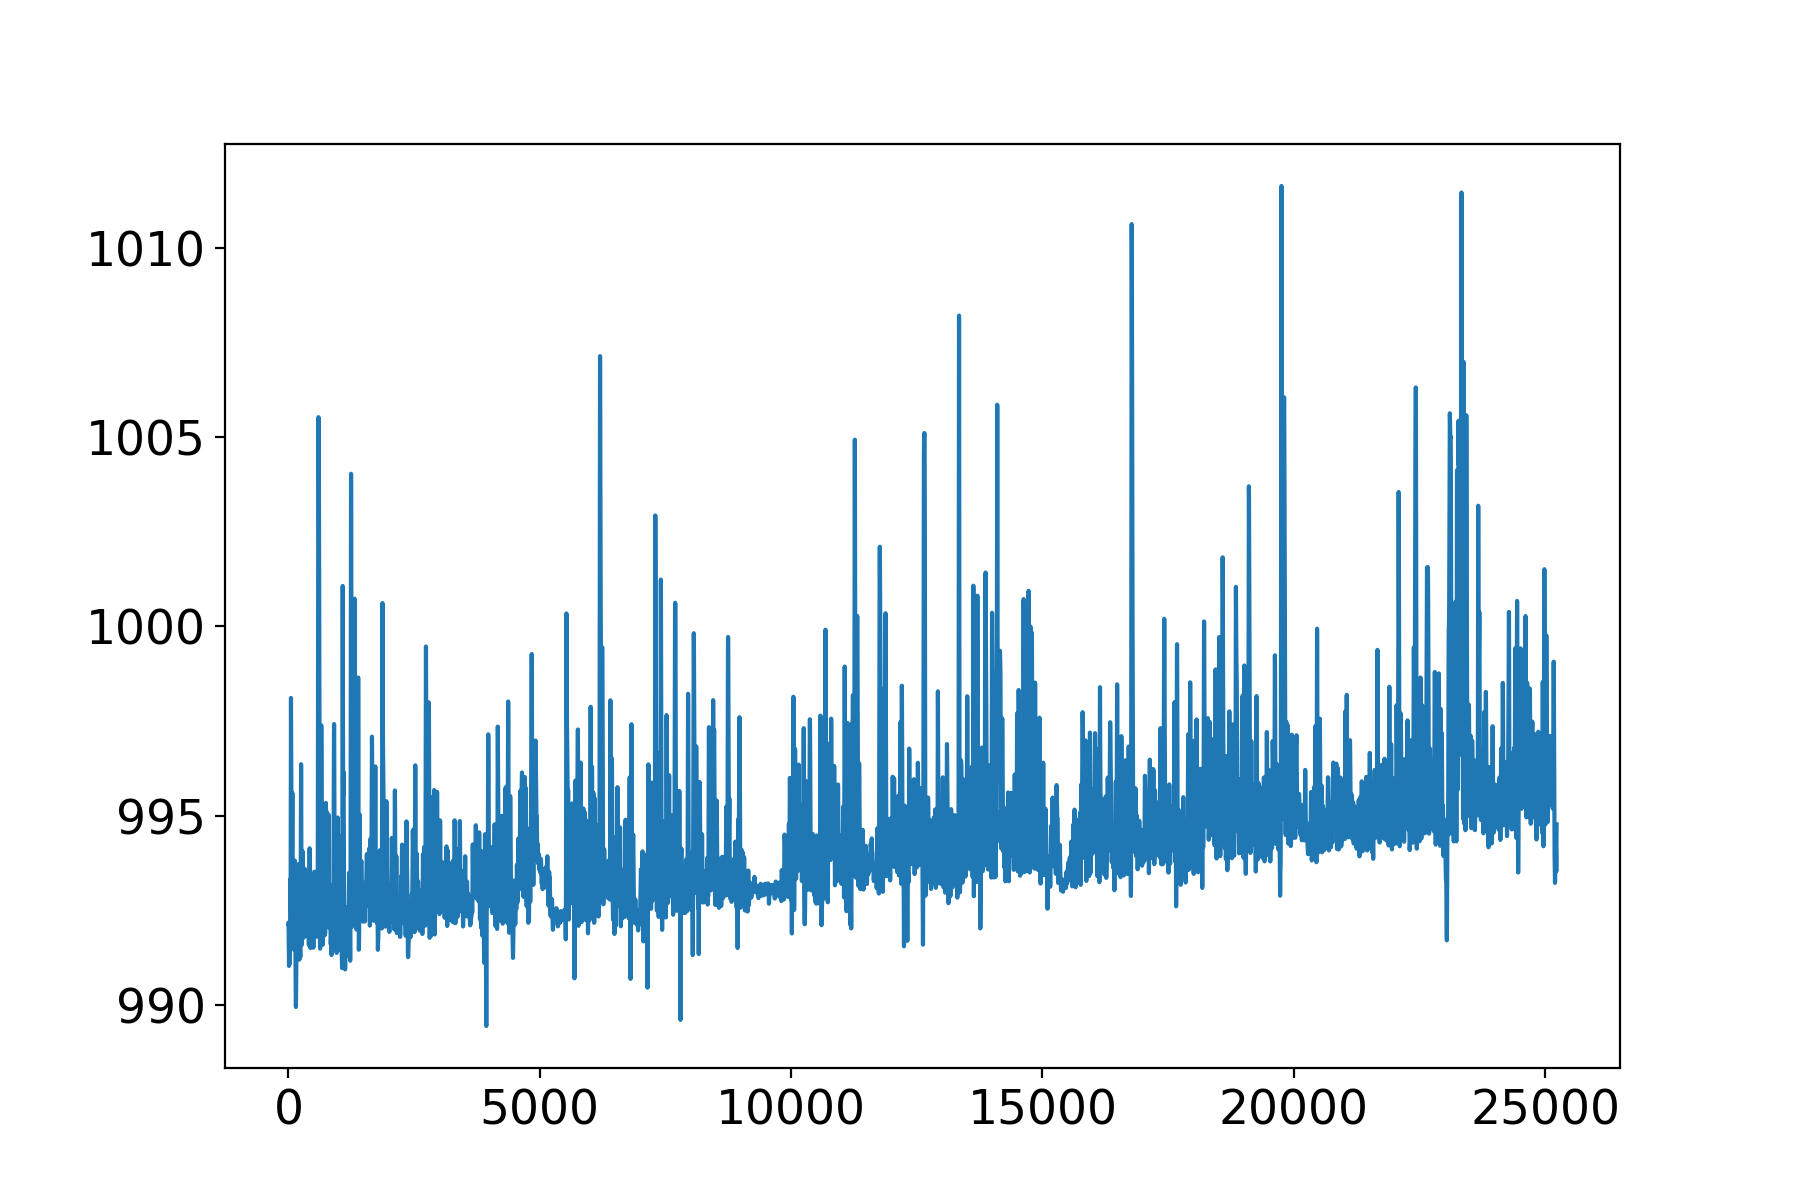

18072021/M24/M24-0718144754


<IPython.core.display.Javascript object>


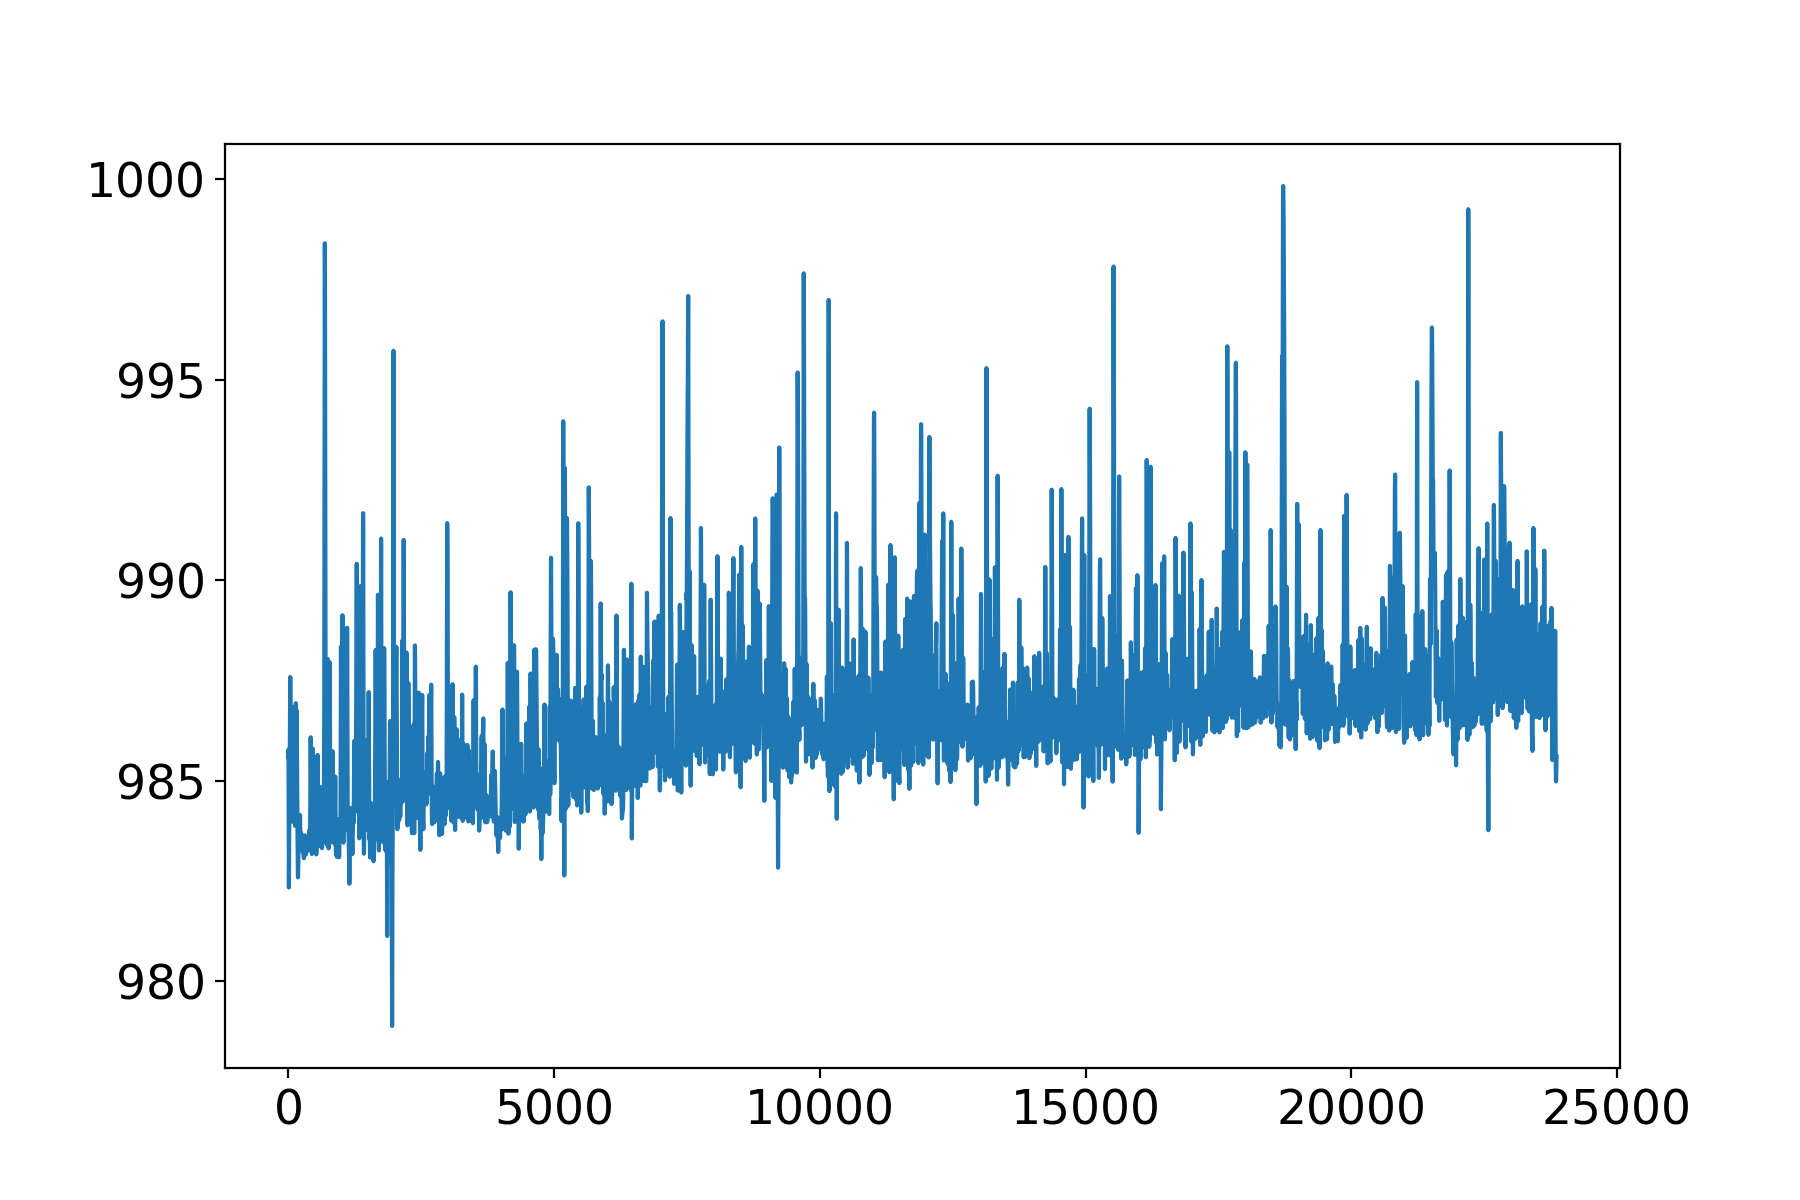

21072021/M24/M24-0721152536


<IPython.core.display.Javascript object>


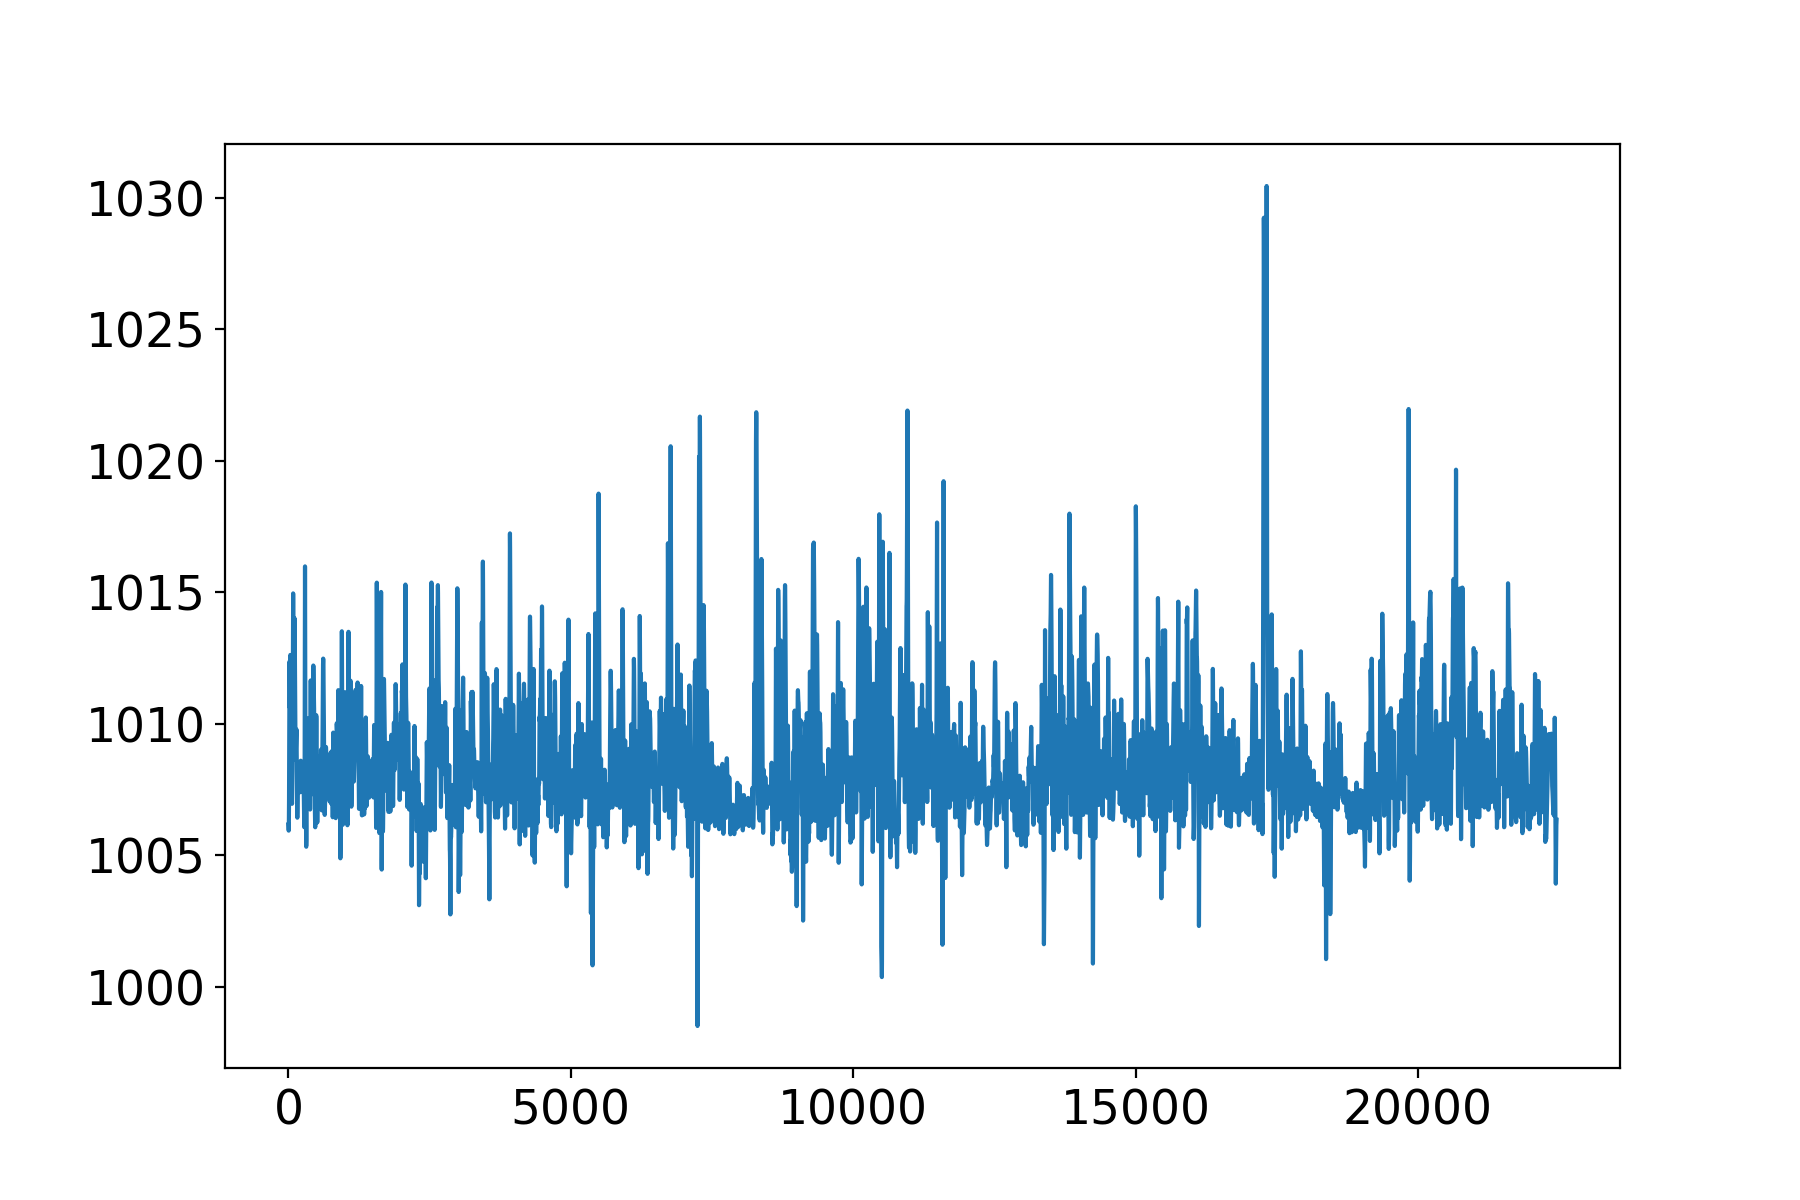

In [65]:
"""18072021/M04"""
M_18_1 = plot_and_slice(filenames[31][1],15427,40917)

M_18_2 = plot_and_slice(filenames[33][0],28768,60888)

M_18_3 = plot_and_slice(filenames[34][1],19448,43646)


"""18072021/M14"""
M_18_4 = plot_and_slice(filenames[37][1],26892,52120)

M_18_5 = plot_and_slice(filenames[38][1],87278,111143)

M_18_6 = plot_and_slice(filenames[39][0],1513,23969)


In [37]:
B56_start = 11861#query start
B56_stop = 11935#query_stop
#video features
query = A14B56['pressure'].values[B56_start:B56_stop]

th_iter = 12.337#12.28
window_iter = 90


print("Single query")
mp_query(M_13_1,B56_start,B56_stop,query,threshold = 4.5,data_viz='off')
mp_query(M_13_2,B56_start,B56_stop,query,threshold = 4.5,data_viz='off')
mp_query(M_13_3,B56_start,B56_stop,query,threshold = 4.5,data_viz='off')
mp_query(M_13_4,B56_start,B56_stop,query,threshold = 4.5,data_viz='off')
mp_query(M_13_5,B56_start,B56_stop,query,threshold = 4.5,data_viz='off')
mp_query(M_13_6,B56_start,B56_stop,query,threshold = 4.5,data_viz='off')

#mp_query(test_mseries,B56_start,B56_stop,query,threshold = 5,data_viz='off')
#mp_iterate_query(test_mseries['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")   


print("\nIterative query")
mp_iterate_query(M_13_1['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_13_2['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_13_3['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_13_4['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_13_5['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_13_6['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

print(len(M_13_1))
print(len(M_13_2))
print(len(M_13_3))
print(len(M_13_4))
print(len(M_13_5))
print(len(M_13_6))



Single query
Step count:  103
Step count:  103
Step count:  126
Step count:  173
Step count:  173
Step count:  160

Iterative query
Step count:  173
Step count:  161
Step count:  256
Step count:  131
Step count:  117
Step count:  103
37640
37758
53842
36438
33692
33880


In [9]:

th_iter = 12.28#12.337
window_iter = 90
#M_15_9

print("Single query")
mp_query(M_15_1,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_2,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_3,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_4,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_5,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_6,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_7,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_8,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_15_9,B56_start,B56_stop,query,threshold = 5,data_viz='off')


print("\nIterative query")
mp_iterate_query(M_15_1['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_2['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_3['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_4['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_5['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_6['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_7['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_8['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_15_9['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

"""channel length"""
print(len(M_15_1))
print(len(M_15_2))
print(len(M_15_3))
print(len(M_15_4))
print(len(M_15_5))
print(len(M_15_6))
print(len(M_15_7))
print(len(M_15_8))
print(len(M_15_9))

print(np.mean([151,147,146,151,152,148,234,233,235]))



Single query
Step count:  151
Step count:  147
Step count:  146
Step count:  151
Step count:  152
Step count:  148
Step count:  234
Step count:  233
Step count:  235

Iterative query
Step count:  113
Step count:  109
Step count:  115
Step count:  114
Step count:  113
Step count:  115
Step count:  79
Step count:  76
Step count:  73
40408
37760
38700
37560
40420
38660
38520
37260
38360
177.44444444444446


In [70]:
th_iter = 12.337#12.28
window_iter = 90
#M_15_9

print("Single query")
mp_query(M_17_1,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_17_3,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_17_4,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_17_5,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_17_6,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_17_7,B56_start,B56_stop,query,threshold = 5,data_viz='off')


print("\nIterative query")
mp_iterate_query(M_17_1['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_17_3['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_17_4['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_17_5['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_17_6['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_17_7['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

"""channel length"""
print(len(M_17_1))
print(len(M_17_3))
print(len(M_17_4))
print(len(M_17_5))
print(len(M_17_6))
print(len(M_17_7))

print(np.mean([222,204,150,189,213,238]))

print(np.mean([73,83,81,94,65,80]))

Single query
Step count:  222
Step count:  204
Step count:  150
Step count:  189
Step count:  213
Step count:  238

Iterative query
Step count:  127
Step count:  145
Step count:  161
Step count:  156
Step count:  125
Step count:  130
35650
35700
37012
35710
36300
35980
202.66666666666666
79.33333333333333


In [71]:
th_iter = 12.337#12.28#12.337
window_iter = 90
#M_15_9

print("Single query")
mp_query(M_18_1,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_18_2,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_18_3,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_18_4,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_18_5,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_query(M_18_6,B56_start,B56_stop,query,threshold = 5,data_viz='off')


print("\nIterative query")
mp_iterate_query(M_18_1['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_18_2['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_18_3['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_18_4['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_18_5['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
mp_iterate_query(M_18_6['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

"""channel length"""
print(len(M_18_1))
print(len(M_18_2))
print(len(M_18_3))
print(len(M_18_4))
print(len(M_18_5))
print(len(M_18_6))

print(np.mean([198,225,238,321,302,170]))
print(np.mean([153,161,120,106,105,131]))

Single query
Step count:  198
Step count:  225
Step count:  238
Step count:  321
Step count:  302
Step count:  170

Iterative query
Step count:  243
Step count:  288
Step count:  212
Step count:  193
Step count:  182
Step count:  222
50980
64240
48396
50456
47730
44912
242.33333333333334
129.33333333333334
